<a href="https://colab.research.google.com/github/20rashmi128/Predicting-Ted-Talks-Views/blob/main/Copy_of_1_Notebook_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Given Problem Statement:**

TED is devoted to spreading powerful ideas on just about any topic. This dataset contains over 4,000 TED talks including transcripts in many languages.

Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design
together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. 

As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.

The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.



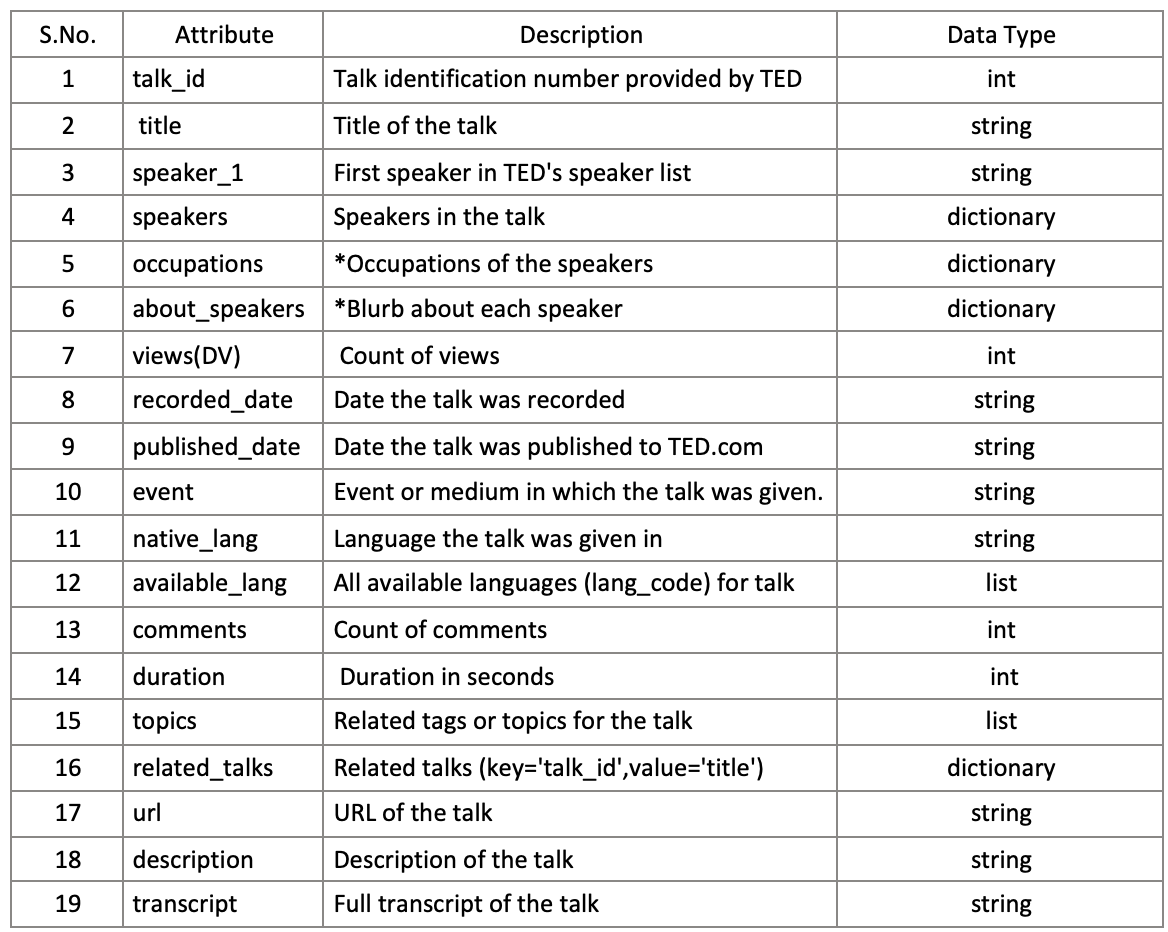

*The dictionary key maps to the speaker in ‘speakers’.

**About TED Talks:**
  * TED Conferences, LLC is an American media organization that posts talks online for free distribution under the slogan "ideas worth spreading".

**Goals:**
1. EDA part for Insights Generation:
  * How to get more views on a Ted Talk?
  * Which features positively impact views for a given TED talk and which features negatively impact?
  * What are the things TED talks should keep in mind for maximizing views while curating a new TED talk?
  * Explore most-commented but least-viewed TED talks and basis this prepare future strategies.
  * What are top 10 most popular TED talks (most-viewed)?
  * What are top 10 most talked-about TED talks (most-commented)?

2. Modelling Part:
  * Create a model that can help Ted predict the number of views for their next talk.
  * Evaluate models and choose best performing Model.

# **A. Importing dataset and relevant python libraries**

In [2]:
# Importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import datetime
from scipy.stats import skew, kurtosis
import math

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Setting for displaying all columns
pd.set_option('display.max_columns', None)

In [4]:
# CSV file loaded to a dataframe
data = pd.read_csv('/content/drive/MyDrive/Ted Talk Views Prediction - Kumari Rashmi/problem data/data_ted_talks.csv')
# A peek into first 2 rows of the given dataset
data.head(2)

talk_id                            title     speaker_1  \
0        1      Averting the climate crisis       Al Gore   
1       92  The best stats you've ever seen  Hans Rosling   

          all_speakers                                    occupations  \
0       {0: 'Al Gore'}                      {0: ['climate advocate']}   
1  {0: 'Hans Rosling'}  {0: ['global health expert; data visionary']}   

                                      about_speakers     views recorded_date  \
0  {0: 'Nobel Laureate Al Gore focused the world’...   3523392    2006-02-25   
1  {0: 'In Hans Rosling’s hands, data sings. Glob...  14501685    2006-02-22   

  published_date    event native_lang  \
0     2006-06-27  TED2006          en   
1     2006-06-27  TED2006          en   

                                      available_lang  comments  duration  \
0  ['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...     272.0       977   
1  ['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...     628.0      1190   

                                              topics  \
0  ['alternative energy', 'cars', 'climate change...   
1  ['Africa', 'Asia', 'Google', 'demo', 'economic...   

                                       related_talks  \
0  {243: 'New thinking on the climate crisis', 54...   
1  {2056: "Own your body's data", 2296: 'A visual...   

                                                 url  \
0  https://www.ted.com/talks/al_gore_averting_the...   
1  https://www.ted.com/talks/hans_rosling_the_bes...   

                                         description  \
0  With the same humor and humanity he exuded in ...   
1  You've never seen data presented like this. Wi...   

                                          transcript  
0  Thank you so much, Chris. And it's truly a gre...  
1  About 10 years ago, I took on the task to teac...

# **B. Exploratory data analysis And Visualization**

## B(i). Basic Information about dataset

In [5]:
# Basic info about given dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [6]:
# Statistical parameters for numerical features
data.describe()
# There are 4 numerical features.

talk_id         views     comments     duration
count   4005.000000  4.005000e+03  3350.000000  4005.000000
mean   12432.538327  2.148006e+06   161.997015   724.011236
std    17447.576262  3.451226e+06   268.838922   361.775462
min        1.000000  0.000000e+00     0.000000    60.000000
25%     1252.000000  8.820690e+05    38.000000   393.000000
50%     2333.000000  1.375508e+06    89.000000   738.000000
75%    23777.000000  2.133110e+06   188.000000   974.000000
max    62794.000000  6.505195e+07  6449.000000  3922.000000

In [7]:
len(data[data['views']==0])
# Its suspicious that few talks have 0 views; does not make sense.

6

Upon checkinng TED website, it turns out above 6 talks do have non-zero views. Accordingly, these will dealt while doing Outliers treatment.

In [8]:
data.describe(include='object').columns
#  There are 15 non-numerical features

Index(['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers',
       'recorded_date', 'published_date', 'event', 'native_lang',
       'available_lang', 'topics', 'related_talks', 'url', 'description',
       'transcript'],
      dtype='object')

In [9]:
# Statistical parameters for non-numerical features
data.describe(include='object')

title     speaker_1         all_speakers  \
count                          4005          4005                 4001   
unique                         4005          3274                 3306   
top     Averting the climate crisis  Alex Gendler  {0: 'Alex Gendler'}   
freq                              1            34                   34   

            occupations                                     about_speakers  \
count              3483                                               3502   
unique             2049                                               2977   
top     {0: ['writer']}  {0: 'Alex Rosenthal takes everyday experiences...   
freq                 53                                                 10   

       recorded_date published_date   event native_lang available_lang  \
count           4004           4005    4005        4005           4005   
unique          1334           2962     459          12           3902   
top       2017-04-24     2017-09-07  TED-Ed          en         ['en']   
freq              97             27     556        3957             24   

                    topics                                      related_talks  \
count                 4005                                               4005   
unique                3977                                               4005   
top     ['TED-Ed', 'math']  {243: 'New thinking on the climate crisis', 54...   
freq                     8                                                  1   

                                                      url  \
count                                                4005   
unique                                               4005   
top     https://www.ted.com/talks/al_gore_averting_the...   
freq                                                    1   

                                              description  \
count                                                4005   
unique                                               4005   
top     With the same humor and humanity he exuded in ...   
freq                                                    1   

                                               transcript  
count                                                4005  
unique                                               4005  
top     Thank you so much, Chris. And it's truly a gre...  
freq                                                    1

In [10]:
# Checking unique talk_ids in given dataset
data['talk_id'].nunique()

4005

**Observations:**
1. There total 4005 observations with 19 total features.
2. Numerical Features: talk_id, views, comments and duration
3. Ordinal categorical: recorded_date, published_date and event
4. Rest are textual features.
5. On primary evaluation, found talk_id and url columns to be irrelevant to our analysis.
6. Duration is given in seconds; will be converted into minutes for clarity purpose.
7. Few talks have 0 views and 0 comments; Shortest Talk is of 60 seconds (which is unusual, will be checked later).
8. Majority of talks are in English (3957).

## B(ii). Data Pre-processing and Cleaning

In [11]:
# On primary examination, Column url seems to be irrelevant to our analysis. 
# Therefore, has been dropped.
data.drop(['url'], axis=1,inplace=True)

In [12]:
# checking data stored under about_Speakers column for 1st row
data.loc[0,'about_speakers']

"{0: 'Nobel Laureate Al Gore focused the world’s attention on the global climate crisis. Now he’s showing us how we’re moving towards real solutions.\\r\\n'}"

In [13]:
# checking data stored under description column for 1st row
data.loc[0,'description']

'With the same humor and humanity he exuded in "An Inconvenient Truth," Al Gore spells out 15 ways that individuals can address climate change immediately, from buying a hybrid to inventing a new, hotter brand name for global warming.'

In [14]:
(data['speaker_1'].apply(lambda x:x.lower())).nunique()
# 3274 unique speakers

3274

### **1. Formatting data type Inconsistencies**
        1. all_speakers, occupations and related_talks are dictionary, but are stored as string data types. So, will be converted to dictionary data types.
        2. recorded_date and published_Date are stored as string data type. so, will be converted to datetime format.
        3. available_lang and topics were stored as string data type. so will be converted to list data type.

In [15]:
#  checking data types of all_speakers, occupations & related_talks columns
type(data.loc[0,'all_speakers']),type(data.loc[0,'occupations']),type(data.loc[0,'related_talks'])

(str, str, str)

In [16]:
# applying eval() function on all string values of all_speakers, occupations & related_talks column
data.loc[~data['all_speakers'].isnull(),'all_speakers'] = data.loc[~data['all_speakers'].isnull(),'all_speakers'].apply(lambda row: eval(row))
data.loc[~data['occupations'].isnull(),'occupations'] = data.loc[~data['occupations'].isnull(),'occupations'].apply(lambda row: eval(row))
data.loc[~data['related_talks'].isnull(),'related_talks'] = data.loc[~data['related_talks'].isnull(),'related_talks'].apply(lambda row: eval(row))

In [17]:
# verifying the data types of above columns
type(data.loc[0,'all_speakers']),type(data.loc[0,'occupations']),type(data.loc[0,'related_talks'])

(dict, dict, dict)

In [18]:
#  checking data types of recorded_date and published_date columns
type(data.loc[0,'recorded_date']),type(data.loc[0,'published_date'])

(str, str)

In [19]:
# converting data types of recorded_date and published_date columns to datetime format
data['published_date'] = (pd.to_datetime(data['published_date'])).dt.date
data['recorded_date'] = (pd.to_datetime(data['recorded_date'])).dt.date

In [20]:
# verifying the data types of above columns
type(data.loc[0,'recorded_date']),type(data.loc[0,'published_date'])

(datetime.date, datetime.date)

In [21]:
#Checking the data types of above columns
type(data.loc[4000,'available_lang']), type(data.loc[4000,'topics'])

(str, str)

In [22]:
# applying eval() function on all string values of available_lang & topics column
data.loc[~data['available_lang'].isnull(),'available_lang'] = data.loc[~data['available_lang'].isnull(),'available_lang'].apply(lambda row: eval(row))
data.loc[~data['topics'].isna(),'topics'] = data.loc[~data['topics'].isna(),'topics'].apply(lambda x:eval(x))

In [23]:
# verifying the data types of above columns
type(data.loc[4000,'available_lang']), type(data.loc[4000,'topics'])

(list, list)

In [24]:
data.loc[4000,'topics']

['activism',
 'data',
 'technology',
 'mental health',
 'software',
 'communication',
 'community']

### **2. Handling Missing Values**

In [25]:
# checking column wise percentages of missing values.
(data.isnull().sum()*100/len(data)).sort_values(ascending=False)[:7]

comments          16.354557
occupations       13.033708
about_speakers    12.559301
all_speakers       0.099875
recorded_date      0.024969
talk_id            0.000000
available_lang     0.000000
dtype: float64

**a) Missing values in comments column**

In [26]:
# Checking comments column against Ted talks with 0 views.
(data[data['views']==0])['comments'].unique()
# found that Ted talks with 0 view has missing values in comment column.
# However its very rare for a talk to have 0 views. Upon checking TED websites, it turns out they have non-zero views.

array([nan])

In [27]:
data['comments'].isna().sum()
# there are still 649 missing values in comments column.

655

In [28]:
data['comments'].describe()

count    3350.000000
mean      161.997015
std       268.838922
min         0.000000
25%        38.000000
50%        89.000000
75%       188.000000
max      6449.000000
Name: comments, dtype: float64

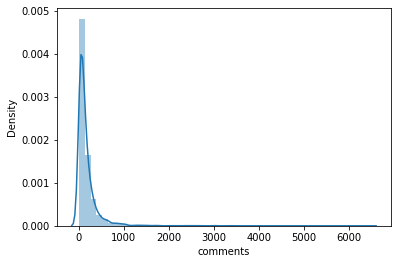

In [29]:
sns.distplot(data['comments'])
# comments are highly skewed to the right (positive)
# will impute missing values in comments using Median instead of mean

In [30]:
# Checking median value for non-null comments observations.
data[~data['comments'].isnull()]['comments'].median()

89.0

In [31]:
# For missing values in comments column, let's substitute these with "Other"
data.loc[data['comments'].isna(),'comments']=data[~data['comments'].isnull()]['comments'].median()

In [32]:
data['comments'].isna().sum()
# No missing values in comments column

0

In [33]:
# Checking updated statistical parameters after Null values treatment.
data['comments'].describe()

count    4005.000000
mean      150.058677
std       247.346686
min         0.000000
25%        46.000000
50%        89.000000
75%       162.000000
max      6449.000000
Name: comments, dtype: float64

**b) Missing values in occupations column**

In [34]:
# Getting occupation of main speaker
data.loc[0,'occupations'][0][0]

'climate advocate'

In [35]:
# created a new column for occupation of speaker1.
data.loc[~data['occupations'].isna(),'occupation1']=data.loc[~data['occupations'].isna(),'occupations'].apply(lambda x:x[0][0])

In [36]:
# For missing values in occupations column, let's substitute these with "Other"
data.loc[data['occupations'].isna(),'occupation1']='other'

In [37]:
data['occupations'].isna().sum()

522

In [38]:
data.head(2)

talk_id                            title     speaker_1  \
0        1      Averting the climate crisis       Al Gore   
1       92  The best stats you've ever seen  Hans Rosling   

          all_speakers                                    occupations  \
0       {0: 'Al Gore'}                      {0: ['climate advocate']}   
1  {0: 'Hans Rosling'}  {0: ['global health expert; data visionary']}   

                                      about_speakers     views recorded_date  \
0  {0: 'Nobel Laureate Al Gore focused the world’...   3523392    2006-02-25   
1  {0: 'In Hans Rosling’s hands, data sings. Glob...  14501685    2006-02-22   

  published_date    event native_lang  \
0     2006-06-27  TED2006          en   
1     2006-06-27  TED2006          en   

                                      available_lang  comments  duration  \
0  [ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...     272.0       977   
1  [ar, az, bg, bn, bs, cs, da, de, el, en, es, e...     628.0      1190   

                                              topics  \
0  [alternative energy, cars, climate change, cul...   
1  [Africa, Asia, Google, demo, economics, global...   

                                       related_talks  \
0  {243: 'New thinking on the climate crisis', 54...   
1  {2056: 'Own your body's data', 2296: 'A visual...   

                                         description  \
0  With the same humor and humanity he exuded in ...   
1  You've never seen data presented like this. Wi...   

                                          transcript  \
0  Thank you so much, Chris. And it's truly a gre...   
1  About 10 years ago, I took on the task to teac...   

                            occupation1  
0                      climate advocate  
1  global health expert; data visionary

In [39]:
data['occupation1'].isna().sum()

0

In [40]:
(data['occupation1'].apply(lambda x:x.lower())).nunique()
#  there total 1552 unique occupations for 1st speaker.

1552

In [41]:
#  lets drop occupations column, as it seems to be irrelevant to our analysis.
data.drop('occupations',axis=1,inplace= True)

**c) Missing values in recorded_date column**

In [42]:
data['recorded_date'].isnull().sum()
# Only 1 talk has missing recorded_Date

1

In [43]:
data[data['recorded_date'].isnull()]
# There seems to be no way to impute missing recorded_date
# Since recorded_date is irrelevant to our analysis, no need to treat missing value, this column will be dropped later.

talk_id                                              title  \
3831    56629  The unpaid work that GDP ignores -- and why it...   

           speaker_1           all_speakers  \
3831  Marilyn Waring  {0: 'Marilyn Waring'}   

                                         about_speakers    views  \
3831  {0: 'Marilyn Waring advocates for a public pol...  1276272   

     recorded_date published_date             event native_lang  \
3831           NaT     2020-01-23  TEDxChristchurch          en   

                                      available_lang  comments  duration  \
3831  [en, es, fr, it, ko, pt, tr, vi, zh-cn, zh-tw]      20.0      1039   

                                                 topics  \
3831  [global development, development, social chang...   

                                          related_talks  \
3831  {46582: 'Why governments should prioritize wel...   

                                            description  \
3831  If you: do laundry, are (or have been) pregnan...   

                                             transcript occupation1  
3831  (In Maori: My mountain is Taupiri.) (Waikato i...   economist

**d) Missing values in all_speakers column**

In [44]:
data['all_speakers'].isna().sum()
# only 4 observations have missing values in this column.

4

In [45]:
data.isnull().sum().sort_values(ascending=False)[:5]

about_speakers    503
all_speakers        4
recorded_date       1
talk_id             0
comments            0
dtype: int64

**Observations:**
1. Data type Inconsistencies:
  *  all_speakers, occupations and related_talks are dictionary, but are stored as string data types. So, will be converted to dictionary data types
  * recorded_date and published_Date are stored as string data type. so, will be converted to datetime format.
  * available_lang and topics were stored as string data type. so will be converted to list data type.
2. Missing Values: 3 columns have significant amount of data missing.
  * Comments: There are 6 talks with 0 views; further these talks have Missing values against comments column. However, a TED Talk wit 0 views is suspicious and on checking TED website it turns out these 6 talks have non-zero views. All missing values in comments was replaced by Median value.
  * occupations: Extracted occupation of main speaker and for missing values, substituted "Other". Later occupations column was dropped, as is irrelevant to analysis.
  * about_speakers: This column is irrelevant to analysis, hence will be dropped.
  * recorded_date: Only 1 observation has missing recorded_date. This column is irrelevant to analysis, hence will be dropped.
  * all_speakers: only 4 observations have missing values. For missing all_speakers value, lets assume that there is only one speaker, as there is no way to substitute these missing values. This column is irrelevant to analysis, hence will be dropped.

## B(iii) Identifying underlying Trends: 

In [46]:
# Module Function for annonting a barplot (will be used later)
def annot(xplot):
  for p in xplot.patches:
      xplot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., 
                                                     p.get_height()), 
                     ha = 'center', va = 'center', xytext = (0, 9), 
                     textcoords = 'offset points')

### **1. Does Occupation of Main speaker gives an idea about number of views?**

Text(0, 0.5, 'Total Number of TED talks delivered')

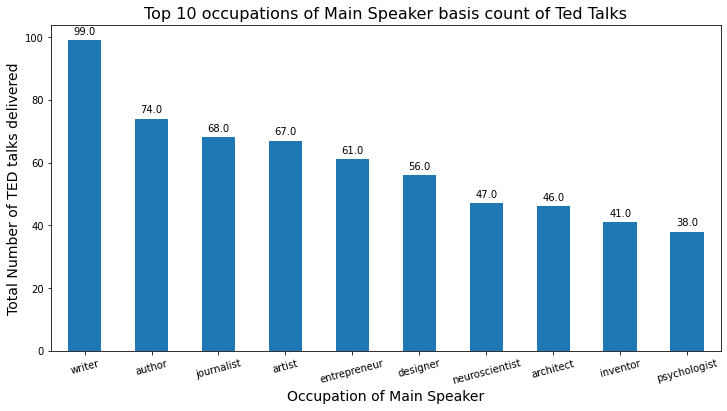

In [47]:
# Getting top 10 occupations of Main Speaker basis count of Ted Talks.
plt1 = data[data['occupation1']!='other']['occupation1'].value_counts()[:10].plot(kind='bar',figsize=(12,6))
annot(plt1)
plt.xticks(rotation=15)
plt.title('Top 10 occupations of Main Speaker basis count of Ted Talks',fontsize=16)
plt.xlabel('Occupation of Main Speaker',fontsize=14)
plt.ylabel("Total Number of TED talks delivered", fontsize=14)

Text(0, 0.5, 'Average views received per occupation')

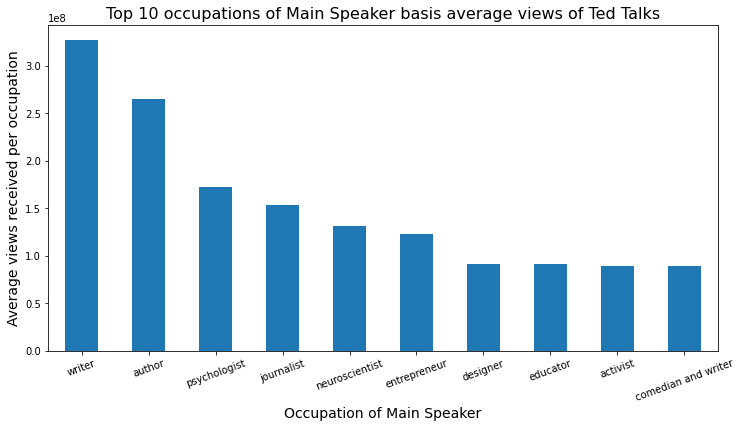

In [48]:
# Getting top 10 occupations of Main Speaker basis average views of Ted Talks.
plt2=data[data['occupation1']!='other'].groupby('occupation1')['views'].sum().sort_values(ascending=False)[:10].plot(kind='bar',figsize=(12,6))
plt.xticks(rotation=20)
plt.title('Top 10 occupations of Main Speaker basis average views of Ted Talks',fontsize=16)
plt.xlabel('Occupation of Main Speaker',fontsize=14)
plt.ylabel("Average views received per occupation", fontsize=14)

**Observations**:
1. Highest Number of Ted Talks were delivered by Speakers who are writers, shortly followd by speakers who are author.
2. Average views received per ted Talk is the highest for Speakers who are writers, shortly followd by speakers who are author.

### **2. Who are the top 10 Main Speakers basis count of Ted Talks and basis average count of views?**

Text(0, 0.5, 'Total Number of TED talks delivered')

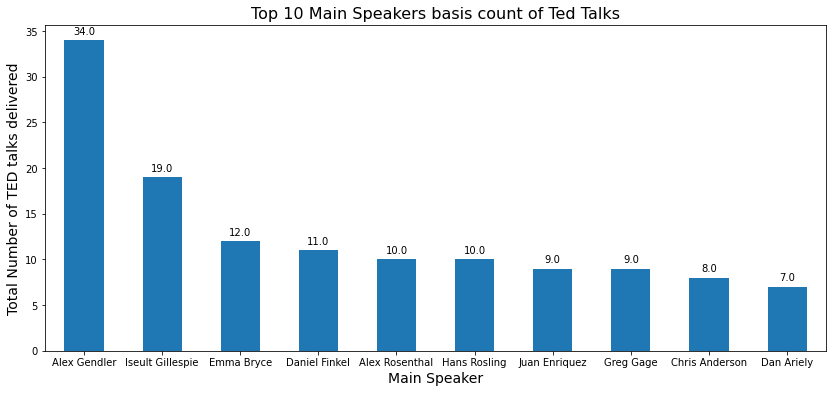

In [49]:
# Top 10 Main Speakers basis count of Ted Talks 
plt3 = data['speaker_1'].value_counts()[:10].plot(kind='bar',figsize=(14,6))
annot(plt3)
plt.xticks(rotation=0)
plt.title('Top 10 Main Speakers basis count of Ted Talks',fontsize=16)
plt.xlabel('Main Speaker',fontsize=14)
plt.ylabel("Total Number of TED talks delivered", fontsize=14)

Text(0, 0.5, 'Total Number of views')

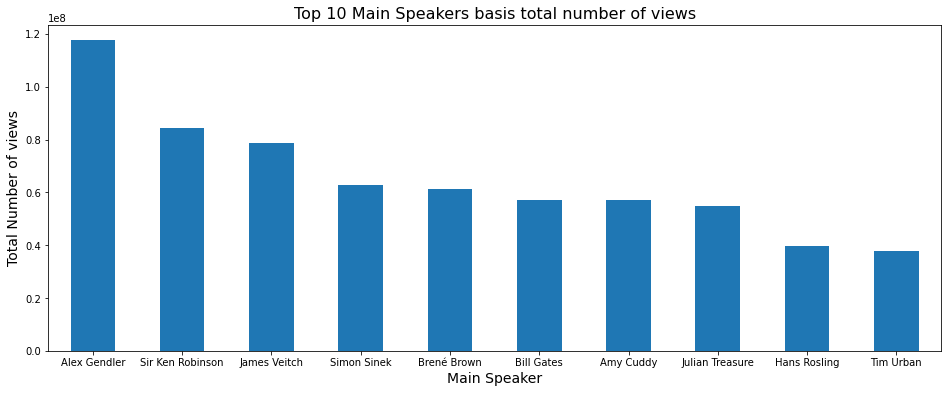

In [50]:
# Top 10 Main Speakers basis total number of views of Ted Talks 
data.groupby('speaker_1')['views'].sum().sort_values(ascending=False)[:10].plot(kind='bar',figsize=(16,6))
plt.xticks(rotation=0)
plt.title('Top 10 Main Speakers basis total number of views',fontsize=16)
plt.xlabel('Main Speaker',fontsize=14)
plt.ylabel("Total Number of views", fontsize=14)

Text(0, 0.5, 'Average Number of views')

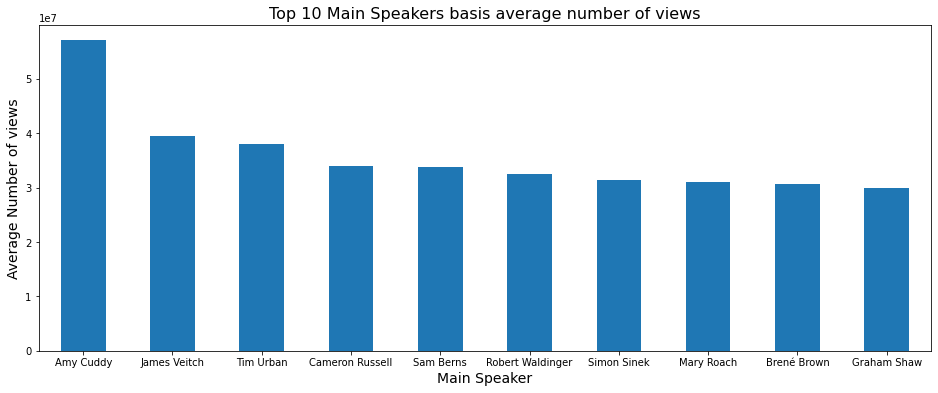

In [51]:
# Top 10 Main Speakers basis average views of Ted Talks 
data.groupby('speaker_1')['views'].mean().sort_values(ascending=False)[:10].plot(kind='bar',figsize=(16,6))
plt.xticks(rotation=0)
plt.title('Top 10 Main Speakers basis average number of views',fontsize=16)
plt.xlabel('Main Speaker',fontsize=14)
plt.ylabel("Average Number of views", fontsize=14)

In [52]:
data[data['speaker_1']=='Sir Ken Robinson']

talk_id                                   title         speaker_1  \
4          66             Do schools kill creativity?  Sir Ken Robinson   
660       865       Bring on the learning revolution!  Sir Ken Robinson   
1451     1738  How to escape education's death valley  Sir Ken Robinson   

                 all_speakers  \
4     {0: 'Sir Ken Robinson'}   
660   {0: 'Sir Ken Robinson'}   
1451  {0: 'Sir Ken Robinson'}   

                                         about_speakers     views  \
4     {0: "Creativity expert Sir Ken Robinson challe...  65051954   
660   {0: "Creativity expert Sir Ken Robinson challe...   9316886   
1451  {0: "Creativity expert Sir Ken Robinson challe...  10011678   

     recorded_date published_date                event native_lang  \
4       2006-02-25     2006-06-27              TED2006          en   
660     2010-02-06     2010-05-24              TED2010          en   
1451    2013-04-23     2013-05-10  TED Talks Education          en   

                                         available_lang  comments  duration  \
4     [af, ar, az, be, bg, bn, ca, cs, da, de, el, e...    4931.0      1164   
660   [ar, bg, bn, bs, ca, cs, da, de, el, en, es, e...    1274.0      1008   
1451  [ar, bg, bn, ca, cs, da, de, el, en, es, et, f...     664.0      1151   

                                                 topics  \
4     [children, creativity, culture, dance, educati...   
660        [children, creativity, education, invention]   
1451            [culture, education, teaching, student]   

                                          related_talks  \
4     {865: 'Bring on the learning revolution!', 173...   
660   {66: 'Do schools kill creativity?', 1738: 'How...   
1451  {66: 'Do schools kill creativity?', 865: 'Brin...   

                                            description  \
4     Sir Ken Robinson makes an entertaining and pro...   
660   In this poignant, funny follow-up to his fable...   
1451  Sir Ken Robinson outlines 3 principles crucial...   

                                             transcript occupation1  
4     Good morning. How are you? (Audience) Good. It...      author  
660   I was here four years ago, and I remember, at ...      author  
1451  Thank you very much. I moved to America 12 yea...      author

In [53]:
data[data['speaker_1']=='Amy Cuddy']

talk_id                                     title  speaker_1  \
1296     1569  Your body language may shape who you are  Amy Cuddy   

          all_speakers                                     about_speakers  \
1296  {0: 'Amy Cuddy'}  {0: 'Amy Cuddy’s research on body language rev...   

         views recorded_date published_date           event native_lang  \
1296  57074270    2012-06-26     2012-10-01  TEDGlobal 2012          en   

                                         available_lang  comments  duration  \
1296  [ar, az, bg, ca, cs, da, de, el, en, es, et, f...    2633.0      1262   

                                                 topics  \
1296  [body language, brain, business, psychology, s...   

                                          related_talks  \
1296  {1042: 'The power of vulnerability', 26915: 'H...   

                                            description  \
1296  (NOTE: Some of the findings presented in this ...   

                                             transcript          occupation1  
1296  So I want to start by offering you a free no-t...  social psychologist

In [54]:
data[data['speaker_1']=='James Veitch']

talk_id                                              title  \
2062     2405  This is what happens when you reply to spam email   
2220     2577                 The agony of trying to unsubscribe   

         speaker_1         all_speakers  \
2062  James Veitch  {0: 'James Veitch'}   
2220  James Veitch  {0: 'James Veitch'}   

                                         about_speakers     views  \
2062  {0: 'For James Veitch, a British writer and co...  56932551   
2220  {0: 'For James Veitch, a British writer and co...  21911090   

     recorded_date published_date             event native_lang  \
2062    2015-12-08     2016-01-08  TEDGlobal>Geneva          en   
2220    2016-06-29     2016-09-02         TEDSummit          en   

                                         available_lang  comments  duration  \
2062  [ar, be, bg, ca, cs, da, de, el, en, es, fa, f...     257.0       588   
2220  [ar, bg, cs, da, de, el, en, es, fa, fi, fr, f...      73.0       460   

                                                 topics  \
2062  [comedy, curiosity, communication, humor, tech...   
2220  [communication, comedy, technology, humor, bus...   

                                          related_talks  \
2062  {2236: 'Why we laugh', 26: 'If I controlled th...   
2220  {2458: 'Inside the mind of a master procrastin...   

                                            description  \
2062  Suspicious emails: unclaimed insurance bonds, ...   
2220  It happens to all of us: you unsubscribe from ...   

                                             transcript          occupation1  
2062  A few years ago, I got one of those spam email...  comedian and writer  
2220  It's funny the things you forget. I went to se...  comedian and writer

In [55]:
data[data['speaker_1']=='Tim Urban']

talk_id                                       title  speaker_1  \
2108     2458  Inside the mind of a master procrastinator  Tim Urban   

          all_speakers                                     about_speakers  \
2108  {0: 'Tim Urban'}  {0: 'With Wait But Why, Tim Urban demonstrates...   

         views recorded_date published_date    event native_lang  \
2108  37976820    2016-02-16     2016-03-15  TED2016          en   

                                         available_lang  comments  duration  \
2108  [ar, bg, ca, cs, da, de, el, en, es, fa, fi, f...     559.0       843   

                                                 topics  \
2108  [brain, comedy, decision-making, entertainment...   

                                          related_talks  \
2108  {1993: 'Comics that ask "what if?"', 1367: 'Sa...   

                                            description  \
2108  Tim Urban knows that procrastination doesn't m...   

                                             transcript occupation1  
2108  So in college, I was a government major, which...     blogger

**Observations**:
1. Alex Gendler, educator of TED-Ed, has given maximum number of Ted Talks (34 Talks) and has highest total views.
2. Amy Cuddy, a social psychologist, has the highest average number of views for Ted Talks.
3. TED team may consider creating more talks with Amy Cuddy, James Veitch and Tim Urban etc. who have highest average views.

### **3. What type of events have highest count and highest average number of views?**

In [56]:
# Top 10 TED events basis counts of talks
data['event'].value_counts()[:10]

TED-Ed            556
TED2018            96
TED2017            96
TED2019            91
TED2014            84
TED2009            81
TED2016            75
TED2013            75
TED2015            75
TEDGlobal 2012     70
Name: event, dtype: int64

In [57]:
# There are total 459 unique events, out of which only 436 events explicitly TED talks. 
data['event'].nunique(), (data[data['event'].str.contains('TED')])['event'].nunique()
# Lets investigate other non-TED talks for better clarity

(459, 436)

In [58]:
data['event'].unique()

array(['TED2006', 'TED2004', 'TED2005', 'TEDGlobal 2005', 'TEDSalon 2006',
       'TED2003', 'TED2007', 'TED2002', 'TEDGlobal 2007', 'TED2001',
       'TEDSalon 2007 Hot Science', 'Skoll World Forum 2007', 'TED2008',
       'TED1984', 'TED1990', 'DLD 2007', 'EG 2007', 'TED1998',
       'LIFT 2007', 'TED Prize Wish', 'TEDSalon 2009 Compassion',
       'Chautauqua Institution', 'Serious Play 2008', 'Taste3 2008',
       'TED in the Field', 'TED2009', 'EG 2008',
       'Elizabeth G. Anderson School', 'TEDxUSC', 'TED@State',
       'TEDGlobal 2009', 'TEDxKC', 'TEDIndia 2009',
       'TEDSalon London 2009', 'TEDxTC', 'TEDMED 2009', 'TEDxSMU',
       'TEDxBoston 2009', 'TEDxBerlin', 'TED2010', 'TEDxAmsterdam',
       'TEDxNASA', 'Mission Blue Voyage', 'TEDxPuget Sound', 'TEDxNYED',
       'TEDSalon London 2010', 'TEDxEdmonton', 'TED@Cannes',
       'TEDxAtlanta', 'TEDxEast', 'TEDxOilSpill', 'TEDGlobal 2010',
       'TEDxBoston 2010', 'Business Innovation Factory', 'TEDxYYC',
       'TEDxChan

On exploring TED website, found that talks are categorised under below set of Programs & initiatives:
1. **TEDx** : local speakers presenting to local audiences about everything from politics to pollination.
2. **TED Fellows** : Each year, a new group of TED Fellows from around the world, and from every discipline, are welcomed into this international community of remarkable thinkers.
3. **TED Ed** : TED's education initiative — makes short video lessons worth sharing, aimed at educators and students. 
4. **TED Institute** (TED@BCG etc.) :  innovative ideas, cutting-edge research and fresh approaches to challenging problems can be discovered inside visionary organizations around the world. The TED Institute helps surface and share these insights.
5. **TED@Work** : TED Talks reimagined for workplace learning (New).
6. **TED Conferences** (As: TED2022) : Every year, TED hosts conferences to bring together a group of expert thinkers and doers across a wide range of fields to help share new ideas.
7. **Special Events**: In addition to the official TED Conferences, TED regularly hosts special events around the globe, which include programs created with specific communities in mind.. 
  1. **TED Women**
  2. **TED Salon** : welcome an intimate audience for an afternoon or evening of highly-curated TED Talks revolving around a globally relevant theme.
  3. **TED Summit** : gathers the most engaged members of the global TED community for community brainstorms, discussions

In [59]:
event_names = ['TEDx','TEDMED','TEDWomen','TEDSummit','TEDGlobal','TED@','TEDYouth','TEDSalon','TEDActive','TEDCity','TED-Ed','TEDIndia','TED20','TED19']

In [60]:
for name in event_names:
  for i,row in data.iterrows():
    if name in row['event']:
      data.loc[i,'event'] = name

In [61]:
data['event'] =np.where(~data['event'].str.contains('TED'),'Others',data['event'])
data['event'] =np.where(data['event'].str.contains('TED Prize'),'TEDPrize',data['event'])
data['event'] =np.where(data['event'].str.contains('TED Salon'),'TEDSalon',data['event'])
data['event'] =np.where(data['event'].str.contains('TED Talks India'),'TEDIndia',data['event'])
data['event'] =np.where(data['event'].str.contains('TED Fellows'),'TEDFellows',data['event'])
data['event'] =np.where(data['event'].str.contains('TED Talks'),'Others',data['event'])
data['event'] =np.where(data['event'].str.contains('TED Fellows'),'TEDFellows',data['event'])
data['event'] =np.where(data['event'].str.contains('TED en Español en NYC'),'Others',data['event'])
data['event'] =np.where(data['event'].str.contains('TED in the Field'),'Others',data['event'])
data['event'] =np.where(data['event'].str.contains('TED20'),'TED_yearly_Conf',data['event'])
data['event'] =np.where(data['event'].str.contains('TED19'),'TED_yearly_Conf',data['event'])
data['event'] =np.where(data['event'].str.contains('TED '),'Others',data['event'])
data['event'] =np.where(data['event'].str.contains('TED Residency'),'Others',data['event'])
data['event'] =np.where(data['event'].str.contains('TEDLagos'),'TEDCity',data['event'])
data['event'] =np.where(data['event'].str.contains('TEDNairobi'),'TEDCity',data['event'])
data['event'] =np.where(data['event'].str.contains('TEDNYC'),'TEDCity',data['event'])
data['event'] =np.where(data['event'].str.contains('TEDPrize'),'Others',data['event'])

In [62]:
# List of unique Events after grouping similar events together.
data['event'].unique()

array(['TED_yearly_Conf', 'TEDGlobal', 'TEDSalon', 'Others', 'TEDx',
       'TED@', 'TEDIndia', 'TEDMED', 'TEDWomen', 'TEDActive', 'TEDYouth',
       'TED-Ed', 'TEDCity', 'TEDFellows', 'TEDSummit'], dtype=object)

Text(0, 0.5, 'Total Number of TED talks')

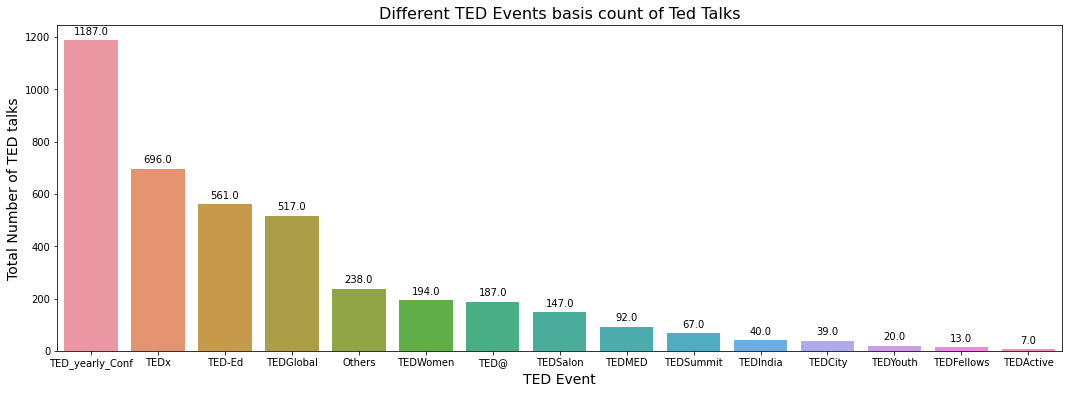

In [63]:
# Event types and their respective counts of Ted talks
fig, ax = plt.subplots(figsize=(18,6))
plt4 = sns.countplot(x='event',data=data,order=data['event'].value_counts().index)
annot(plt4)
plt.xticks(rotation=0)
ax.set_title('Different TED Events basis count of Ted Talks',fontsize=16)
ax.set_xlabel('TED Event',fontsize=14)
ax.set_ylabel("Total Number of TED talks", fontsize=14)

Text(0, 0.5, 'Average number of Views')

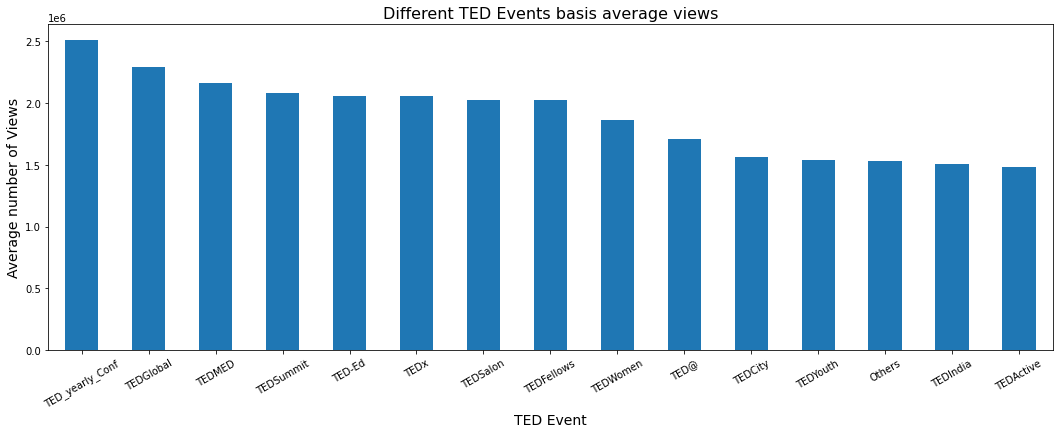

In [64]:
# Event type and their average views for ted talks.
data.groupby('event')['views'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(18,6))
plt.xticks(rotation=30)
plt.title('Different TED Events basis average views',fontsize=16)
plt.xlabel('TED Event',fontsize=14)
plt.ylabel("Average number of Views", fontsize=14)
# Ted talks hosted directly on Ted platform has more average number of views than those hosted somewhere other than Ted platform.

**Observations**:
1. There are total 459 unique events, out of which 436 events are explicitly TED talks. Majority of Ted Talks (3862) were hosted on TeD platform directly.
2. Based on TED official website, i have grouped different TED event types together into various categories as TEDx, TEDFellows, TEDEd, TED_yearly_conf, TEDWomen, TEDSalon,TEDSummit, TEDtalks etc.
3. TED Conference (yearly) has the highest number of talks; followed by TEDx and TED-ed.
4. "TED Conference (yearly)" event has the highest average views per talk; shortly followed by event type "TED Global".

### **4. Native Language and its relationship with average count of views?**

In [65]:
data['native_lang'].value_counts(normalize=True)
# Almost 99% Ted talks has english as Native language.

en       0.988015
es       0.006742
fr       0.002247
ja       0.000749
hi       0.000499
de       0.000250
pt       0.000250
ko       0.000250
zh-cn    0.000250
ar       0.000250
pt-br    0.000250
it       0.000250
Name: native_lang, dtype: float64

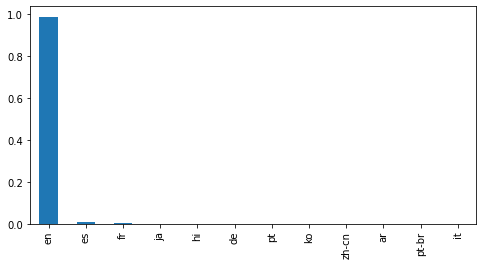

In [66]:
# Native language and respective count of TED talks.
data['native_lang'].value_counts(normalize=True).plot(kind='bar',figsize=(8,4))

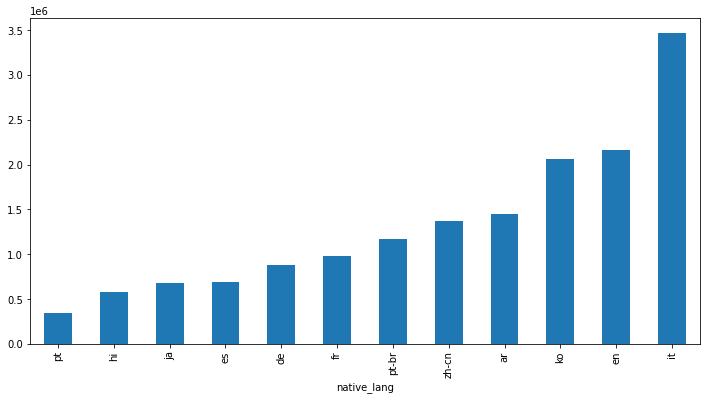

In [67]:
# Native language and respective average views of TED talks.
data.groupby('native_lang')['views'].mean().sort_values().plot(kind='bar',figsize=(12,6))
# 99% of Talks have english as their native language; however average number of views is highest for "it" language Talks.
# 'it' stands for italian.

In [68]:
data[data['native_lang']=='it']
# There is only one Ted Talk in 'it' language published in 2017 by Pope Francis, and is now available in 32 languages and has ~35 lakh views.

talk_id                                              title  \
2383     2744  Why the only future worth building includes ev...   

                      speaker_1                      all_speakers  \
2383  His Holiness Pope Francis  {0: 'His Holiness Pope Francis'}   

                                         about_speakers    views  \
2383  {0: 'Pope Francis is the Bishop of Rome and th...  3466037   

     recorded_date published_date            event native_lang  \
2383    2017-04-25     2017-04-26  TED_yearly_Conf          it   

                                         available_lang  comments  duration  \
2383  [ar, be, bg, de, el, en, es, fa, fr, he, hr, h...     284.0      1072   

                                                 topics  \
2383  [children, climate change, Christianity, commu...   

                                          related_talks  \
2383  {2110: 'Let's help refugees thrive, not just s...   

                                            description  \
2383  A single individual is enough for hope to exis...   

                                             transcript     occupation1  
2383  [His Holiness Pope Francis Filmed in Vatican C...  bishop of rome

In [69]:
# 3rd highest average views.
data[data['native_lang']=='ko']
# There is only one Ted Talk in 'ko' language published in 2010.

talk_id                     title     speaker_1         all_speakers  \
1386     1653  Be an artist, right now!  Young-ha Kim  {0: 'Young-ha Kim'}   

                                         about_speakers    views  \
1386  {0: 'One of the premiere writers of his genera...  2057706   

     recorded_date published_date event native_lang  \
1386    2010-07-24     2013-02-15  TEDx          ko   

                                         available_lang  comments  duration  \
1386  [ar, az, de, en, es, fa, fr, he, it, ja, ko, m...     161.0      1017   

                                             topics  \
1386  [TEDx, creativity, writing, art, spoken word]   

                                          related_talks  \
1386  {815: 'What adults can learn from kids', 1410:...   

                                            description  \
1386  Why do we ever stop playing and creating? With...   

                                             transcript occupation1  
1386  The theme of my talk today is, "Be an artist, ...      writer

In [70]:
data[data['native_lang']=='ar']
# arabic native languga: 4th highest average views

talk_id                     title        speaker_1  \
1600     1803  Don't kill your language  Suzanne Talhouk   

                all_speakers  \
1600  {0: 'Suzanne Talhouk'}   

                                         about_speakers    views  \
1600  {0: 'Suzanne Talhouk is an advocate for the Ar...  1452611   

     recorded_date published_date event native_lang  \
1600    2012-12-18     2014-01-06  TEDx          ar   

                                         available_lang  comments  duration  \
1600  [ar, az, bg, cs, de, el, en, eo, es, fa, fr, g...     364.0       852   

                                 topics  \
1600  [TEDx, culture, language, poetry]   

                                          related_talks  \
1600  {1106: 'Don't insist on English!', 1462: 'The ...   

                                            description  \
1600  More and more, English is a global language; s...   

                                             transcript  \
1600  Good morning! Are you awake? They took my name...   

                     occupation1  
1600  poet and language advocate

**Observations**:
1. Almost 99% Ted talks has english as Native language.
2. Only 1 TED talk was delivered in native language Italian, and it has the highest average views. After Italian, talks in native language english has 2nd highest average views.
3. On exploring the talk in italian lanuage, found that the same was given by Pope Francise in year 2017, and its available in total 32 langugaes with ~35 lakhs views.

### **5. Top 10 topics basis count of talks and basis average views?**

In [71]:
# Getting total count and complete list of unique topics for overall dataset
num_topics=0
topic_dict = {}
for i,row in data.iterrows():
  lst = row['topics']
  for item in lst:
    if item in topic_dict.keys():
      topic_dict[item] += 1
    else:
      topic_dict[item] = 1
      num_topics +=1

In [72]:
print('Total unique topics:',num_topics)
print('List of unique topics',topic_dict.keys())

Total unique topics: 457
List of unique topics dict_keys(['alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology', 'Africa', 'Asia', 'Google', 'demo', 'economics', 'health', 'statistics', 'global development', 'visualizations', 'math', 'computers', 'entertainment', 'interface design', 'media', 'music', 'performance', 'simplicity', 'software', 'MacArthur grant', 'activism', 'business', 'cities', 'green', 'inequality', 'politics', 'pollution', 'children', 'creativity', 'dance', 'education', 'parenting', 'teaching', 'architecture', 'collaboration', 'design', 'library', 'Christianity', 'God', 'atheism', 'comedy', 'religion', 'storytelling', 'humor', 'brain', 'cognitive science', 'consciousness', 'evolution', 'philosophy', 'happiness', 'leadership', 'motivation', 'philanthropy', 'TED Prize', 'film', 'peace', 'social change', 'art', 'movies', 'disease', 'ebola', 'disaster relief', 'invention', 'open-source', 'entrep

In [73]:
sorted(topic_dict.items(), key=lambda item: item[1])[-10:]
# Science is the most popular topic and it is present in 993 talks; followed by Technology.

[('animation', 487),
 ('social change', 512),
 ('design', 518),
 ('society', 557),
 ('TED-Ed', 563),
 ('global issues', 574),
 ('TEDx', 581),
 ('culture', 680),
 ('technology', 979),
 ('science', 993)]

Text(0.5, 1.0, 'Top 10 most-frequent topics')

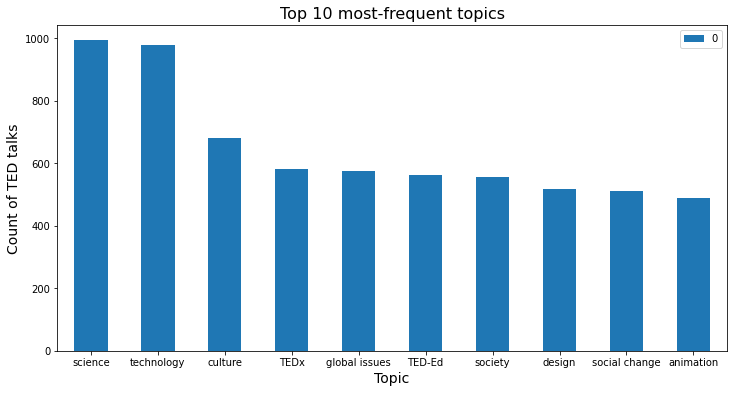

In [74]:
# Top 10 topics basis count of TED Talks
topic_counts_df = pd.DataFrame.from_dict(topic_dict,orient ='index')
topic_counts_df.sort_values(by=0,ascending=False)[:10].plot(kind='bar',figsize=(12,6))
plt.xticks(rotation=0)
plt.xlabel('Topic',fontsize=14)
plt.ylabel('Count of TED talks',fontsize=14)
plt.title('Top 10 most-frequent topics',fontsize=16)

In [75]:
topic_df = data.copy()

In [76]:
# Most viewed Topics
# Creating a dictionary with topic as key and corresponding average views as value.
topic_wise_avg_views = {}
for topic in list(topic_dict.keys()):
  count = 0
  views2 = 0
  for i,row in topic_df.iterrows():
    if topic in row['topics']:
      views2 += row['views']
      count += 1
  topic_wise_avg_views[topic] = views2//count

In [77]:
# Top 10 Most viewed Topics.
sorted(topic_wise_avg_views.items(), key=lambda item: item[1])[-10:]
# Talks based on topic "body language" has the highest average views and it is present in only 12 talks.
# Most of the topics among top 10 most viwed talks are related to Well-being and Self-help.

[('time', 4766538),
 ('comedy', 4899442),
 ('suicide', 4971946),
 ('meditation', 5178463),
 ('productivity', 5290027),
 ('String theory', 5599329),
 ('mindfulness', 6221133),
 ('success', 6669637),
 ('introvert', 8575486),
 ('body language', 10196415)]

Text(0.5, 1.0, 'Top 10 most-viewed topics basis average views')

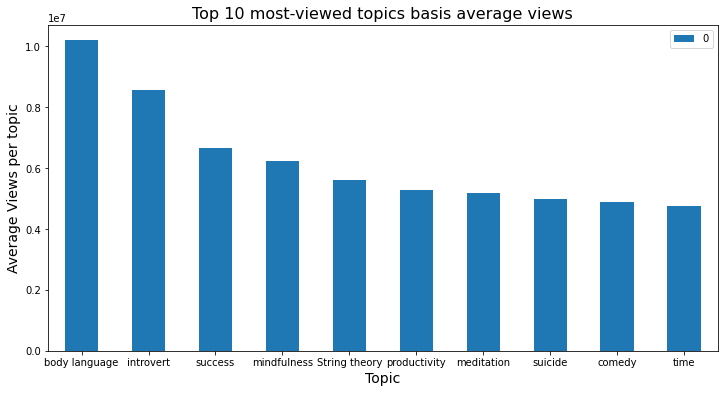

In [78]:
topic_viewed_df = pd.DataFrame.from_dict(topic_wise_avg_views,orient ='index')
topic_viewed_df.sort_values(by=0,ascending=False)[:10].plot(kind='bar',figsize=(12,6))
plt.xticks(rotation=0)
plt.xlabel('Topic',fontsize=14)
plt.ylabel('Average Views per topic',fontsize=14)
plt.title('Top 10 most-viewed topics basis average views',fontsize=16)

In [79]:
topic_dict['body language']

12

In [80]:
# Most commented topics
# Creating a dictionary with topic as key and corresponding average views as value.
topic_wise_avg_comments = {}
for topic in list(topic_dict.keys()):
  count31 = 0
  comments1 = 0
  for i,row in topic_df.iterrows():
    if topic in row['topics']:
      comments1 += row['comments']
      count31 += 1
  topic_wise_avg_comments[topic] = comments1//count31

In [81]:
# Top 10 Most commented Topics.
sorted(topic_wise_avg_comments.items(), key=lambda item: item[1])[-10:]
# Talks based on topic "atheism" has the highest average comments and it is present in only 5 talks.
# Most of the topics among top 10 most commented are related to  Religion and Psychology.
# Above topics are quite controversial or thought-provoking and thus has more engagement and spark more discussions.

[('String theory', 379.0),
 ('introvert', 386.0),
 ('religion', 405.0),
 ('meme', 428.0),
 ('Christianity', 474.0),
 ('body language', 480.0),
 ('evolutionary psychology', 494.0),
 ('suicide', 617.0),
 ('God', 889.0),
 ('atheism', 2037.0)]

Text(0.5, 1.0, 'Top 10 most-commented topics basis average comments')

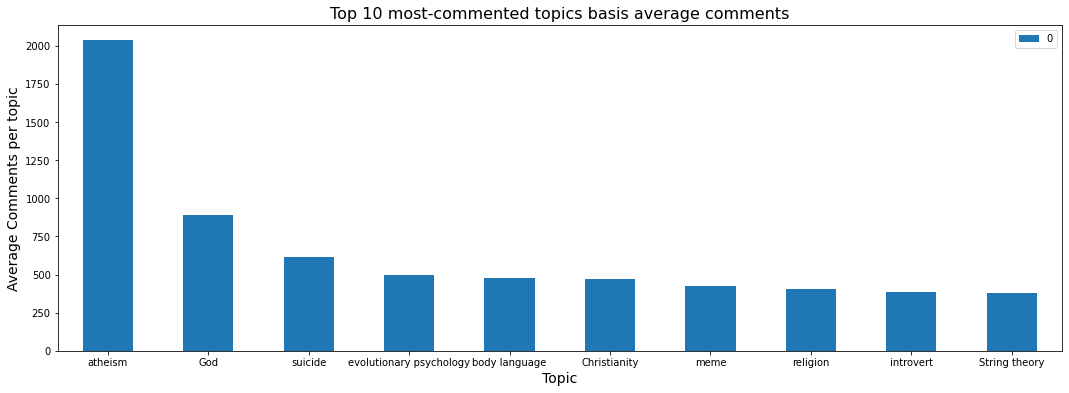

In [82]:
topic_comm_df = pd.DataFrame.from_dict(topic_wise_avg_comments,orient ='index')
topic_comm_df.sort_values(by=0,ascending=False)[:10].plot(kind='bar',figsize=(18,6))
plt.xticks(rotation=0)
plt.xlabel('Topic',fontsize=14)
plt.ylabel('Average Comments per topic',fontsize=14)
plt.title('Top 10 most-commented topics basis average comments',fontsize=16)

In [83]:
topic_dict['atheism']

5

**Observations**:
1. There are total 457 unique topics against talks given in dataset.
2. The most popular topic basis the highest number of talks is Science (993 talks); shortly followed by Technology. Culture topic is the 3rd most popular topic.
3. Talks based on topic "body language" has the highest average views (~10million) and it is present in only 12 talks. Since this topic has highest average views and only 12 talks, TED team may consider creating new contents on/around this topic to maximize views.
4. Most of the topics among top 10 most viewed are related to Well-being, Success/Productivity, Science and Comedy.
5. Talks based on topic "atheism" has the highest average comments and it is present in only 5 talks.
6. Most of the topics among top 10 most commented are related to  Religion and Psychology. Above topics are quite controversial or thought-provoking and thus has more engagement and spark more discussions.

### **6. Top 10 Ted Talks basis count of views**

In [84]:
top_views_df = data.sort_values(by='views',ascending=False)[:10].reset_index(drop=True)
top_views_df
# "Do schools kill creativity" by Sir Ken Robinson (2006,English) 
# is the most viewed talk given in TED Conference of ~19 minutes and has 4931 comments.

talk_id                                              title  \
0       66                        Do schools kill creativity?   
1     1569           Your body language may shape who you are   
2     2405  This is what happens when you reply to spam email   
3      848                   How great leaders inspire action   
4     1042                         The power of vulnerability   
5     2034         How to speak so that people want to listen   
6     2458         Inside the mind of a master procrastinator   
7     1647  Looks aren't everything. Believe me, I'm a model.   
8    13587                     My philosophy for a happy life   
9     2225                 The next outbreak? We're not ready   

          speaker_1             all_speakers  \
0  Sir Ken Robinson  {0: 'Sir Ken Robinson'}   
1         Amy Cuddy         {0: 'Amy Cuddy'}   
2      James Veitch      {0: 'James Veitch'}   
3       Simon Sinek       {0: 'Simon Sinek'}   
4       Brené Brown       {0: 'Brené Brown'}   
5   Julian Treasure   {0: 'Julian Treasure'}   
6         Tim Urban         {0: 'Tim Urban'}   
7   Cameron Russell   {0: 'Cameron Russell'}   
8         Sam Berns         {0: 'Sam Berns'}   
9        Bill Gates        {0: 'Bill Gates'}   

                                      about_speakers     views recorded_date  \
0  {0: "Creativity expert Sir Ken Robinson challe...  65051954    2006-02-25   
1  {0: 'Amy Cuddy’s research on body language rev...  57074270    2012-06-26   
2  {0: 'For James Veitch, a British writer and co...  56932551    2015-12-08   
3  {0: 'Simon Sinek explores how leaders can insp...  49730580    2009-09-17   
4  {0: 'Brené Brown studies vulnerability, courag...  47544833    2010-06-06   
5  {0: 'Julian Treasure studies sound and advises...  41504331    2013-06-10   
6  {0: 'With Wait But Why, Tim Urban demonstrates...  37976820    2016-02-16   
7  {0: "Cameron Russell has stomped the runways f...  33874546    2012-10-27   
8  {0: 'Before his death in 2014, Sam Berns was a...  33691484    2013-10-25   
9  {0: "A passionate techie and a shrewd business...  33521780    2015-03-18   

  published_date            event native_lang  \
0     2006-06-27  TED_yearly_Conf          en   
1     2012-10-01        TEDGlobal          en   
2     2016-01-08        TEDGlobal          en   
3     2010-05-04             TEDx          en   
4     2010-12-23             TEDx          en   
5     2014-06-27        TEDGlobal          en   
6     2016-03-15  TED_yearly_Conf          en   
7     2013-01-16             TEDx          en   
8     2018-03-28             TEDx          en   
9     2015-04-03  TED_yearly_Conf          en   

                                      available_lang  comments  duration  \
0  [af, ar, az, be, bg, bn, ca, cs, da, de, el, e...    4931.0      1164   
1  [ar, az, bg, ca, cs, da, de, el, en, es, et, f...    2633.0      1262   
2  [ar, be, bg, ca, cs, da, de, el, en, es, fa, f...     257.0       588   
3  [ar, bg, bn, ca, cs, da, de, el, en, eo, es, e...    2079.0      1084   
4  [ar, be, bg, ca, cs, da, de, el, en, es, et, e...    2209.0      1219   
5  [ar, bg, ca, cs, da, de, el, en, es, fa, fi, f...     405.0       598   
6  [ar, bg, ca, cs, da, de, el, en, es, fa, fi, f...     559.0       843   
7  [ar, be, bg, bn, ca, cs, da, de, el, en, es, f...     917.0       577   
8  [ar, be, cs, da, de, el, en, es, fa, fr, he, h...      89.0       765   
9  [ar, bg, cs, da, de, el, en, es, fa, fr, fr-ca...     439.0       512   

                                              topics  \
0  [children, creativity, culture, dance, educati...   
1  [body language, brain, business, psychology, s...   
2  [comedy, curiosity, communication, humor, tech...   
3  [TEDx, business, entrepreneur, leadership, suc...   
4  [TEDx, communication, culture, depression, fea...   
5                           [culture, sound, speech]   
6  [brain, comedy, decision-making, entertainment...   
7      [TEDx, beauty, culture, fashion, photography]

In [85]:
# Main speakers of Top 10 most viewed talks
top_views_df['speaker_1'].value_counts()

Sir Ken Robinson    1
Amy Cuddy           1
James Veitch        1
Simon Sinek         1
Brené Brown         1
Julian Treasure     1
Tim Urban           1
Cameron Russell     1
Sam Berns           1
Bill Gates          1
Name: speaker_1, dtype: int64

In [86]:
# Topics of Top 10 most viewed talks.
# Creating a dictionary with topic as key and corresponding average views as value.
topic_avg_views10 = {}
for topic in list(topic_dict.keys()):
  count10 = 0
  views10 = 0
  for i,row in top_views_df.iterrows():
    if topic in row['topics']:
      views10 += row['views']
      count10 += 1
  if count10 != 0 :
    topic_avg_views10[topic] = views10//count10

In [87]:
print(topic_avg_views10)
# Global issues, Productivity, Psychology, Leadership, Comedy, Body Language and Creativity.

{'culture': 46993916, 'global issues': 33521780, 'science': 57074270, 'technology': 56932551, 'visualizations': 37976820, 'entertainment': 37976820, 'business': 53402425, 'children': 65051954, 'creativity': 65051954, 'dance': 65051954, 'education': 65051954, 'parenting': 65051954, 'teaching': 65051954, 'comedy': 47454685, 'humor': 47454685, 'brain': 47525545, 'happiness': 33691484, 'leadership': 49730580, 'motivation': 33691484, 'social change': 47544833, 'disease': 33521780, 'ebola': 33521780, 'disaster relief': 33521780, 'entrepreneur': 49730580, 'communication': 52238692, 'psychology': 52309551, 'choice': 37976820, 'decision-making': 37976820, 'personal growth': 33691484, 'photography': 33874546, 'medicine': 33521780, 'success': 53402425, 'work': 37976820, 'time': 37976820, 'war': 33521780, 'online video': 37976820, 'self': 46103529, 'depression': 47544833, 'mental health': 47544833, 'writing': 37976820, 'beauty': 33874546, 'life': 33691484, 'fashion': 33874546, 'goal-setting': 3797

In [88]:
top_views_df['event'].value_counts()
# Top 10 most viewed talks are either TEDx or TED Conference or TED Global.

TEDx               4
TED_yearly_Conf    3
TEDGlobal          3
Name: event, dtype: int64

In [89]:
top_views_df['num_lang'] = top_views_df['available_lang'].apply(lambda x:len(x))
top_views_df['num_lang'].mean()
# On average, top 10 most viewed talks are available in ~48 languages.

47.5

In [90]:
round(top_views_df['duration'].mean()/60,2), list(top_views_df['native_lang'].unique()), top_views_df['comments'].mean()
# Average duration of top 10 most viewed talks is ~14 minutes.
# All top 10 most viewed talks are in english native language.
# Average comments received by top 10 most viewed talks is ~1452.

(14.35, ['en'], 1451.8)

Text(0, 0.5, 'Titles of TED Talks')

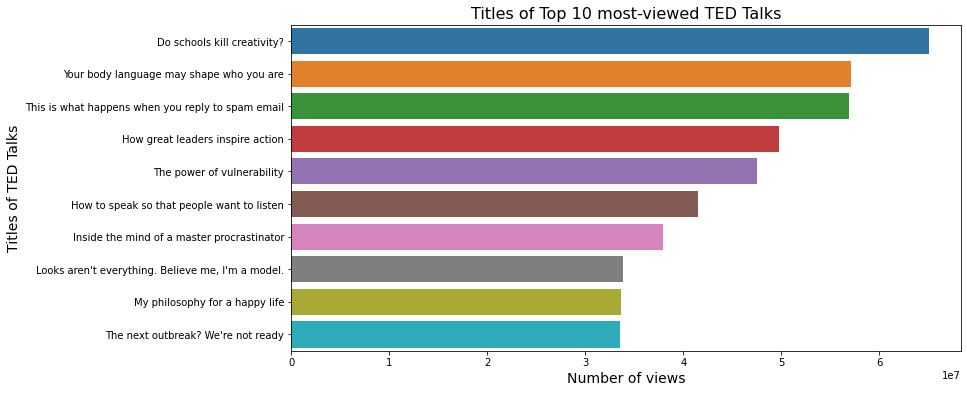

In [91]:
# Title and #views of top 10 viewed Ted Talks.
plt.figure(figsize=(12,6))
plt5=sns.barplot(y='title',x='views',data=top_views_df,orient='h')
plt5.set_title('Titles of Top 10 most-viewed TED Talks',fontsize=16)
plt5.set_xlabel('Number of views',fontsize=14)
plt5.set_ylabel('Titles of TED Talks',fontsize=14)

**Observations**:
1. "Do schools kill creativity" by Sir Ken Robinson (2006,English) is the most viewed talk given in TED Conference of ~19 minutes and has 4931 comments.
2. Most viewed talks have topics such as Creativity, Body Language, Comedy, Leadership, Psychology, Productivity and Global Issues.
3. Top 10 most viewed talks are either TEDx or TED Conference or TED Global.
4. On average, top 10 most viewed talks are available in ~48 languages.
5. For top 10 most viewed talks, Average duration is ~14 minutes and average comments is ~1452.
6. All top 10 most viewed talks are in english native language.

### **7. Top 10 Ted Talks basis count of comments**

In [92]:
top_comments_df = data.sort_values(by='comments',ascending=False)[:10].reset_index(drop=True)
top_comments_df.head(2)
# "Militant atheism" by Richard Dawkins (2007,English) 
# is the most commented talk given in TED Conference of ~29 minutes and has 6449 comments.

talk_id                        title         speaker_1  \
0      113             Militant atheism   Richard Dawkins   
1       66  Do schools kill creativity?  Sir Ken Robinson   

              all_speakers                                     about_speakers  \
0   {0: 'Richard Dawkins'}  {0: 'Oxford professor Richard Dawkins has help...   
1  {0: 'Sir Ken Robinson'}  {0: "Creativity expert Sir Ken Robinson challe...   

      views recorded_date published_date            event native_lang  \
0   5788514    2002-02-02     2007-04-16  TED_yearly_Conf          en   
1  65051954    2006-02-25     2006-06-27  TED_yearly_Conf          en   

                                      available_lang  comments  duration  \
0  [ar, bg, bn, ca, cs, da, de, el, en, es, fa, f...    6449.0      1750   
1  [af, ar, az, be, bg, bn, ca, cs, da, de, el, e...    4931.0      1164   

                                              topics  \
0         [God, atheism, culture, religion, science]   
1  [children, creativity, culture, dance, educati...   

                                       related_talks  \
0  {86: 'Letting go of God', 94: 'Let's teach rel...   
1  {865: 'Bring on the learning revolution!', 173...   

                                         description  \
0  Richard Dawkins urges all atheists to openly s...   
1  Sir Ken Robinson makes an entertaining and pro...   

                                          transcript             occupation1  
0  That splendid music, the coming-in music, "The...  evolutionary biologist  
1  Good morning. How are you? (Audience) Good. It...                  author

In [93]:
# Main speakers of Top 10 most commented talks
top_comments_df['speaker_1'].value_counts()

Richard Dawkins      1
Sir Ken Robinson     1
Sam Harris           1
David Chalmers       1
Jill Bolte Taylor    1
Amy Cuddy            1
Janet Echelman       1
Lesley Hazleton      1
Michael Specter      1
Brené Brown          1
Name: speaker_1, dtype: int64

In [94]:
# Topics of Top 10 most commented talks.
# Creating a dictionary with topic as key and corresponding average comments as value.
topic_avg_comments12 = {}
for topic in list(topic_dict.keys()):
  count41 = 0
  comments12 = 0
  for i,row in top_comments_df.iterrows():
    if topic in row['topics']:
      comments12 += row['comments']
      count41 += 1
  if count41 != 0 :
    topic_avg_comments12[topic] = comments12//count41

In [95]:
print(topic_avg_comments12)
# Atheism, Creativity, Science, Psychology, Culture, Body Language and Religion.

{'culture': 3667.0, 'global issues': 2809.0, 'science': 3571.0, 'technology': 2529.0, 'visualizations': 2529.0, 'business': 2633.0, 'cities': 2529.0, 'children': 4931.0, 'creativity': 4931.0, 'dance': 4931.0, 'education': 4931.0, 'parenting': 4931.0, 'teaching': 4931.0, 'design': 2529.0, 'God': 6449.0, 'atheism': 6449.0, 'religion': 3675.0, 'brain': 2874.0, 'consciousness': 2995.0, 'philosophy': 3215.0, 'social change': 2209.0, 'art': 2529.0, 'biology': 2984.0, 'communication': 2209.0, 'psychology': 2755.0, 'medicine': 2366.0, 'success': 2633.0, 'evolutionary psychology': 3424.0, 'self': 2421.0, 'illness': 2984.0, 'depression': 2209.0, 'mental health': 2209.0, 'writing': 2366.0, 'morality': 3424.0, 'body language': 2633.0, 'fear': 2209.0, 'neuroscience': 3006.0, 'TEDx': 2336.0, 'data': 2529.0, 'journalism': 2463.0}


In [96]:
top_comments_df['event'].value_counts()
# Top 10 most commented talks are either TED Conference or TEDx or TED Global.

TED_yearly_Conf    7
TEDx               2
TEDGlobal          1
Name: event, dtype: int64

In [97]:
top_comments_df['num_lang'] = top_comments_df['available_lang'].apply(lambda x:len(x))
top_comments_df['num_lang'].mean()
# On average, top 10 most commented talks are available in ~43 languages.

43.1

In [98]:
round(top_comments_df['duration'].mean()/60,2), list(top_comments_df['native_lang'].unique()), top_comments_df['comments'].mean()
# Average duration of top 10 most commented talks is ~19 minutes.
# All top 10 most commented talks are in english native language.
# Average comments received by top 10 most commented talks is ~3300.

(18.8, ['en'], 3299.4)

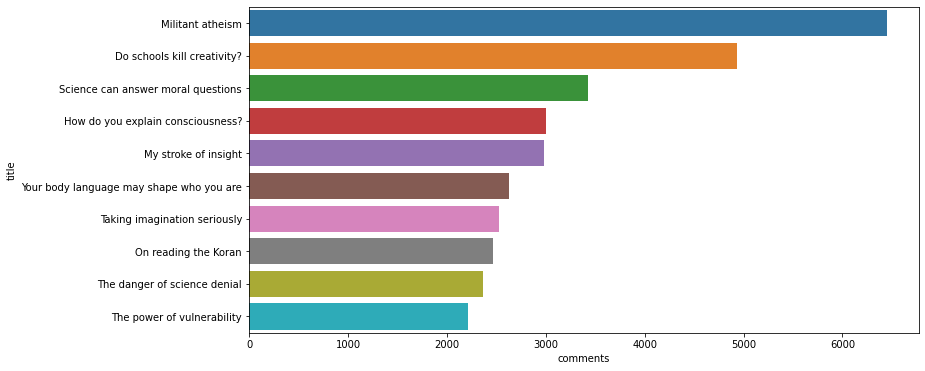

In [99]:
# Title and #comments of top 10 commented Ted Talks.
plt.figure(figsize=(12,6))
plt1=sns.barplot(y='title',x='comments',data=top_comments_df,orient='h')

**Observations**:
1. "Militant atheism" by Richard Dawkins (2007,English), is the most commented talk given in TED Conference of ~29 minutes and has 6449 comments.
2. Most commented talks are based on topics as Atheism, creativity, science, psychology, culture, bode language and Religion.
3. Top 10 most commented talks are either TED Conference or TEDx or TED Global.
4. On average, top 10 most commented talks are available in ~43 languages.
5. For top 10 most commented talks, Average duration is ~19 minutes and Average comments is ~3300.
6. All top 10 most commented talks are in english native language.

### **8. Least-Viewed but Most-Commented Talks**

In [100]:
# Getting those TED Talks which have received more comments (>85th percentile), but have less views(<15th percentile).
new_df = data.copy()
new_df =new_df[new_df['views']<(np.percentile(data['views'], 15, interpolation = 'midpoint'))]
new_df = new_df[new_df['comments']>(np.percentile(data['comments'], 85, interpolation = 'midpoint'))]
# Then we will extract the topics out of these talks.
# Since these talks are more commented, but less viewed; It signals there is significant gap between supply and demand.
# TED team can explore these topics and based on its positive/negative impact on society,
# They may decide either to create more content or stop creating such contents.

In [101]:
len(new_df)
# There are total 9 "Least-viewed but most-commented" talks, 
# i.e., with comments more than >85th percentile, but views less than 15th percentile.

9

In [102]:
new_df

talk_id                                    title          speaker_1  \
425       521         Does racism affect how you vote?        Nate Silver   
549       688                Dance to change the world   Mallika Sarabhai   
763       997                   E-voting without fraud      David Bismark   
835      1081             Curating humanity's heritage  Elizabeth Lindsey   
912      1165          The world's first charter city?         Paul Romer   
1013     1268              6 ways to save the internet      Roger McNamee   
1029     1290  Dance vs. powerpoint, a modest proposal      John Bohannon   
1063     1324     Thorium, an alternative nuclear fuel      Kirk Sorensen   
1193     1460            A reality check on renewables       David MacKay   

                                          all_speakers  \
425                                 {0: 'Nate Silver'}   
549                            {0: 'Mallika Sarabhai'}   
763                               {0: 'David Bismark'}   
835                           {0: 'Elizabeth Lindsey'}   
912                                  {0: 'Paul Romer'}   
1013                              {0: 'Roger McNamee'}   
1029  {0: 'John Bohannon', 1: ' Black Label Movement'}   
1063                              {0: 'Kirk Sorensen'}   
1193                               {0: 'David MacKay'}   

                                         about_speakers   views recorded_date  \
425   {0: 'Math whiz and baseball fan Nate Silver wa...  500636    2009-02-07   
549   {0: 'As the leader of Darpana, Mallika Sarabha...  594059    2009-11-04   
763   {0: 'David Bismark has co-developed an electro...  609303    2010-07-14   
835   {0: 'Elizabeth Lindsey is a fellow of the Nati...  536881    2010-12-08   
912   {0: "Paul Romer's research on catch-up growth ...  515102    2011-03-03   
1013  {0: 'Ten years from now we will interact with ...  341570    2011-03-02   
1029  {0: 'John Bohannon is a scientist and writer w...  551167    2011-11-22   
1063  {0: 'Kirk Sorensen stumbled across thorium whi...  606384    2011-04-01   
1193  {0: 'As an information theorist and computer s...  549221    2012-03-12   

     published_date            event native_lang  \
425      2009-04-22  TED_yearly_Conf          en   
549      2009-11-26         TEDIndia          en   
763      2010-11-02        TEDGlobal          en   
835      2011-02-23         TEDWomen          en   
912      2011-06-09  TED_yearly_Conf          en   
1013     2011-11-12             TEDx          en   
1029     2011-11-30             TEDx          en   
1063     2012-01-14             TEDx          en   
1193     2012-05-26             TEDx          en   

                                         available_lang  comments  duration  \
425   [ar, bg, de, el, en, es, fa, fr, he, hr, hu, i...     255.0       556   
549   [ar, bg, de, el, en, es, fr, he, hu, it, ja, k...     620.0      1012   
763   [ar, bg, cs, de, el, en, es, fa, fi, fr, fr-ca...     838.0       422   
835   [ar, bg, cs, de, el, en, es, fa, fr, he, hr, h...     560.0       613   
912   [ar, bg, cs, de, el, en, es, fa, fr, he, hr, h...     388.0       553   
1013  [ar, en, es, fa, fr, he, it, ko, pt, pt-br, ro...     255.0       933   
1029  [ar, bg, bn, cs, de, el, en, es, fa, fr, he, h...     335.0       677   
1063  [ar, da, en, es, fa, fr, hu, id, ja, ko, pt, p...     341.0       599   
1193  [ar, bg, de, el, en, es, fr, he, hu, it, ja, k...     303.0      1115   

                                                 topics  \
425   [cities, politics, race, statistics, urban pla...   
549   [culture, dance, entertainment, global issues,...   
763   [culture, democracy, design, global issues, go...   
835                        [anthropology, storytelling]   
912   [business, cities, culture, design, global iss...   
1013  [Internet, TEDx, business, future, investment,...   
1029  [TEDx, biology, dance, entertainment, physics,...   
1063  [TEDx, alternative energy, nuclear energy, tec...   


In [103]:
# Getting total count and complete list of unique topics for overall dataset
potential_topics=0
pot_topic_dict = {}
for i,row in new_df.iterrows():
  lst = row['topics']
  for item in lst:
    if item in pot_topic_dict.keys():
      pot_topic_dict[item] += 1
    else:
      pot_topic_dict[item] = 1
      potential_topics +=1

In [104]:
print('Total count of Least-viewed but most-commented topics is',potential_topics)
print('Topics and respective counts',pot_topic_dict)
# Politics, Voting, Racism, Dance, Humanity, Internet, Nuclear Energy and Alternative Energy (Renewables).

Total count of Least-viewed but most-commented topics is 35
Topics and respective counts {'cities': 2, 'politics': 3, 'race': 1, 'statistics': 1, 'urban planning': 1, 'culture': 3, 'dance': 2, 'entertainment': 2, 'global issues': 4, 'social change': 1, 'democracy': 1, 'design': 2, 'government': 1, 'technology': 4, 'anthropology': 1, 'storytelling': 1, 'business': 2, 'Internet': 1, 'TEDx': 4, 'future': 1, 'investment': 1, 'biology': 1, 'physics': 1, 'presentation': 1, 'science': 1, 'science and art': 1, 'alternative energy': 2, 'nuclear energy': 1, 'climate change': 1, 'data': 1, 'math': 1, 'solar energy': 1, 'sustainability': 1, 'wind energy': 1, 'electricity': 1}


In [105]:
new_df['event'].value_counts()
# Most of the "Least-viewed but most-commented talks" are organised under either TEDx or TED_Conference.

TEDx               4
TED_yearly_Conf    2
TEDIndia           1
TEDGlobal          1
TEDWomen           1
Name: event, dtype: int64

In [106]:
round(new_df['duration'].mean()/60,2)
# The average duration for "Least-viewed but most-commented" talks is ~12minutes.

12.0

**Observations**:
1. There are total 9 "Least-viewed but most-commented" talks, i.e., with comments more than >85th percentile, but views less than 15th percentile.
2. Since these talks are more commented but less viewed, it signals there is significant gap between supply and demand. TED team can explore these talks and its topics and further based on its positive/negative impact and whether it will contribute to a productive conversation or not, may decide either to create more similar content or not.
3. These talks are based around total 35 topics, which can be further condesed to topics as Politics, Voting, Racism, Dance, Humanity, Internet, Nuclear Energy and Alternative Energy (Renewables).
4. The average duration for "Least-viewed but most-commented" talks is ~12minutes.
5. Most of the "Least-viewed but most-commented talks" are organised under either TEDx or TED_Conference.

### **9. Duration of TED Talks**

In [107]:
bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70]
data.groupby(pd.cut(round((data['duration']/60),2),bins)).size()

duration
(0, 5]       640
(5, 10]      863
(10, 15]    1207
(15, 20]    1048
(20, 25]     191
(25, 30]      34
(30, 35]       8
(35, 40]       3
(40, 45]       2
(45, 50]       1
(50, 55]       3
(55, 60]       1
(60, 65]       3
(65, 70]       1
dtype: int64

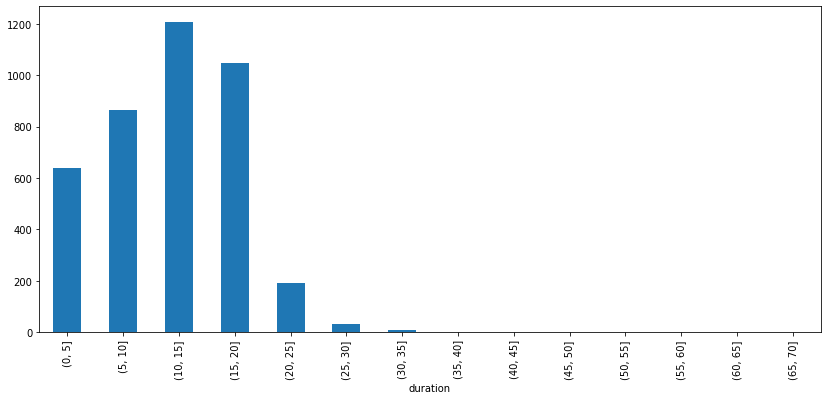

In [108]:
bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70]
data.groupby(pd.cut(round((data['duration']/60),2),bins)).size().plot(kind='bar',figsize=(14,6))
# Number of TED Talks is highest for duration of between 10-15minutes (1207 Talks); followed by talks of duration between 15-20minutes (1048 talks).

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

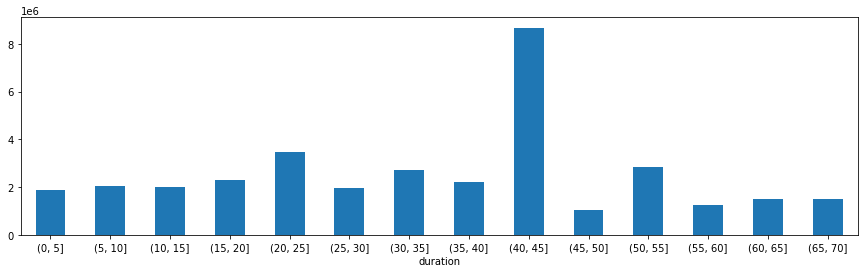

In [109]:
bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70]
data.groupby(pd.cut(round((data['duration']/60),2),bins)).views.mean().plot(kind='bar',figsize=(15,4))
plt.xticks(rotation=0)
# Average Number of views is highest for Ted talks of duration between 40-45minutes; followed by talks of duration between 20-25minutes.

**Observations**:
1. Number of TED Talks is highest for duration of between 10-15minutes (1207 Talks); followed by talks of duration between 15-20minutes (1048 talks).
2. Average Number of views is highest for Ted talks of duration between 40-45minutes. Since there is only 1 talk of 40-45min duration, so its outlier and therefore ignored.;
3. Talks of duration between 20-25minutes (i.e., 191 talks) have the 2nd highest average views.

## B(iii). Handling Outliers

In [110]:
# checking the names of relevant numerical columns
data.describe().columns
# 3 relevant numerical features
# lets check for any outliers

Index(['talk_id', 'views', 'comments', 'duration'], dtype='object')

**a) Comments column**

In [111]:
# checking statistical parameters of comments column.
data['comments'].describe(percentiles=[0,0.05,0.5,0.75,0.85,0.95,0.99,1])

count    4005.000000
mean      150.058677
std       247.346686
min         0.000000
0%          0.000000
5%         12.000000
50%        89.000000
75%       162.000000
85%       242.000000
95%       478.400000
99%      1003.920000
100%     6449.000000
max      6449.000000
Name: comments, dtype: float64

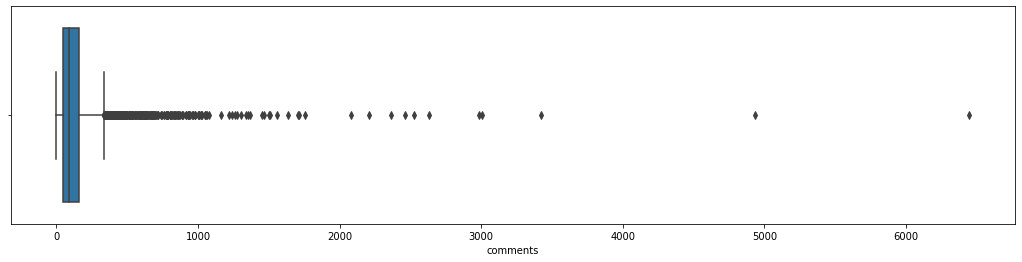

In [112]:
# Boxplot to visualize outliers before treatment
fig, ax = plt.subplots(figsize=(18, 4))
sns.boxplot(data['comments'])

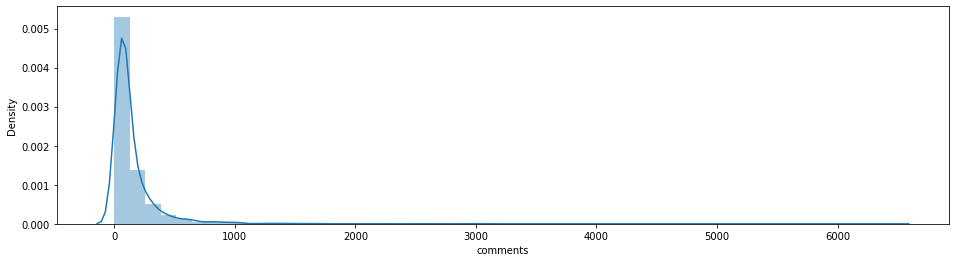

In [113]:
# density plot for comments column.
fig, ax = plt.subplots(figsize=(16, 4))
sns.distplot(data['comments'])
# highly skewed to the right (positively skewed)

In [114]:
print("skewness:",round(skew(data['comments']),2))
print("kurtosis:",round(kurtosis(data['comments']),2))
# Highly skewed : positive
# high kurtosis : heavy tail

skewness: 9.66
kurtosis: 169.05


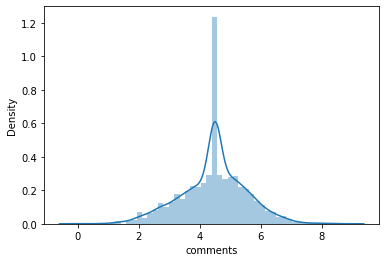

In [115]:
# density plot for log values of comments column
sns.distplot(np.log(1+data['comments']))
# density plot is still slightly skewed to the right (positively skewed)

In [116]:
print('Average of total views for talks with comments more than 1003: {:,}'.format(round((data[data['comments']>1003]['views']).mean())))
print('Average of total views for talks with comments less than 1004: {:,}'.format(round((data[data['comments']<1004]['views']).mean())))
print('Average of total views for complete dataset: {:,}'.format(round((data['views']).mean())))

Average of total views for talks with comments more than 1003: 13,018,710
Average of total views for talks with comments less than 1004: 2,035,569
Average of total views for complete dataset: 2,148,006


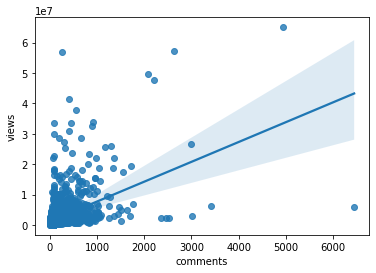

In [117]:
# relational plot for comments vs views columns.
sns.regplot(x='comments',y='views',data=data)
# Somewhat linear relationship

In [118]:
data[data['comments']==0]
# 2 Ted talks have 0 comments, but non-zero views.

talk_id                                title   speaker_1  \
3893    57920           The power of the Afro pick    Jon Gray   
3898    58706  How surfboards connect us to nature  Yves Béhar   

           all_speakers                                     about_speakers  \
3893    {0: 'Jon Gray'}  {0: 'Culinary evangelist Jon Gray is the voice...   
3898  {0: 'Yves Béhar'}  {0: 'Yves Béhar is a designer, entrepreneur an...   

       views recorded_date published_date   event native_lang  \
3893  208222    2020-02-04     2020-02-17  Others          en   
3898  181783    2020-02-11     2020-02-18  Others          en   

                   available_lang  comments  duration  \
3893         [ar, en, es, fr, tr]       0.0       213   
3898  [ar, en, es, fr, pt-br, tr]       0.0       203   

                                                 topics  \
3893  [design, history, culture, creativity, social ...   
3898  [oceans, design, creativity, water, sports, na...   

                                          related_talks  \
3893  {44259: 'The next big thing is coming from the...   
3898  {57920: 'The power of the Afro pick', 57917: '...   

                                            description  \
3893  The Afro pick is much more than a styling tool...   
3898  Here's how the surfboard changed our relations...   

                                             transcript      occupation1  
3893  You don't really look at a toothbrush and say,...  food enthusiast  
3898  Riding a wave is like suddenly gaining speed a...         designer

In [119]:
# Getting inter-quartile range
Q1 = np.percentile(data['comments'], 25, interpolation = 'midpoint')  # First quartile
Q2 = np.percentile(data['comments'], 50, interpolation = 'midpoint')  # Second
Q3 = np.percentile(data['comments'], 75, interpolation = 'midpoint')  # Third
IQR = Q3 - Q1  # Interquartile
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

Interquartile range is 116.0
low_limit is -128.0
up_limit is 336.0


In [120]:
# 5th and 95th Percentile Comment value
x5 = np.percentile(data['comments'], 5, interpolation = 'midpoint')
x95 = np.percentile(data['comments'], 95, interpolation = 'midpoint')
print("5th Percentile",x5)
print("95th Percentile",x95)

5th Percentile 12.0
95th Percentile 477.5


In [121]:
# Outlier capping for below and above 1.5-IQR comments.
data['comments'] = np.where(data['comments']>up_lim,up_lim,data['comments'])
data['comments'] = np.where(data['comments']<low_lim,low_lim,data['comments'])

In [122]:
# Statistical parameters after outlier treatment
data['comments'].describe()

count    4005.000000
mean      119.530836
std        98.183063
min         0.000000
25%        46.000000
50%        89.000000
75%       162.000000
max       336.000000
Name: comments, dtype: float64

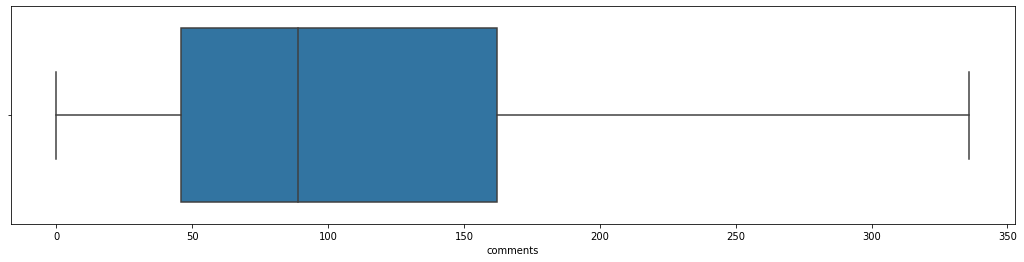

In [123]:
# Boxplot to visualize outliers after treatment
fig, ax = plt.subplots(figsize=(18, 4))
sns.boxplot(data['comments'])

**Observations**: 
1. Density plot of comments is highly skewed to the right , positively skewed. Mean (~150 comments) is greater than Median (89 comments).
2. Only 1% of Ted Talks have comments more than 1003 and less than 6449.
3. On analysing the Ted Talks with views more than 1003 comments, it turns out the average number of views for these talks is significantly higher than the average for whole dataset. It implies that as the number of comments increases, the number of views also increases (Positive correlation).
4. Basis 1.5*IQR whiskers, Talks with more than 336 comments are outliers.
5. As above, we can see around 1% talks have comments more than 1003. It is very much possible for a Ted Talk to go viral and thus have higher number of comments higher, but these are rare occurrences. It means only few talks receive higher comments, and reason could be due to based on some contentious topic etc. 
6. Since our dataset has only ~4000 observations, it seems that we dont have sufficient sample size to perfectly capture the real world trends of target population. Further these rare observations will result in erroneous predictions, i.e., our predictions will not be sufficiently generalised.
7. In order to have better results, these outlier basis below/above 1.5*IQR comments have been capped.

**b) Duration (in seconds)**

In [124]:
# duration is given in seconds, lets convert it to minutes to have better range of values.
data['duration']=data['duration'].apply(lambda x:round((x/60),2))

In [125]:
# checking statistical parameters of duration column.
data['duration'].describe(percentiles=[ 0,0.05,0.50, 0.75,0.85,0.90 ,0.95,0.99,1 ])

count    4005.000000
mean       12.066871
std         6.029596
min         1.000000
0%          1.000000
5%          3.972000
50%        12.300000
75%        16.230000
85%        17.870000
90%        18.880000
95%        20.516000
99%        26.685200
100%       65.370000
max        65.370000
Name: duration, dtype: float64

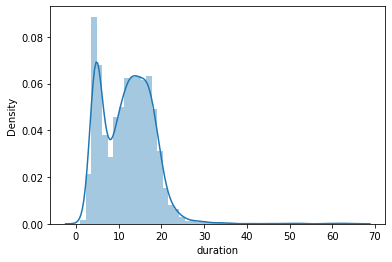

In [126]:
# density plot for duration column in minutes.
sns.distplot(data['duration'])

In [127]:
print("skewness:",round(skew(data['duration']),2))
print("kurtosis:",round(kurtosis(data['duration']),2))
# Kurtosis: measures peakedness of a distribution. high implies thin & peaky curve. low value indicates flatter curve.
# acceptable range for skewness (<2, ideal is 0) & kurtosis(<7, ideal is 3).
# normal distribution

skewness: 1.19
kurtosis: 6.84


In [128]:
data[data['duration']<= 2]
# There are total 5 Ted Talks with duration less than or equal to 2 mintutes.
# On exploring these 5 Ted talks, found that 4 are animated versions of some poems and 1 is animated visual short video.
# Further, Ted Talk on their platform had stated that in one of their series, they do animate the poems based on audience's demands.

talk_id                                     title  \
2753    14610          "Illusions for a better society"   
3502    42546                       "The Second Coming"   
3516    42819                      "Three Months After"   
3554    42461                            "New Colossus"   
3623    42783  "Ode to the Only Black Kid in the Class"   

                     speaker_1  \
2753               Aaron Duffy   
3502      William Butler Yeats   
3516  Cristin O'Keefe Aptowicz   
3554              Emma Lazarus   
3623               Clint Smith   

                                           all_speakers  \
2753  {0: 'Aaron Duffy', 1: 'Lake Buckley', 2: 'Jack...   
3502                        {0: 'William Butler Yeats'}   
3516                    {0: 'Cristin O'Keefe Aptowicz'}   
3554                                {0: 'Emma Lazarus'}   
3623                                 {0: 'Clint Smith'}   

                                         about_speakers   views recorded_date  \
2753  {0: 'Aaron Duffy began employing visual tricks...   10356    2018-04-13   
3502                                                NaN  198694    2019-05-31   
3516                                                NaN  133886    2019-06-07   
3554                                                NaN  142405    2019-07-02   
3623  {0: "Clint Smith's work blends art and activis...  163277    2019-09-09   

     published_date            event native_lang  \
2753     2018-04-14  TED_yearly_Conf          en   
3502     2019-05-31           TED-Ed          en   
3516     2019-06-07           TED-Ed          en   
3554     2019-07-08           TED-Ed          en   
3623     2019-09-09           TED-Ed          en   

                                         available_lang  comments  duration  \
2753                                               [en]      89.0      1.78   
3502  [ar, en, es, fa, fr, he, hu, it, ja, ko, ku, m...      89.0      1.82   
3516  [ar, de, el, en, es, fa, fr, he, hu, id, it, j...      89.0      1.30   
3554  [ar, de, en, es, fa, fr, he, hu, it, ja, ko, k...      89.0      1.30   
3623  [ar, el, en, es, fa, fr, he, id, it, ja, ko, k...      89.0      1.00   

                                                 topics  \
2753                             [visualizations, film]   
3502  [animation, poetry, TED-Ed, writing, history, ...   
3516  [animation, writing, TED-Ed, poetry, mental he...   
3554  [animation, TED-Ed, poetry, writing, immigration]   
3623  [TED-Ed, animation, poetry, race, inequality, ...   

                                          related_talks  \
2753  {14609: '"Chromatic"', 14611: '"It's not amazi...   
3502  {37985: '"First Kiss"', 42248: '"The Nutrition...   
3516  {42248: '"The Nutritionist"', 42546: '"The Sec...   
3554  {42464: '"To Make Use of Water"', 42819: '"Thr...   
3623  {41656: 'The Opposites Game', 42248: '"The Nut...   

                                            description  \
2753  Could visual illusions be a cure for polarizat...   
3502  This animation is part of the TED-Ed series, "...   
3516  This animation is part of the TED-Ed series, "...   
3554  This animation is part of the TED-Ed series, "...   
3623  This animation is part of the TED-Ed series, "...   

                                             transcript occupation1  
2753  Narrator: We have you here today specifically ...       other  
3502  "The Second Coming" by William Butler Yeats Tu...       other  
3516  I'm Cristin O'Keefe Aptowicz and this is "Thre...       other  
3554  "The New Colossus" by Emma Lazarus Not like th...       other  
3623  I'm Clint Smith and this is "Ode to the Only B...        poet

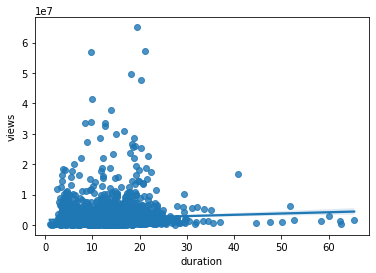

In [129]:
# Reg plot for durtion vs views columns.
sns.regplot(x='duration',y='views',data=data)

In [130]:
# checking inter-quartile range of duration
Q1 = np.percentile(data['duration'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['duration'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['duration'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', round((up_lim),2))

Interquartile range is 9.68
low_limit is -7.97
up_limit is 30.75


In [131]:
# Outlier capping for below and above 1.5*IQR durations.
data['duration'] = np.where(data['duration']<low_lim,low_lim,data['duration'])
data['duration'] = np.where(data['duration']>up_lim,up_lim,data['duration'])

In [132]:
# Statistical parameters after Outlier treatment
data['duration'].describe()

count    4005.000000
mean       11.995281
std         5.654111
min         1.000000
25%         6.550000
50%        12.300000
75%        16.230000
max        30.750000
Name: duration, dtype: float64

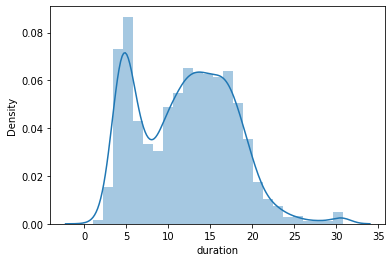

In [133]:
# density plot for duration column in minutes after Outlier treatment.
sns.distplot(data['duration'])

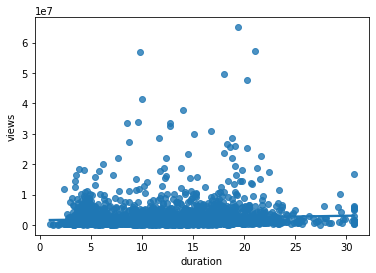

In [134]:
# Reg plot for durtion vs views columns.
sns.regplot(x='duration',y='views',data=data)

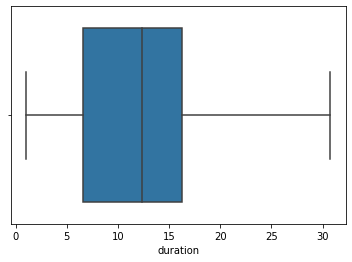

In [135]:
# Boxplot after outliers treatment
sns.boxplot(data['duration'])

**Observations**:
1. Duration was given in seconds, later converted it to minutes to have better range of values.
2. Basis 1.5*IQR whiskers, Talks of duration more than ~31 minutes are outliers.
3. As above, we can see around 1% talks are of duration more than ~27 minutes. Longer duration Ted Talks are possible, but these are quite rare and deviates from normal trend.
4. Since our dataset has only ~4000 observations, it seems that we dont have sufficient sample size to perfectly capture the real world trends of target population. Further these rare observations will result in erroneous predictions, i.e., our predictions will not be sufficiently generalised.
5. In order to have better results, outliers below/above 1.5*IQR have been capped.
6. There are total 5 Ted Talks with duration less than 2 mintutes. On exploring these 5 Ted talks, found that 4 are animated versions of some poems and 1 is animated visual short video. Further, Ted Talk on their platform had stated that in one of their series, they do animate the poems based on audience's demands. So these are natural irregularitiees and hence were not treated.7. Number of views is highest for duration between 10-20 minutes. For very short and very long talks, views is less.

**c) Views Column (Target Variable)**

In [136]:
# checking statistical parameters of views column.
data['views'].describe(percentiles=[0,0.01,0.05, 0.5,0.75,0.90,0.95,0.99,1])

count    4.005000e+03
mean     2.148006e+06
std      3.451226e+06
min      0.000000e+00
0%       0.000000e+00
1%       3.908796e+04
5%       2.961712e+05
50%      1.375508e+06
75%      2.133110e+06
90%      3.994610e+06
95%      6.182301e+06
99%      1.629983e+07
100%     6.505195e+07
max      6.505195e+07
Name: views, dtype: float64

In [137]:
# checking number of ted talks with 0 views.
print('Number of talks with 0 view:',len(data[data['views']==0]))
# Let's impute these with median values
data['views'] = np.where(data['views']==0,data[data['views']!=0]['views'].median(),data['views'])

Number of talks with 0 view: 6


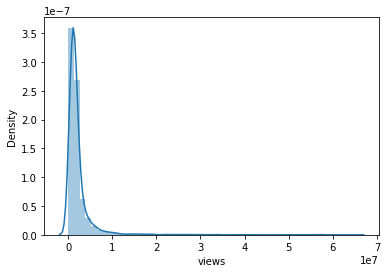

In [138]:
# density plot for views column.
sns.distplot(data['views'])
# positively skewed with a long tail

In [139]:
# checking skewness and kurtosis for views density plot.
print("skewness:",round(skew(data['views']),2))
print("kurtosis:",round(kurtosis(data['views']),2))
# High skewness: positive skewed
# high kurtosis: heavy tail(outliers present)

skewness: 8.19
kurtosis: 98.7


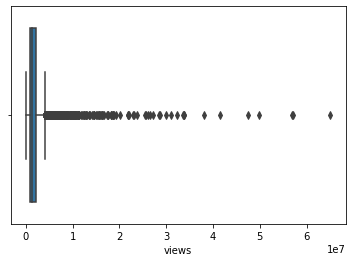

In [140]:
# Boxplot for views column before treatment
sns.boxplot(data['views'])

In [141]:
# checking inter-quartile range of views
Q1 = np.percentile(data['views'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['views'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['views'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
print('Interquartile range of views column is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', round((up_lim),2))

Interquartile range of views column is 1248186.0
low_limit is -987355.0
up_limit is 4005389.0


In [142]:
# Outlier capping at below/above 1.5*IQR views.
data['views'] = np.where(data['views']<low_lim,low_lim,data['views'])
data['views'] = np.where(data['views']>up_lim,up_lim,data['views'])

In [143]:
# Statistical parameters after outliers treatment/capping
data['views'].describe()

count    4.005000e+03
mean     1.662996e+06
std      1.099876e+06
min      1.000400e+04
25%      8.849240e+05
50%      1.376590e+06
75%      2.133110e+06
max      4.005389e+06
Name: views, dtype: float64

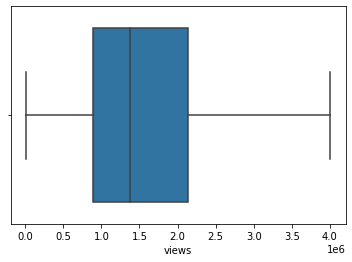

In [144]:
# Boxplot for views column after treatment
sns.boxplot(data['views'])

**Observations:**
1. Mean number of views : ~2.2M views and Median number of views : ~1.4M views. 
2. Only 1% of talks have received views more than ~16M and goes till ~65M views. High number of views suggest more popularity of a given talk and viral talks.
3. Chances of having viral TED talks is very rare, therefore outliers basis 1.5*IQR have been capped.
4. 6 Talks have received 0 views. Since this is possible in real world scenarios, these are natural and hence ignored.
5. Density plot is highly skewed with long tail and peaky with outliers present.

## B(iii). Feature Creation/Engineering

### **a) Day, Date, Month and Year of publishing**

In [145]:
# Extracting day, month and year of publishing as new features
data['pub_day'] = data['published_date'].apply(lambda x: x.strftime("%A"))
data['pub_month'] = data['published_date'].apply(lambda x: x.strftime("%B"))
data['pub_year'] = data['published_date'].apply(lambda x: x.strftime("%Y"))

In [146]:
# Extracting date & month number of publishing as new features
data['pub_date'] = data['published_date'].apply(lambda x: x.strftime("%e"))
data['pub_mon_num'] = data['published_date'].apply(lambda x: x.strftime("%-m"))

In [147]:
data.head(2)

talk_id                            title     speaker_1  \
0        1      Averting the climate crisis       Al Gore   
1       92  The best stats you've ever seen  Hans Rosling   

          all_speakers                                     about_speakers  \
0       {0: 'Al Gore'}  {0: 'Nobel Laureate Al Gore focused the world’...   
1  {0: 'Hans Rosling'}  {0: 'In Hans Rosling’s hands, data sings. Glob...   

       views recorded_date published_date            event native_lang  \
0  3523392.0    2006-02-25     2006-06-27  TED_yearly_Conf          en   
1  4005389.0    2006-02-22     2006-06-27  TED_yearly_Conf          en   

                                      available_lang  comments  duration  \
0  [ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...     272.0     16.28   
1  [ar, az, bg, bn, bs, cs, da, de, el, en, es, e...     336.0     19.83   

                                              topics  \
0  [alternative energy, cars, climate change, cul...   
1  [Africa, Asia, Google, demo, economics, global...   

                                       related_talks  \
0  {243: 'New thinking on the climate crisis', 54...   
1  {2056: 'Own your body's data', 2296: 'A visual...   

                                         description  \
0  With the same humor and humanity he exuded in ...   
1  You've never seen data presented like this. Wi...   

                                          transcript  \
0  Thank you so much, Chris. And it's truly a gre...   
1  About 10 years ago, I took on the task to teac...   

                            occupation1  pub_day pub_month pub_year pub_date  \
0                      climate advocate  Tuesday      June     2006       27   
1  global health expert; data visionary  Tuesday      June     2006       27   

  pub_mon_num  
0           6  
1           6

### **b) Lifetime of a ted talk i.e., How many days ago it was published**

In [148]:
#  Lets also extract the total time period for which a talk has been live, 
# i.e., difference between latest published date and respective published date.
latest = data['published_date'].max()
# 30th april 2020 is the last publishing date.
data['lifetime'] = latest - data['published_date']

In [149]:
#  recorded_date is of no use to us, lets drop this column
data.drop('recorded_date',axis=1,inplace=True)

In [150]:
# extract numeric part of days from lifetime column
data['lifetime']=data['lifetime'].apply(lambda x:x.days)

In [151]:
# Statistical parameters of lifetime column.
data['lifetime'].describe()

count    4005.000000
mean     1923.679650
std      1446.397273
min         0.000000
25%       554.000000
50%      1675.000000
75%      3104.000000
max      5056.000000
Name: lifetime, dtype: float64

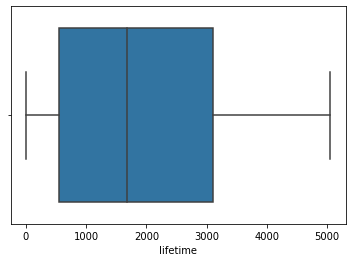

In [152]:
# Boxplot for lifetime variable
sns.boxplot(data['lifetime'])
# No outliers present

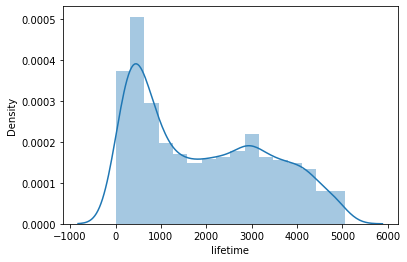

In [153]:
# Density plot of lifetime variable
sns.distplot(data['lifetime'])

### **c) Count of languages in which a talk is available**
Hypothesis:

* Availability of talks in more languages increases larger target population and therefore more views, confirmed later.

In [154]:
# create new feature for total count of available languages for a given talk
data['num_lang']=data['available_lang'].apply(lambda x:len(x))

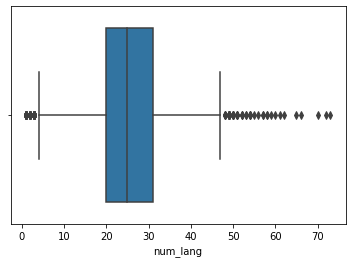

In [155]:
sns.boxplot(data['num_lang'])
# So many outliers are present

In [156]:
# Statistical parameters before outlier treatment
data['num_lang'].describe(percentiles=[0,0.025,0.05,0.5,0.75,0.95,0.975,0.99,1])

count    4005.000000
mean       25.304120
std         9.038567
min         1.000000
0%          1.000000
2.5%        5.000000
5%         11.000000
50%        25.000000
75%        31.000000
95%        40.000000
97.5%      44.000000
99%        49.000000
100%       73.000000
max        73.000000
Name: num_lang, dtype: float64

In [157]:
# Getting quartile and Inter-quartile range for num_lang variable
q3 =data['num_lang'].quantile(0.75)
q1 = data['num_lang'].quantile(0.25)
IQR_lang= (q3)-(q1)
up_lim = q3 + 1.5*IQR_lang
low_lim = q1 - 1.5*IQR_lang
up_lim, low_lim

(47.5, 3.5)

In [158]:
# Outlier capping at below/above 1.5*IQR num_lang values.
lang5 = np.percentile(data['num_lang'], 5, interpolation = 'midpoint')
lang95 = np.percentile(data['num_lang'], 95, interpolation = 'midpoint')
data['num_lang'] = np.where(data['num_lang']<low_lim,low_lim,data['num_lang'])
data['num_lang'] = np.where(data['num_lang']>up_lim,up_lim,data['num_lang'])

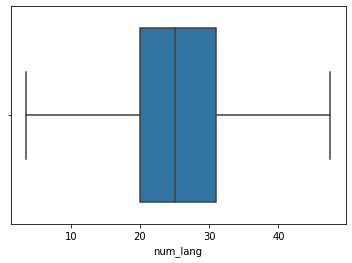

In [159]:
# Boxplot after outliers treatment.
sns.boxplot(data['num_lang'])

In [160]:
# Statistical parameters after Outliers treatment
data['num_lang'].describe(percentiles=[0,0.1,0.5,0.75,0.85,0.9,0.95,1])

count    4005.000000
mean       25.250312
std         8.718218
min         3.500000
0%          3.500000
10%        15.000000
50%        25.000000
75%        31.000000
85%        34.000000
90%        36.000000
95%        40.000000
100%       47.500000
max        47.500000
Name: num_lang, dtype: float64

### **d) Count of related talks for a given TED Talk**

Hypothesis: 
* High number of related talks increases high visibility (recommender system working) of that talk and as a result, more chances of it getting viewed.

In [161]:
# checking data type of related_talks column
type(data.loc[4000,'related_talks'])

dict

In [162]:
# checking 1st value of related_talks column
data.loc[4000,'related_talks']

{2362: 'How data from a crisis text line is saving lives',
 2681: 'My son was a Columbine shooter. This is my story',
 9463: 'The gift and power of emotional courage',
 11871: 'The best way to help is often just to listen',
 29775: "In the opioid crisis, here's what it takes to save a life",
 56860: 'How teachers can help students navigate trauma'}

In [163]:
# Creating a new feature/column
data['#related_talks'] = data['related_talks'].apply(lambda x:len(x))

In [164]:
data.head(2)

talk_id                            title     speaker_1  \
0        1      Averting the climate crisis       Al Gore   
1       92  The best stats you've ever seen  Hans Rosling   

          all_speakers                                     about_speakers  \
0       {0: 'Al Gore'}  {0: 'Nobel Laureate Al Gore focused the world’...   
1  {0: 'Hans Rosling'}  {0: 'In Hans Rosling’s hands, data sings. Glob...   

       views published_date            event native_lang  \
0  3523392.0     2006-06-27  TED_yearly_Conf          en   
1  4005389.0     2006-06-27  TED_yearly_Conf          en   

                                      available_lang  comments  duration  \
0  [ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...     272.0     16.28   
1  [ar, az, bg, bn, bs, cs, da, de, el, en, es, e...     336.0     19.83   

                                              topics  \
0  [alternative energy, cars, climate change, cul...   
1  [Africa, Asia, Google, demo, economics, global...   

                                       related_talks  \
0  {243: 'New thinking on the climate crisis', 54...   
1  {2056: 'Own your body's data', 2296: 'A visual...   

                                         description  \
0  With the same humor and humanity he exuded in ...   
1  You've never seen data presented like this. Wi...   

                                          transcript  \
0  Thank you so much, Chris. And it's truly a gre...   
1  About 10 years ago, I took on the task to teac...   

                            occupation1  pub_day pub_month pub_year pub_date  \
0                      climate advocate  Tuesday      June     2006       27   
1  global health expert; data visionary  Tuesday      June     2006       27   

  pub_mon_num  lifetime  num_lang  #related_talks  
0           6      5056      43.0               6  
1           6      5056      47.5               6

In [165]:
# Getting unique values for this column
data['#related_talks'].unique()

array([6, 5, 1, 3, 4, 2])

### **e) Count of speakers**

In [166]:
#  Adding a column containing count of speakers in a given Ted Talk
data.loc[~data['all_speakers'].isnull(),'num_speakers']=data.loc[~data['all_speakers'].isnull(),'all_speakers'].apply(lambda x: len(x))
data.loc[data['all_speakers'].isnull(),'num_speakers'] = 1
data.head(2)

talk_id                            title     speaker_1  \
0        1      Averting the climate crisis       Al Gore   
1       92  The best stats you've ever seen  Hans Rosling   

          all_speakers                                     about_speakers  \
0       {0: 'Al Gore'}  {0: 'Nobel Laureate Al Gore focused the world’...   
1  {0: 'Hans Rosling'}  {0: 'In Hans Rosling’s hands, data sings. Glob...   

       views published_date            event native_lang  \
0  3523392.0     2006-06-27  TED_yearly_Conf          en   
1  4005389.0     2006-06-27  TED_yearly_Conf          en   

                                      available_lang  comments  duration  \
0  [ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...     272.0     16.28   
1  [ar, az, bg, bn, bs, cs, da, de, el, en, es, e...     336.0     19.83   

                                              topics  \
0  [alternative energy, cars, climate change, cul...   
1  [Africa, Asia, Google, demo, economics, global...   

                                       related_talks  \
0  {243: 'New thinking on the climate crisis', 54...   
1  {2056: 'Own your body's data', 2296: 'A visual...   

                                         description  \
0  With the same humor and humanity he exuded in ...   
1  You've never seen data presented like this. Wi...   

                                          transcript  \
0  Thank you so much, Chris. And it's truly a gre...   
1  About 10 years ago, I took on the task to teac...   

                            occupation1  pub_day pub_month pub_year pub_date  \
0                      climate advocate  Tuesday      June     2006       27   
1  global health expert; data visionary  Tuesday      June     2006       27   

  pub_mon_num  lifetime  num_lang  #related_talks  num_speakers  
0           6      5056      43.0               6           1.0  
1           6      5056      47.5               6           1.0

In [167]:
# Now i dont see any further use of all_speakers column, therefore dropping it.
data.drop('all_speakers',axis=1,inplace=True)

## B(iv). Univariate Analysis

In [168]:
data.columns

Index(['talk_id', 'title', 'speaker_1', 'about_speakers', 'views',
       'published_date', 'event', 'native_lang', 'available_lang', 'comments',
       'duration', 'topics', 'related_talks', 'description', 'transcript',
       'occupation1', 'pub_day', 'pub_month', 'pub_year', 'pub_date',
       'pub_mon_num', 'lifetime', 'num_lang', '#related_talks',
       'num_speakers'],
      dtype='object')

In [169]:
data.head(1)

talk_id                        title speaker_1  \
0        1  Averting the climate crisis   Al Gore   

                                      about_speakers      views  \
0  {0: 'Nobel Laureate Al Gore focused the world’...  3523392.0   

  published_date            event native_lang  \
0     2006-06-27  TED_yearly_Conf          en   

                                      available_lang  comments  duration  \
0  [ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...     272.0     16.28   

                                              topics  \
0  [alternative energy, cars, climate change, cul...   

                                       related_talks  \
0  {243: 'New thinking on the climate crisis', 54...   

                                         description  \
0  With the same humor and humanity he exuded in ...   

                                          transcript       occupation1  \
0  Thank you so much, Chris. And it's truly a gre...  climate advocate   

   pub_day pub_month pub_year pub_date pub_mon_num  lifetime  num_lang  \
0  Tuesday      June     2006       27           6      5056      43.0   

   #related_talks  num_speakers  
0               6           1.0

### 1. Number of Speakers

In [170]:
data['num_speakers'].value_counts(normalize=True).reset_index().rename(columns={'index':'num_speakers','num_speakers':'#Talks'})
# Only 1 ted talk with 5 speakers and 3 talks with 4 speakers; will explore these talks later
# Majority of Talks (~97%) are given by 1 speaker only.

num_speakers    #Talks
0           1.0  0.971536
1           2.0  0.024220
2           3.0  0.003246
3           4.0  0.000749
4           5.0  0.000250

In [171]:
data[data['num_speakers']==5]
# Only 1 Ted talk with 5 speakers, which is basically a dance performance.

talk_id                          title  speaker_1  \
2453     2851  A dance to honor Mother Earth  Jon Boogz   

                                         about_speakers     views  \
2453  {0: 'Jon Boogz is a movement artist, choreogra...  309366.0   

     published_date            event native_lang  \
2453     2017-08-11  TED_yearly_Conf          en   

                                         available_lang  comments  duration  \
2453  [ar, en, es, fa, fr, hy, it, ja, ko, lv, mn, m...      10.0      9.58   

                                                 topics  \
2453  [dance, art, creativity, performance, performa...   

                                          related_talks  \
2453  {2589: 'A visual history of social dance in 25...   

                                            description  \
2453  Movement artists Jon Boogz and Lil Buck debut ...   

                                             transcript      occupation1  \
2453  Mother Earth: Our end was imminent yet finalit...  movement artist   

     pub_day pub_month pub_year pub_date pub_mon_num  lifetime  num_lang  \
2453  Friday    August     2017       11           8       993      20.0   

      #related_talks  num_speakers  
2453               6           5.0

In [172]:
speakers_df=data.groupby('num_speakers').views.mean().reset_index()
# Taking average of views basis #speakers, found that Talks with 3 speaker has received highest average views; followed by 1 speaker.
speakers_df

num_speakers         views
0           1.0  1.670024e+06
1           2.0  1.441538e+06
2           3.0  1.488388e+06
3           4.0  9.164387e+05
4           5.0  3.093660e+05

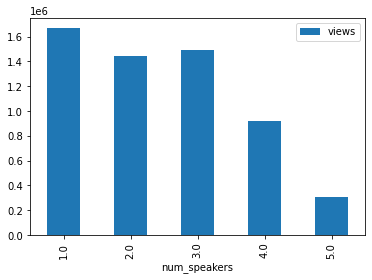

In [173]:
speakers_df.plot(x='num_speakers',y='views',kind='bar')
# Average views for TED Talks with lesser speakers (till 3 speakers) is higher than talks with 4-5 speakers.

**Observations**:
1. Only 1 TED talk with 5 speakers,which is basically a dance performance. 
2. Only 3 TED talks with 4 speakers.
3. Majority of Talks (~97%) are given by 1 speaker only.
4. Average views for TED Talks with lesser speakers (till 3 speakers) is higher than talks with 4-5 speakers.

### 2. Duration column

In [174]:
# Statistical parameters of duration column
data['duration'].describe(percentiles=[ 0,0.50, 0.75,0.90 ,0.95,0.99,1 ])

count    4005.000000
mean       11.995281
std         5.654111
min         1.000000
0%          1.000000
50%        12.300000
75%        16.230000
90%        18.880000
95%        20.516000
99%        26.685200
100%       30.750000
max        30.750000
Name: duration, dtype: float64

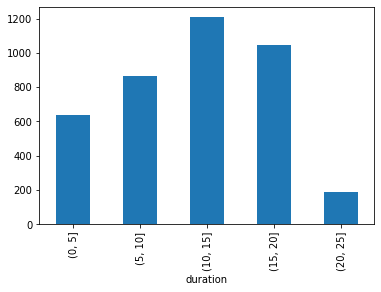

In [175]:
bins=[0,5,10,15,20,25]
data.groupby(pd.cut(data['duration'],bins)).size().plot(kind='bar')
# Maximum number of TED Talks are of duration 10-15minutes; no monotonous increasing or decreasing trend.

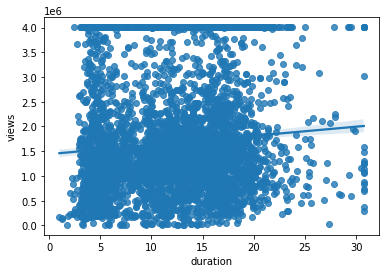

In [176]:
# Relationship plot
sns.regplot(x='duration',y='views',data=data)

**Observations**:
1. Maximum number of TED Talks are of duration 10-15minutes; no monotonically increasing or decreasing trend.
2. TED talks of very short duration and long duration are not very much popular.

### 3. Comments column (Chicken-Egg paradox)


* A talk with more views is more likely to have more comments. The more comments will further drive the popularity of videos and as a result, views will further shoot up. 
* So, its like views and comments have positive feedback loop (Reinforcing) type relationship. And both variable seems to have some future information regarding other one.
* Taking above unusual relationship into account, its better to not consider comments while predicting views to avoid any possibility of Data Leakage.





In [177]:
# Statistical parameters of comments
data['comments'].describe(percentiles=[ 0,0.50, 0.75,0.90 ,0.95,0.99,1 ])

count    4005.000000
mean      119.530836
std        98.183063
min         0.000000
0%          0.000000
50%        89.000000
75%       162.000000
90%       317.000000
95%       336.000000
99%       336.000000
100%      336.000000
max       336.000000
Name: comments, dtype: float64

In [178]:
len(data[data['comments']==0])
# Total 2 ted talks have 0 comments.

2

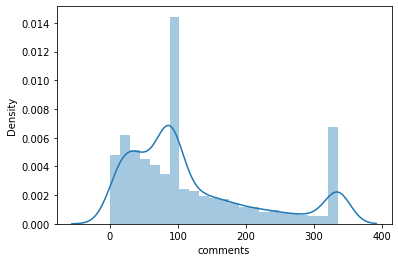

In [179]:
# density plot
sns.distplot(data['comments'])

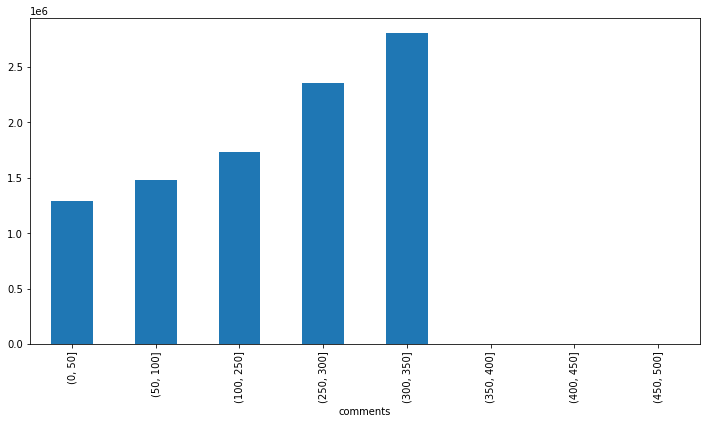

In [180]:
bins=[0,50,100,250,300,350,400,450,500]
data.groupby(pd.cut(data['comments'],bins)).views.mean().plot(kind='bar',figsize=(12,6))
# As #comments on a Ted Talk increases, average of #views increases accordingly.
# Positive correlation with #views (T.V.)

**Observations**:
1. As #comments on a Ted Talk increases, average of #views increases accordingly.
2. Positive correlation with #views (T.V.)

### 4. Number of available languages Vs. Views

In [181]:
data['num_lang'].describe(percentiles=[0,0.5,0.75,0.8,0.95,0.99,1])
# Maximum languages in which a given Ted Talk is available is 73

count    4005.000000
mean       25.250312
std         8.718218
min         3.500000
0%          3.500000
50%        25.000000
75%        31.000000
80%        32.000000
95%        40.000000
99%        47.500000
100%       47.500000
max        47.500000
Name: num_lang, dtype: float64

In [182]:
data[data['num_lang']==73]
# This Talk was given by Matt Cutts, is in english.

Empty DataFrame
Columns: [talk_id, title, speaker_1, about_speakers, views, published_date, event, native_lang, available_lang, comments, duration, topics, related_talks, description, transcript, occupation1, pub_day, pub_month, pub_year, pub_date, pub_mon_num, lifetime, num_lang, #related_talks, num_speakers]
Index: []

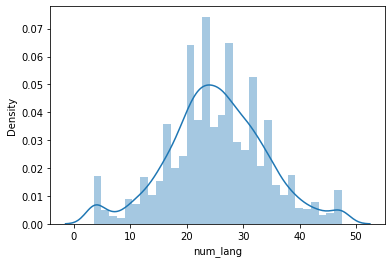

In [183]:
sns.distplot(data['num_lang'])
# Normally distributed with long tail on right.

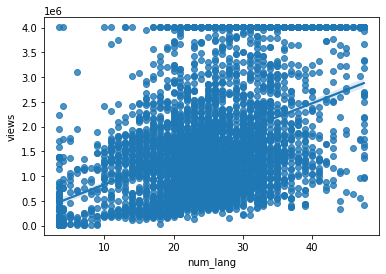

In [184]:
sns.regplot(x='num_lang',y='views',data=data)
# positive correlation

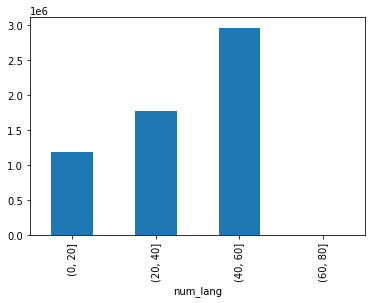

In [185]:
bins=[0,20,40,60,80]
data.groupby(pd.cut(data['num_lang'],bins)).views.mean().plot(kind='bar')
# As #languages in which a Ted Talk is availability increases, average of #views increases accordingly.
# Positive correlation with #views (T.V.)

**Observations**:
1. As #languages in which a Ted Talk is available increases, average of #views increases accordingly.
2. Positive correlation with #views (T.V.)

### 5. Date of Publishing

In [186]:
data.loc[0,'pub_year']

'2006'

In [187]:
# applying eval() function on all string values of pub_year, pub_mon_num & pub_date column
data.loc[~data['pub_year'].isnull(),'pub_year'] = data.loc[~data['pub_year'].isnull(),'pub_year'].apply(lambda row: eval(row))
data.loc[~data['pub_date'].isnull(),'pub_date'] = data.loc[~data['pub_date'].isnull(),'pub_date'].apply(lambda row: eval(row))
data.loc[~data['pub_mon_num'].isnull(),'pub_mon_num'] = data.loc[~data['pub_mon_num'].isnull(),'pub_mon_num'].apply(lambda row: eval(row))

**i) Week-day Vs Weekend analysis**

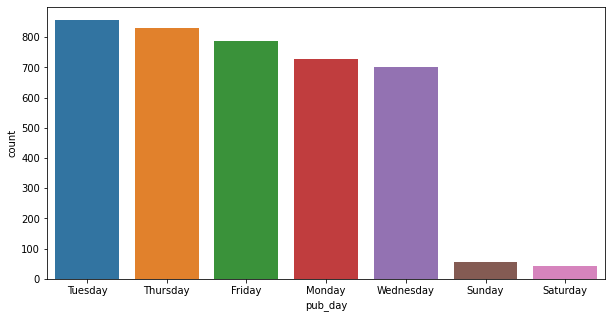

In [188]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='pub_day',data=data,order=data['pub_day'].value_counts().index)
# Majority of Ted Talks were published on Tuesday, followed by Thursday and Friday of a given week.
# Least number of Ted Talks were published on weekends.

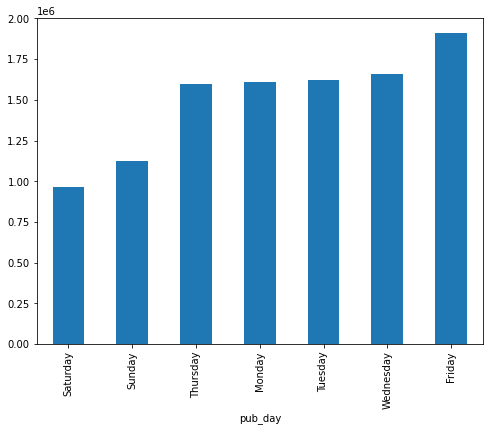

In [189]:
data.groupby('pub_day')['views'].mean().sort_values().plot(kind='bar',figsize=(8,6))
# Ted talks published on Friday has the highest average number of views; shortly followed by Wednesday.
# While Ted talks published on weekends have the smallest average number of views.

**Observations**:
1. Majority of Ted Talks were published on Tuesday, followed by Thursday and Friday of a given week.
2. Least number of Ted Talks were published on weekends.
3. Ted talks published on Friday has the highest average number of views; shortly followed by Wednesday. While Ted talks published on weekends have the least average number of views.

**ii) Monthly analysis**

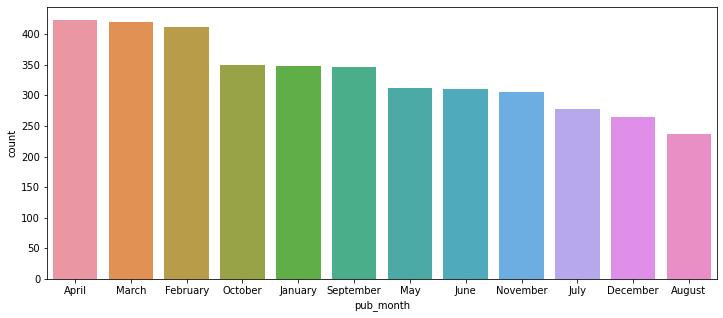

In [190]:
fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(x='pub_month',data=data,order=data['pub_month'].value_counts().index)
# Majority of Ted Talks were published during April, March & February months of a given year.

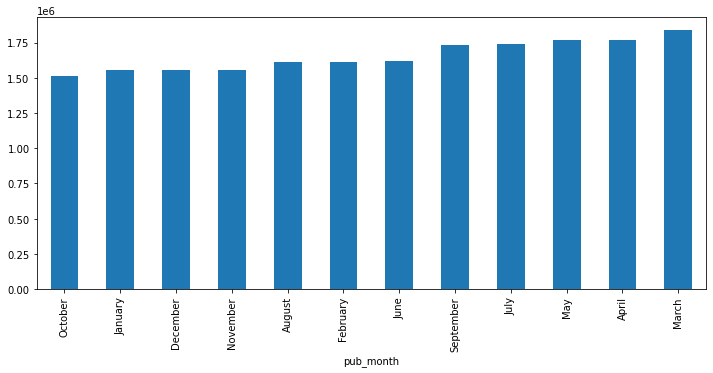

In [191]:
data.groupby('pub_month')['views'].mean().sort_values().plot(kind='bar',figsize=(12,5))
# Ted talks published during March and May have highest average number of views.
# Month-basis trend in views is not very significant.

**Observations**:
1. Majority of Ted Talks were published during April, March & February months of a given year.
2. Ted talks published during March and May have highest average number of views, while October has least average views. Month-basis trend in views is not very significant.

**iii) Yearly analysis**

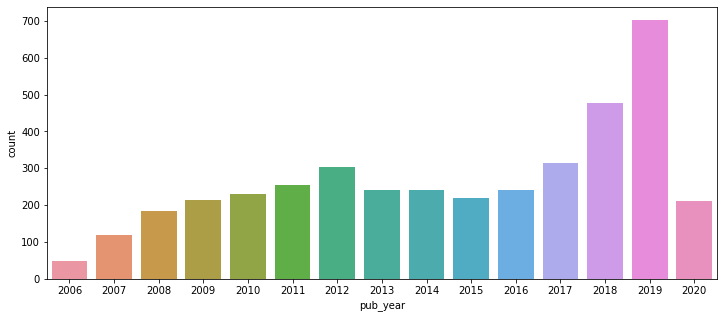

In [192]:
fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(x='pub_year',data=data)
# Majority of Ted Talks were published during year 2019, followed by 2018.
# In year 2006, least number of ted talks were published.

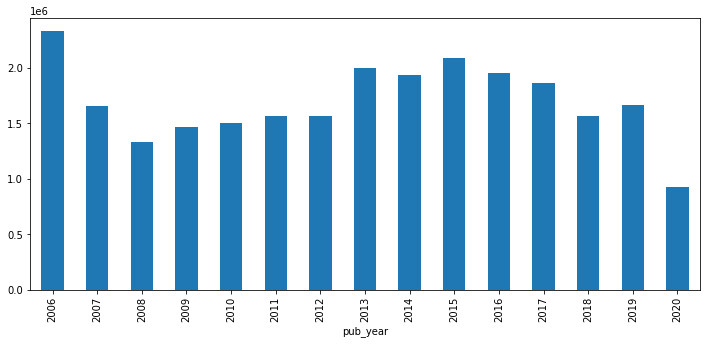

In [193]:
data.groupby('pub_year')['views'].mean().plot(kind='bar',figsize=(12,5))
# Ted talks published during year 2006 have highest average number of views.

**Observations**:
1. Majority of Ted Talks were published during year 2019, followed by 2018.
2. In year 2006, least number of ted talks were published.
3. Ted talks published during year 2006 have highest average number of views.

**iv) Lifetime (Total time for which a Ted talk is online)**

In [194]:
# Statistical parameters for lifetime column (X days ago publishing date)
data['lifetime'].describe(percentiles=[0,0.5,0.75,0.9,0.99,1])

count    4005.000000
mean     1923.679650
std      1446.397273
min         0.000000
0%          0.000000
50%      1675.000000
75%      3104.000000
90%      4059.600000
99%      4929.680000
100%     5056.000000
max      5056.000000
Name: lifetime, dtype: float64

In [195]:
# Getting count of talks basis different bins of lifetime
bins=[0,1000,2000,3000,4000,5000,6000]
data.groupby(pd.cut(data['lifetime'],bins)).size()

lifetime
(0, 1000]       1556
(1000, 2000]     639
(2000, 3000]     716
(3000, 4000]     651
(4000, 5000]     421
(5000, 6000]      20
dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

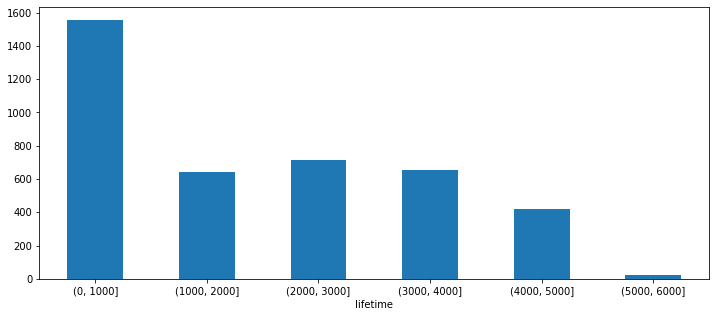

In [196]:
bins=[0,1000,2000,3000,4000,5000,6000]
data.groupby(pd.cut(data['lifetime'],bins)).size().plot(kind='bar',figsize=(12,5))
plt.xticks(rotation =0)
# Large Number of TED Talks (1556 talks) were published recently i.e., between 0 to 1000 days ago. 
# Very few TED Talks (441 talks) were published a long time ago i.e. between 4000 to 6000 days ago.

In [197]:
# Getting bin-wise average views for different lifetime bins
bins=[0,1000,2000,3000,4000,5000,6000]
data.groupby(pd.cut(data['lifetime'],bins)).views.mean()

lifetime
(0, 1000]       1.549926e+06
(1000, 2000]    1.976349e+06
(2000, 3000]    1.826657e+06
(3000, 4000]    1.516239e+06
(4000, 5000]    1.525246e+06
(5000, 6000]    2.360397e+06
Name: views, dtype: float64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

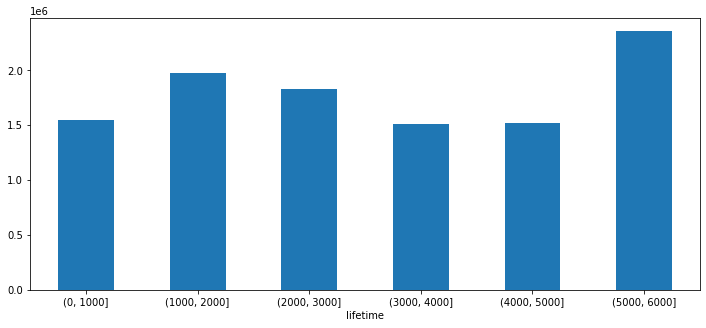

In [198]:
bins=[0,1000,2000,3000,4000,5000,6000]
data.groupby(pd.cut(data['lifetime'],bins)).views.mean().plot(kind='bar',figsize=(12,5))
plt.xticks(rotation =0)
# Average views is highest for older TED Talks i.e., which were published between 5000 to 6000 days ago.

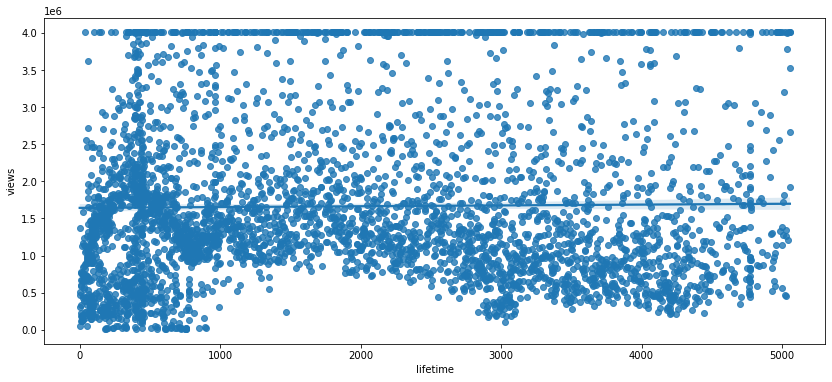

In [199]:
# Relationship plot with views column.
plt.figure(figsize=(14,6))
sns.regplot(x='lifetime',y='views',data=data)

**Observations**:
1. Large Number of TED Talks (1556 talks) were published recently i.e., between 0 to 1000 days ago. 
2. Very few TED Talks (441 talks) were published a long time ago i.e. between 4000 to 6000 days ago.
3. Average views is highest for much older TED Talks i.e., which were published between 5000 to 6000 days ago.
4. No montonic increasing/decreasing trend with respect to views.

**iv) Date of Publishing**

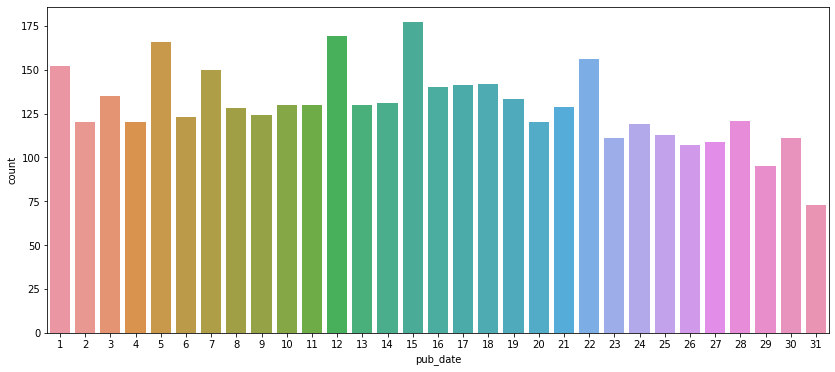

In [200]:
# Date-wise Trend of Count of TED Talks
fig, ax = plt.subplots(figsize=(14,6))
sns.countplot(x='pub_date',data=data)
# No significant connection between publishing date and #talks.

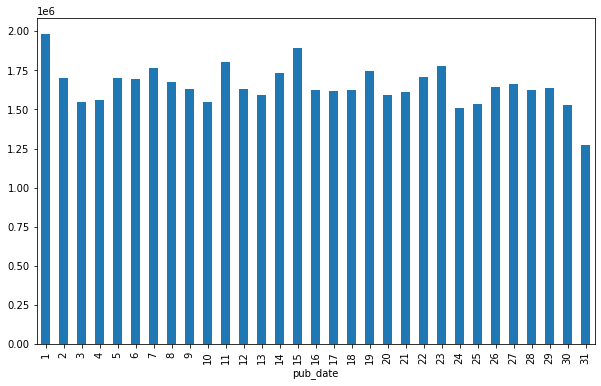

In [201]:
data.groupby('pub_date')['views'].mean().plot(kind='bar',figsize=(10,6))
# Based on publishing date, there is no significant trend for views.

**Observations**:
1. No significant trend/connection between date of publishing and #talks.

### 6. Number of Topics

In [202]:
# checking statistical parameters for topics column
data['topics'].describe()

count               4005
unique              3977
top       [TED-Ed, math]
freq                   8
Name: topics, dtype: object

In [203]:
# checking for any null values
data['topics'].isnull().sum()

0

In [204]:
# Creating a new feature for count of topics against each Ted talk.
data['num_topics']=data['topics'].apply(lambda x:len(x))

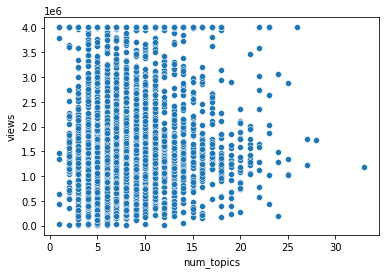

In [205]:
# Scatter plot for number of topics versus number of views
sns.scatterplot(x='num_topics',y='views',data=data)

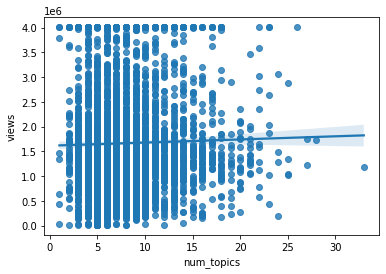

In [206]:
# Regplot for number of topics versus number of views
sns.regplot(x='num_topics',y='views',data=data)
# No significant Trends

**Observation**:
1. No significant correlation between number of topics and Views.

## B(v) Visualization of Numerical Features Vs Views

In [207]:
# Numerical Features
num_features =data.describe().columns
num_features

Index(['talk_id', 'views', 'comments', 'duration', 'pub_year', 'pub_date',
       'pub_mon_num', 'lifetime', 'num_lang', '#related_talks', 'num_speakers',
       'num_topics'],
      dtype='object')

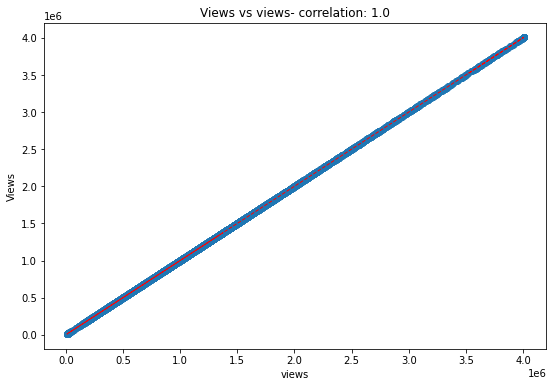

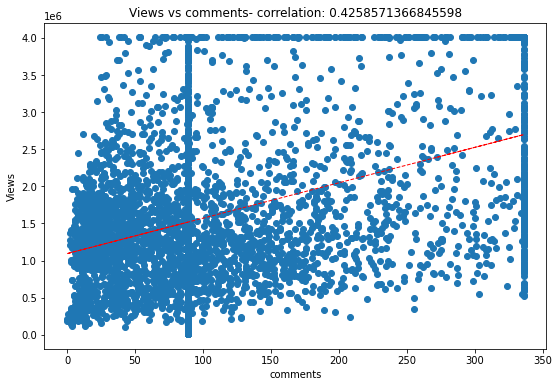

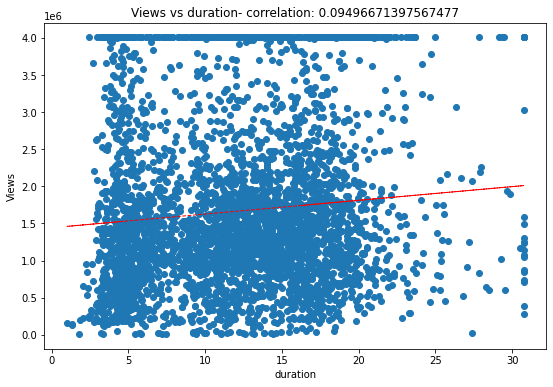

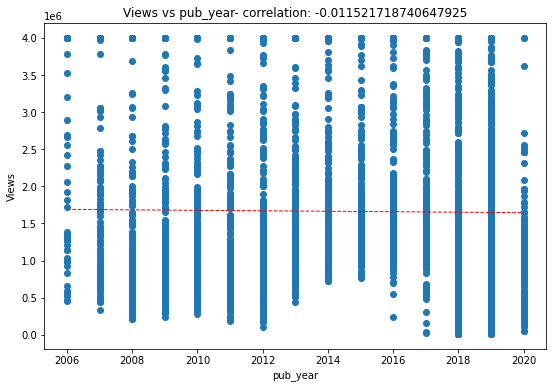

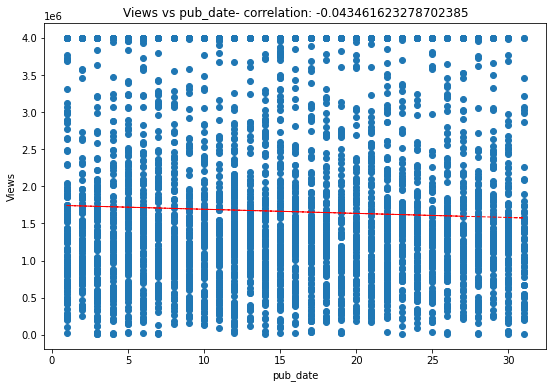

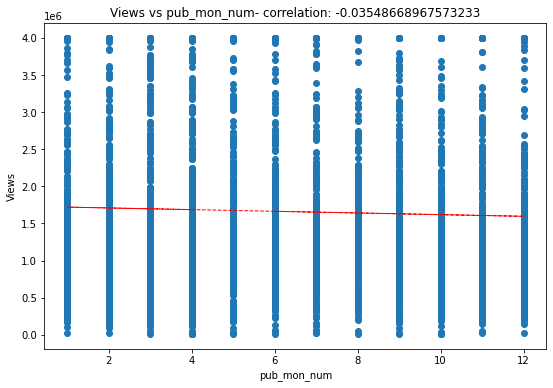

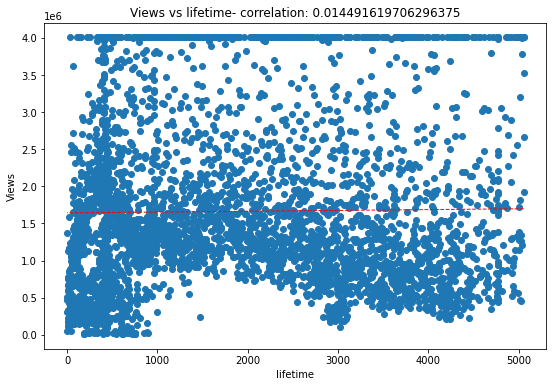

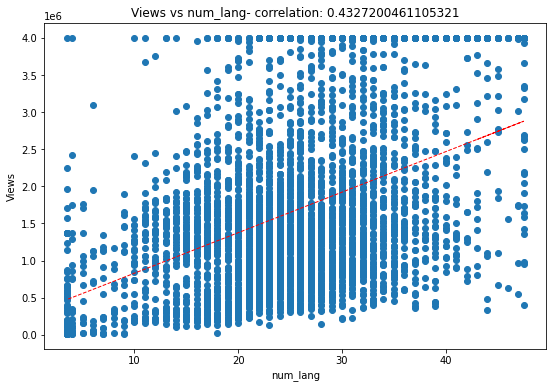

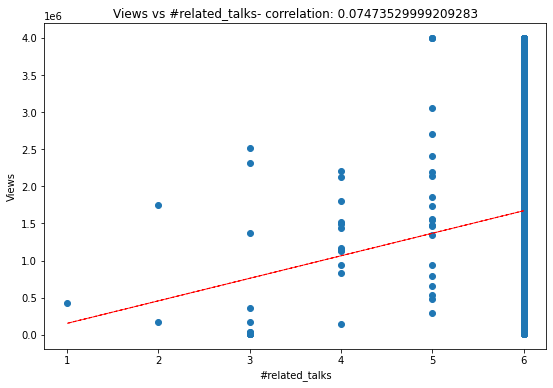

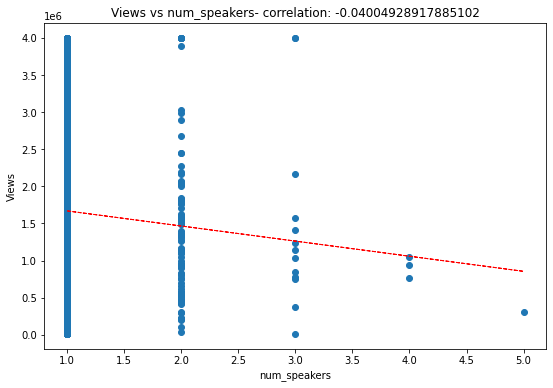

In [208]:
# Scatter plot along with polyfit line between views and all cnumerical columns
for col in num_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    label = data['views']
    # getting pearson correlation coefficeint
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Views')
    ax.set_title('Views vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(data[col], data['views'], 1)
    y_hat = np.poly1d(z)(data[col])

    plt.plot(data[col], y_hat, "r--", lw=1)

plt.show()

## B(vi). Ted Cloud of words

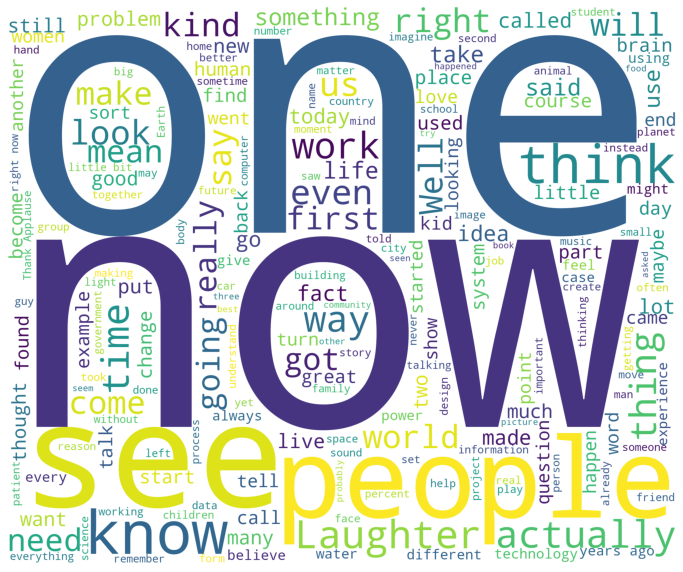

In [210]:
# Lets display the most frequent words for the text corpus of Transcript
from wordcloud import WordCloud, STOPWORDS
corpus1 = ' '.join(data['transcript'])
corpus1 = corpus1.replace('.', '. ')

wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',width=2400,height=2000).generate(corpus1)
plt.figure(figsize=(12,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

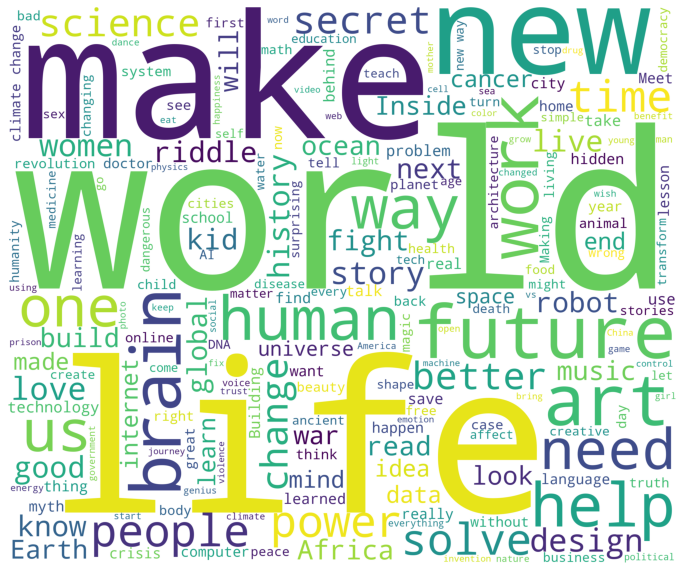

In [211]:
# Lets display the most frequent words for the text corpus of Title
corpus2 = ' '.join(data['title'])
corpus2 = corpus2.replace('.', '. ')

wordcloud2 = WordCloud(stopwords=STOPWORDS, background_color='white',width=2400,height=2000).generate(corpus2)
plt.figure(figsize=(12,15))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

## B(v). Bivariate Analysis

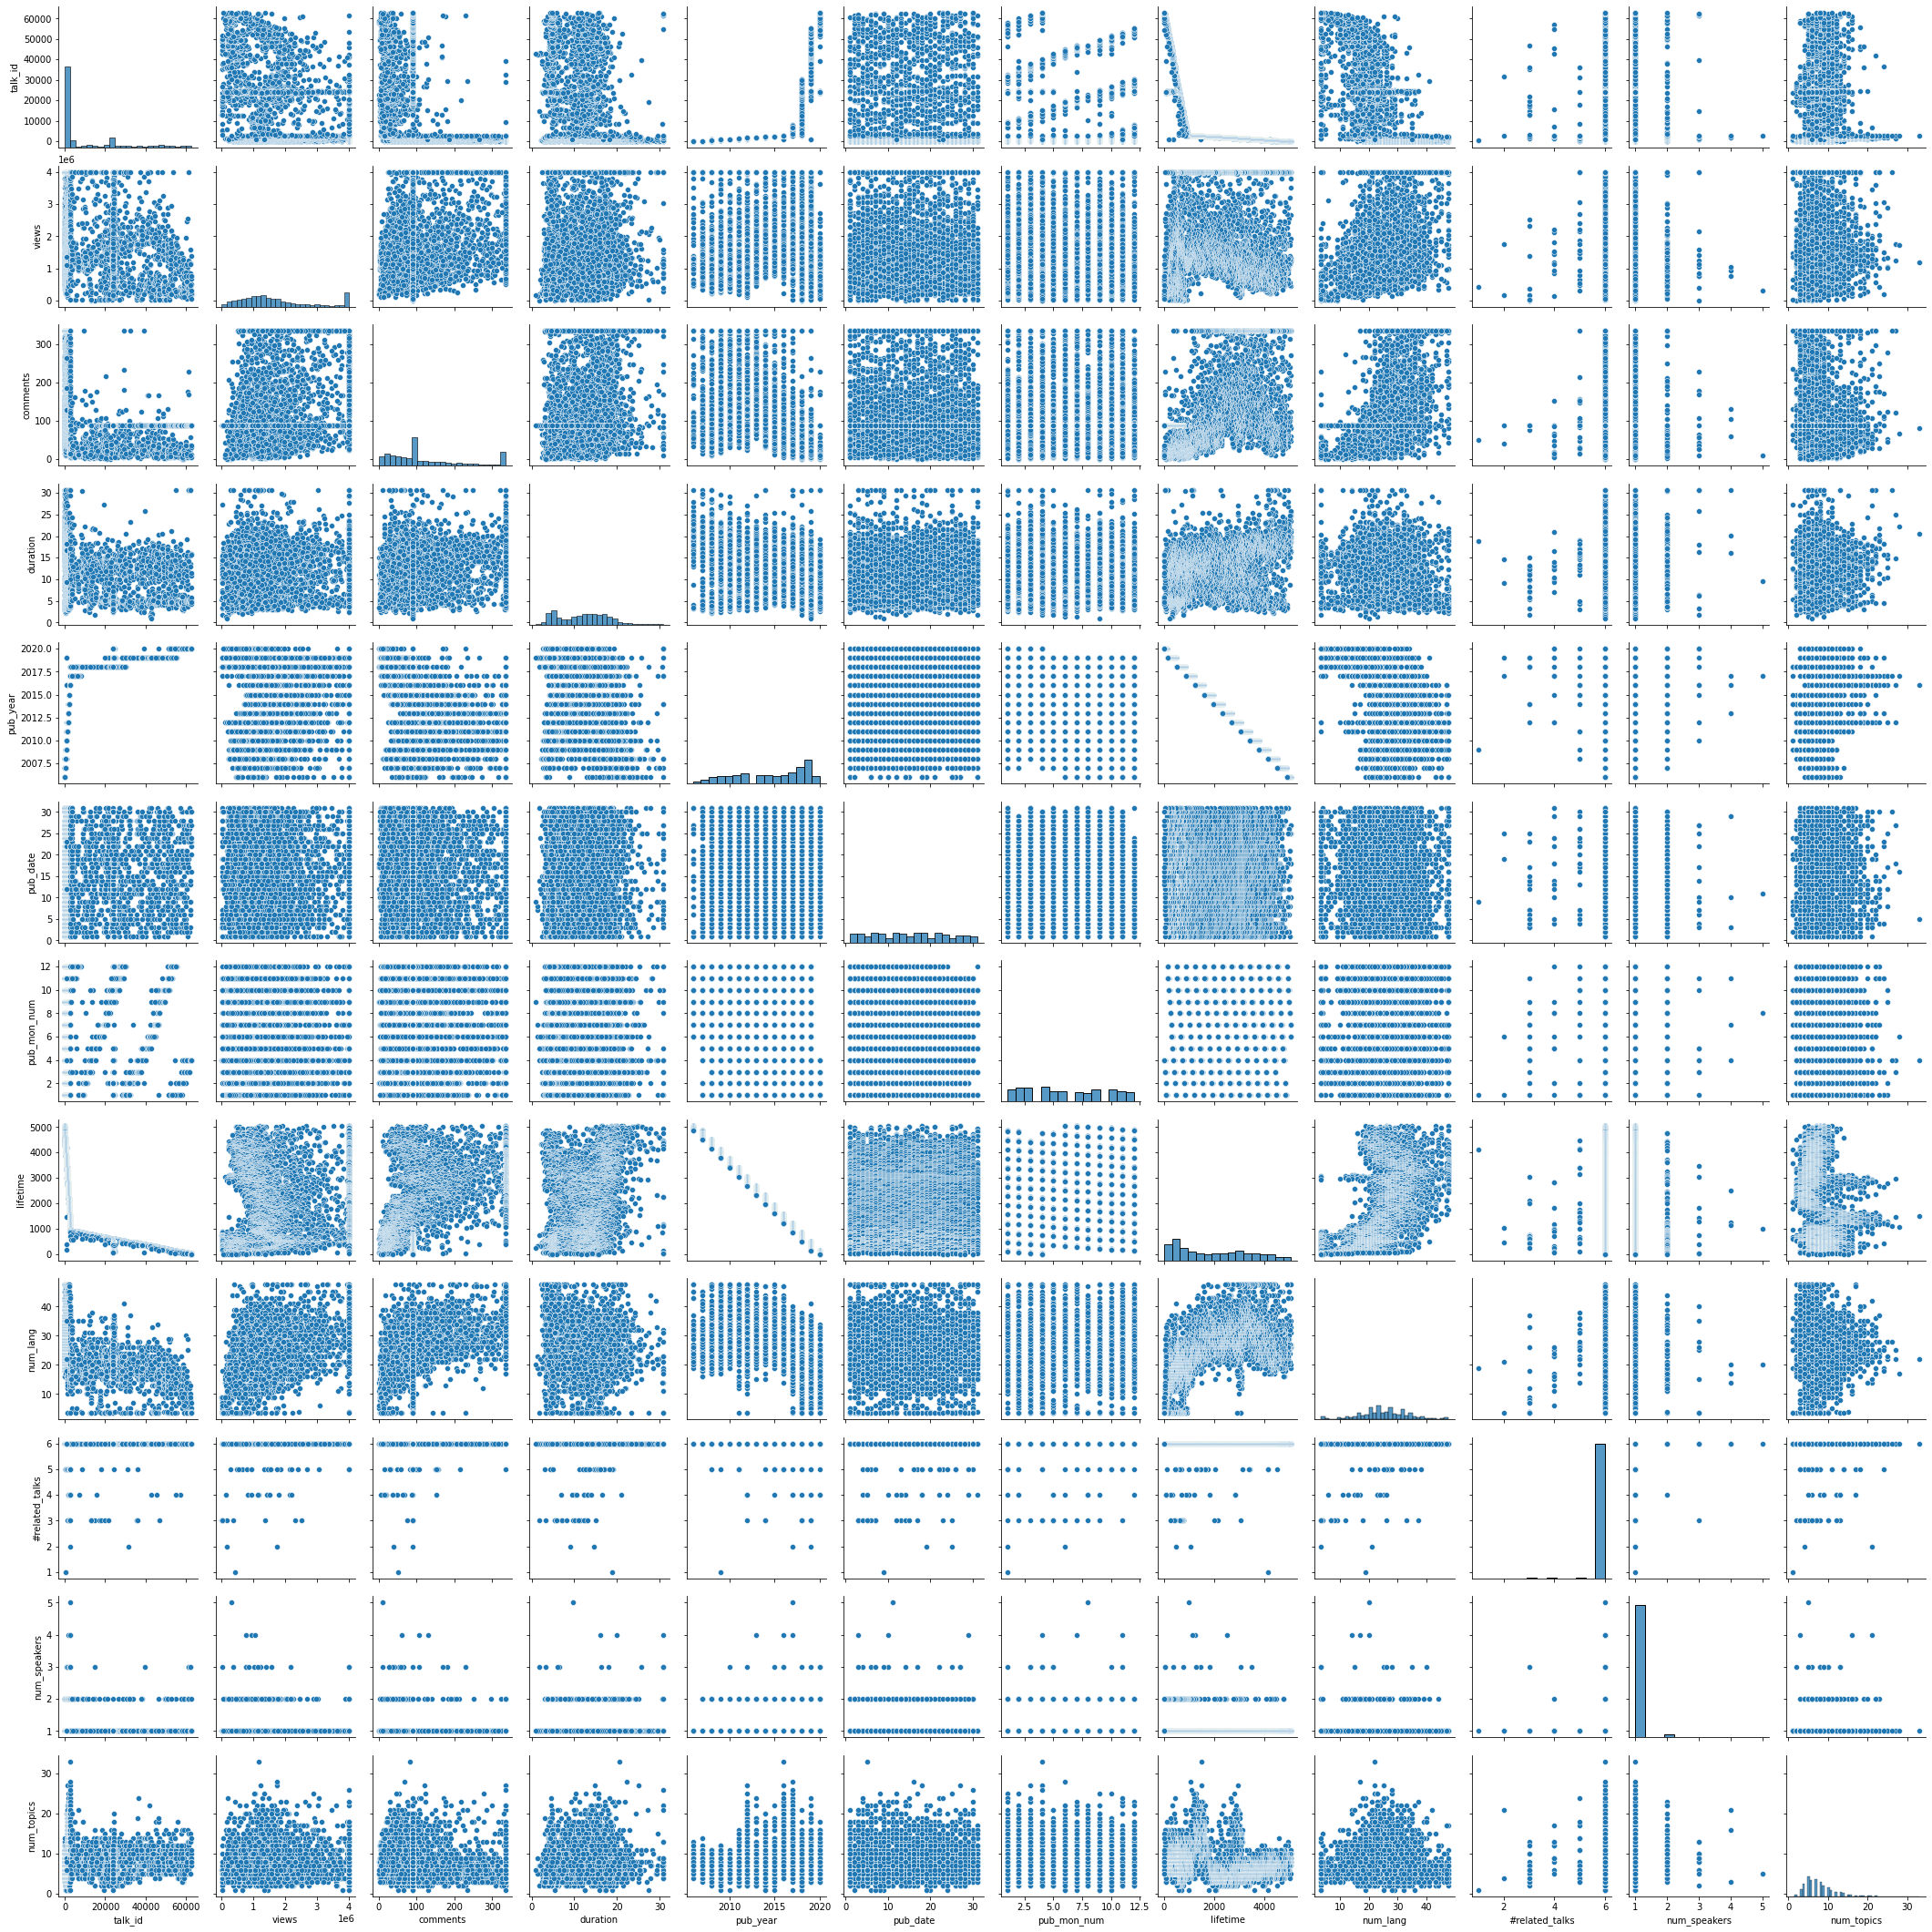

In [212]:
# Pairplots of all numerical variables
sns.pairplot(data)

Views seems to have positive correlation with num_lang and comments. Lets check using Correlation matrix.

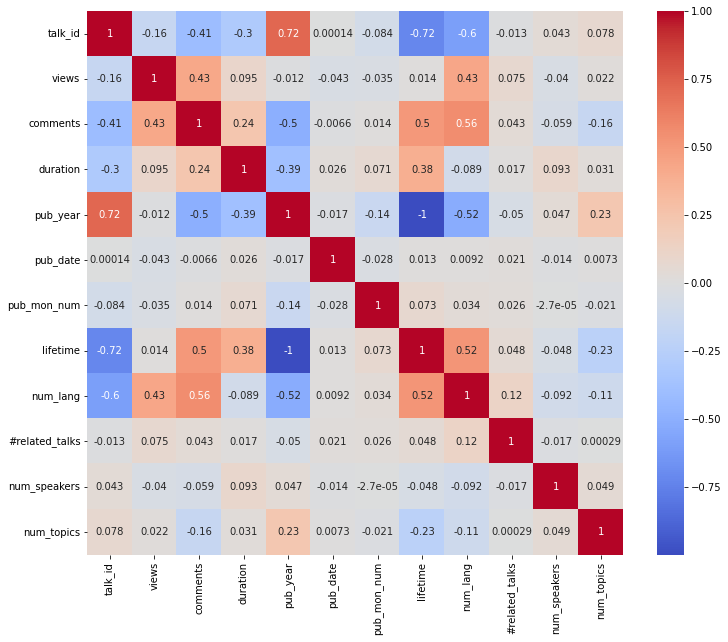

In [213]:
# Correlation matrix for all numerical variables
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

Correlation interpretation for values between:
  1. 0 and 0.2 : very weak correlation
  2. 0.2 and 0.4 : weak correlation
  2. 0.4 and 0.6 : Moderately correlated
  3. 0.6 and 0.8 : strong correlation
  4. 0.8 and 1 : very strong correlation 

As per above correlation matrix, followings can be deduced:
1. Views is moderately correlated with number of comments and number of languages.
2. Number of languages and lifetime is moderately correlated.
3. comments and lifetime are also moderately correlated.
4. Number of Languages and comments are also moderately correlated.

* As we increase the availability of TED talks in more languages, it will increase the number of viewers.
* More audience will result in more comments and more engagement.
* More viewers and more comments will drive popularity of talks and as a result, TED Teams will make those talks available in more languages. Its like Positive Feedback Loop.

## B(vi). Checking Multi-collinearity

In [214]:
# Importing VIF from statsmodels library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Module function to calculate VIF
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [215]:
# Numerical columns
data.describe().columns

Index(['talk_id', 'views', 'comments', 'duration', 'pub_year', 'pub_date',
       'pub_mon_num', 'lifetime', 'num_lang', '#related_talks', 'num_speakers',
       'num_topics'],
      dtype='object')

In [216]:
calc_vif(data[[i for i in data.describe().columns if i not in ['views','talk_id']]])
# column 'pub_year' has highest VIF.

variables         VIF
0        comments    4.269782
1        duration    8.302131
2        pub_year  519.645132
3        pub_date    4.132440
4     pub_mon_num    4.167362
5        lifetime    5.571616
6        num_lang   19.397886
7  #related_talks  496.643615
8    num_speakers   24.342832
9      num_topics    5.587172

In [217]:
# Lets remove pub_year column and re-check VIF values
calc_vif(data[[i for i in data.describe().columns if i not in ['views','talk_id','pub_year']]])

variables        VIF
0        comments   4.269738
1        duration   8.284921
2        pub_date   4.117805
3     pub_mon_num   4.158187
4        lifetime   5.562879
5        num_lang  19.378135
6  #related_talks  47.909633
7    num_speakers  23.172738
8      num_topics   5.554948

In [218]:
# column '#related_talks' has VIF more than 10.
# Lets remove '#related_talks' column and re-check VIF values
calc_vif(data[[i for i in data.describe().columns if i not in ['views','talk_id','pub_year','#related_talks']]])

variables        VIF
0      comments   4.221525
1      duration   7.555366
2      pub_date   3.876732
3   pub_mon_num   3.955734
4      lifetime   5.476395
5      num_lang  14.726254
6  num_speakers  13.405281
7    num_topics   5.248936

In [219]:
# column 'num_lang' has VIF more than 10.
# Lets remove 'num_lang' column and re-check VIF values
calc_vif(data[[i for i in data.describe().columns if i not in ['views','talk_id','pub_year','#related_talks','num_lang']]])

variables        VIF
0      comments   3.272675
1      duration   6.632010
2      pub_date   3.770735
3   pub_mon_num   3.850035
4      lifetime   4.239119
5  num_speakers  10.524265
6    num_topics   4.872495

In [220]:
# column 'num_speakers' has VIF more than 10.
# Lets remove 'num_speakers' column and re-check VIF values
calc_vif(data[[i for i in data.describe().columns if i not in ['views','talk_id','pub_year','#related_talks','num_lang','num_speakers']]])
# VIF values are now in acceptable range.

variables       VIF
0     comments  3.234059
1     duration  5.988365
2     pub_date  3.371539
3  pub_mon_num  3.455239
4     lifetime  4.214893
5   num_topics  3.881150

In [221]:
# Now lets check Multicollinearity after applying standardization on features
from sklearn.preprocessing import StandardScaler
df_x = data[['comments','duration','pub_year','pub_date','pub_mon_num','lifetime','num_lang','num_topics','num_speakers','#related_talks',]].copy()
scaler = StandardScaler()
scaled_df= scaler.fit_transform(df_x)

In [222]:
scaled_df = pd.DataFrame(scaled_df)
scaled_df.rename(columns={0:'comments',1:'duration',2:'lifetime',3:'pub_year',4:'pub_date',5:'pub_mon_num',6:'num_lang',7:'num_topics',
                          8:'num_speakers',
                          9:'#related_talks'},inplace=True)
scaled_df.head(2)

comments  duration  lifetime  pub_year  pub_date  pub_mon_num  num_lang  \
0  1.553101  0.757901 -2.153802  1.368604 -0.036235     2.165872  2.036185   
1  2.205026  1.385841 -2.153802  1.368604 -0.036235     2.165872  2.552410   

   num_topics  num_speakers  #related_talks  
0    0.277902     -0.156991        0.106034  
1    0.790213     -0.156991        0.106034

In [223]:
# Checking multi-collinearity after standardising the variables
calc_vif(scaled_df[[i for i in scaled_df.describe().columns if i not in ['views']]])
# It turns out all VIF values are in acceptable range.
# standardizing the predictors is an easy way to reduce multicollinearity
# Therefore, we will standardise our predictors while modelling to remove multi-collinearty.

variables           VIF
0        comments  1.725058e+00
1        duration  1.509142e+00
2        lifetime  4.259091e+06
3        pub_year  1.498505e+02
4        pub_date  2.229956e+04
5     pub_mon_num  4.191668e+06
6        num_lang  2.066293e+00
7      num_topics  1.095846e+00
8    num_speakers  1.020677e+00
9  #related_talks  1.019412e+00

## B(vii). Encoding categorical Features
> Features to be encoded: 
1. native_lang   - Label
2. event_type    - Label
3. weekends vs weekdays       - Label encoding

In [224]:
# Current dataset 
data.head(1)

talk_id                        title speaker_1  \
0        1  Averting the climate crisis   Al Gore   

                                      about_speakers      views  \
0  {0: 'Nobel Laureate Al Gore focused the world’...  3523392.0   

  published_date            event native_lang  \
0     2006-06-27  TED_yearly_Conf          en   

                                      available_lang  comments  duration  \
0  [ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...     272.0     16.28   

                                              topics  \
0  [alternative energy, cars, climate change, cul...   

                                       related_talks  \
0  {243: 'New thinking on the climate crisis', 54...   

                                         description  \
0  With the same humor and humanity he exuded in ...   

                                          transcript       occupation1  \
0  Thank you so much, Chris. And it's truly a gre...  climate advocate   

   pub_day pub_month  pub_year  pub_date  pub_mon_num  lifetime  num_lang  \
0  Tuesday      June      2006        27            6      5056      43.0   

   #related_talks  num_speakers  num_topics  
0               6           1.0           9

In [225]:
# Assigning TED-hosted event value 1 and for "Others" events value 0.
data['event_type'] = np.where(~data['event'].str.contains('Others'),0,1)

In [226]:
# creating a new dataframe containg=ing original features plus few encoded categorical features.
df_encoded = data.copy()

In [227]:
# Checking data types
type(data.loc[0,'pub_day']),type(data.loc[0,'pub_year']),data.loc[0,'pub_year']

(str, numpy.int64, 2006)

In [228]:
#label encodings for native_lang and event_type columns.
encoders_nums = {"native_lang":{"en":1,"fr":0,"de":0,"pt":0,"ko":1,"zh-cn":0,"ar":0,"pt-br":0,"es":0,"ja":0,"it":1,"hi":0},
                #  Assigning 1 to English, Italian and Korean basis respective higher average views.
                 "pub_day":{"Monday":1,"Tuesday":1,"Wednesday":1,"Thursday":1,"Friday":1,"Saturday":0,"Sunday":0}}
                #  Assigning weekends 0 and weekdays 1 basis higher average views.

df_encoded = df_encoded.replace(encoders_nums)

In [230]:
df_encoded.head(1)

talk_id                        title speaker_1  \
0        1  Averting the climate crisis   Al Gore   

                                      about_speakers      views  \
0  {0: 'Nobel Laureate Al Gore focused the world’...  3523392.0   

  published_date            event  native_lang  \
0     2006-06-27  TED_yearly_Conf            1   

                                      available_lang  comments  duration  \
0  [ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...     272.0     16.28   

                                              topics  \
0  [alternative energy, cars, climate change, cul...   

                                       related_talks  \
0  {243: 'New thinking on the climate crisis', 54...   

                                         description  \
0  With the same humor and humanity he exuded in ...   

                                          transcript       occupation1  \
0  Thank you so much, Chris. And it's truly a gre...  climate advocate   

   pub_day pub_month  pub_year  pub_date  pub_mon_num  lifetime  num_lang  \
0        1      June      2006        27            6      5056      43.0   

   #related_talks  num_speakers  num_topics  event_type  
0               6           1.0           9           0

In [231]:
# drop textual columns except event, topics and related talks.
df_encoded.drop(['title','speaker_1','published_date','available_lang','pub_month','description','transcript'],axis=1,inplace=True)

In [232]:
# Shape of dataframe
df_encoded.shape

(4005, 20)

# **C. Modular Functions for Model creation and Evaluation**

In [233]:
# Modular function for train-test splitting

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def split_func(X,y):
    #Cross-Validation set based on target variable of interest
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
    #Scaling data using MinMaxScaler
    scaler = MinMaxScaler()
    scaled_xtrain = scaler.fit_transform(X_train)
    scaled_xtest = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test, scaled_xtrain, scaled_xtest

In [234]:
# Importing grid search and randomized search cv classes
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Modular function for ML modelling
def Model_Prediction(model,parameters,metric,search):
    if search == 'random':
      reg_model = RandomizedSearchCV(estimator=model,
                       param_distributions = parameters,
                       cv = 5, scoring= metric)
    if search == 'grid':
      reg_model = GridSearchCV(estimator=model,
                       param_grid = parameters,
                       cv = 5, scoring=metric)
    reg = reg_model.fit(scaled_xtrain, y_train)
    print("Model Results")
    print("Best Train", metric, "Score: {}".format(reg.best_estimator_.score(scaled_xtrain, y_train)))
    print("Best Test", metric, "Score: {}".format(reg.best_estimator_.score(scaled_xtest, y_test)))
    print("Best Parameters: {}".format(reg.best_estimator_))
    return reg

In [235]:
def plot_coef(model):
    #Plot coefficients if model uses Gradient Descent
    try:
        series_coef = pd.Series(model.coef_,index = X_train1.columns)
        series_coef = series_coef.sort_values()
        series_coef.plot(kind='barh',figsize=(14,10),fontsize=14)
        plt.ylabel('Feature',fontsize=18)
        plt.xlabel('Size of Coefficient',fontsize=18)
    except AttributeError:
        pass
    #Plot feature importances if model uses Random Forest
    try:
        series_coefs = pd.Series(model.feature_importances_,index = X_train1.columns)
        series_coefs = series_coefs.sort_values()
        series_coefs.plot(kind='barh',figsize=(14,10),fontsize=14)
        plt.ylabel('Feature',fontsize=18)
        plt.xlabel('Level of Importance',fontsize=18)
    except AttributeError:
        pass

**Evaluation Metric**

* I am going to evaluate regression models based on MAE (Mean Absolute Error)
metric, as it treats large errors/ outliers and small errors the same way and does not heavily penalize outliers as MSE or RMSE (Root Mean Squared Error) does.

In [357]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# Adjusted R2
def adjusted_r2(n, k, actual, predicted):
  return (1 - (((n-1)/(n-k-1))*(1-r2_score(actual, predicted))))

# Modular function to get a dataframe of all Evaluation Metrics.
def model_metric(models,y_train, y_test):
  
  cols = ['model_name','Train RMSE', 'Test RMSE', 'Train MAE', 'Test MAE',
          'Train Adjusted-R2 Score', 'Test Adjusted-R2 Score']
  model_df = pd.DataFrame(columns=cols)
  
  i = 0
  for model in models:

    pred_train = model.predict(scaled_xtrain)
    pred_test = model.predict(scaled_xtest)

    if model in [lr]:
      model_df.loc[i,'model_name'] = 'Linear Regression'
    elif model in [reg_lasso]:
      model_df.loc[i,'model_name'] = 'Lasso Regression'
    elif model in [reg_elsn]:
      model_df.loc[i,'model_name'] = 'ElasticNet Regression'
    elif model in [reg_knn]:
      model_df.loc[i,'model_name'] = 'KNN Regression'
    elif model in [reg_dt]:
      model_df.loc[i,'model_name'] = 'DT Regression'
    elif model in [reg_gbm]:
      model_df.loc[i,'model_name'] = 'GBM Regression'
    elif model in [xgb1,xgb]:
      model_df.loc[i,'model_name'] = 'XGBoost Regression'
    elif model in [rforest1,rforest,rforest2]:
      model_df.loc[i,'model_name'] = 'RandomForest Regression'
    elif model in [x_tree, x_tree1]:
      model_df.loc[i,'model_name'] = 'ExtraTrees Regression'

    model_df.loc[i,'Train RMSE'] = round(math.sqrt(mean_squared_error(y_train, pred_train)),2)
    model_df.loc[i,'Test RMSE'] = round(math.sqrt(mean_squared_error(y_test, pred_test)),2)
    model_df.loc[i,'Train MAE'] = round(mean_absolute_error(y_train, pred_train),2)
    model_df.loc[i,'Test MAE'] = round(mean_absolute_error(y_test, pred_test),2)
    # model_df.loc[i,'Train R2-Score'] = round(r2_score(y_train, pred_train),2)
    # model_df.loc[i,'Test R2-Score'] = round(r2_score(y_test, pred_test),2)
    model_df.loc[i,'Train Adjusted-R2 Score'] = round(adjusted_r2(len(y_train), len(X_train.columns), y_train, pred_train),2)
    model_df.loc[i,'Test Adjusted-R2 Score'] = round(adjusted_r2(len(y_train), len(X_train.columns), y_test, pred_test),2)

    i+=1

  return model_df

# **D. Train-Test sets splitting, Features Extraction and Feature Selection**
1. In order to encode categorical columns such as Occupation of Main speaker, Related talks, Topics and events, I have decide to consider category wise average views as new features.
2. However, since i am taking target variable into acount while encoding above categorical features, this will lead to "**Data Leakage**". In order to solve this issue, above features extraction and selection stages have been done using Training dataset after train-test splitting.
3. For feature selection,i have used SelectKBest class, Sequential Forward Selection alongwith Correlation coefficients.





## **Step 1. Train-test splitting**

In [237]:
df_encoded.head(1)

talk_id                                     about_speakers      views  \
0        1  {0: 'Nobel Laureate Al Gore focused the world’...  3523392.0   

             event  native_lang  comments  duration  \
0  TED_yearly_Conf            1     272.0     16.28   

                                              topics  \
0  [alternative energy, cars, climate change, cul...   

                                       related_talks       occupation1  \
0  {243: 'New thinking on the climate crisis', 54...  climate advocate   

   pub_day  pub_year  pub_date  pub_mon_num  lifetime  num_lang  \
0        1      2006        27            6      5056      43.0   

   #related_talks  num_speakers  num_topics  event_type  
0               6           1.0           9           0

In [238]:
# Shuffle the dataset
# Always shuffle a dataframe before a cross-validation - 
# otherwise the folds will be subject to any biases in the order of how data was collected.
df_encoded = df_encoded.sample(frac=1, random_state=0)

In [239]:
# drop textual features
df_1 = df_encoded.copy()
df_1.drop(['native_lang'],axis=1,inplace=True)

In [240]:
# Getting Predictor variables and Target Variable
X_final=df_1.drop(['views'],axis=1)
y_final = df_1[['views']]

In [241]:
# Columns of Predictor dataset
X_final.columns

Index(['talk_id', 'about_speakers', 'event', 'comments', 'duration', 'topics',
       'related_talks', 'occupation1', 'pub_day', 'pub_year', 'pub_date',
       'pub_mon_num', 'lifetime', 'num_lang', '#related_talks', 'num_speakers',
       'num_topics', 'event_type'],
      dtype='object')

In [242]:
# Train-test splitting 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_1, y_final, test_size=0.20, random_state=12)

In [243]:
type(X_train)

pandas.core.frame.DataFrame

## **Step 2. Features Extraction**

### **a) Basis related_talk creating a feature for Average number of views of all related talks against a given Talk.**

In [244]:
# Checking any null values in related_talks column
X_train['related_talks'].isnull().sum()

0

In [245]:
# Extractig new feature i.e., average views for all related talks for a given Observation
X_train['rel_avg_views'] = 0
for i,row in X_train.iterrows():
  # Getting list of talk_ids for all related_talks of a given observation.
  id = list (row['related_talks'].keys())
  # print(id)
  view1 = 0
  count9 = 0
  for item in id:
    num_views = sum((X_train[X_train['talk_id']==item]).views)
    # print(num_views)
    view1 = view1 + num_views
    count9 += 1
  # print(view1)
  X_train.loc[i,'rel_avg_views'] = view1//count9

In [246]:
# getting lisst of related_talks for 1st row
X_train.loc[0,'related_talks']

{243: 'New thinking on the climate crisis',
 547: 'The business logic of sustainability',
 2093: 'The state of the climate — and what we might do about it',
 2339: "Climate change is happening. Here's how we adapt",
 29968: 'The most important thing you can do to fight climate change: talk about it',
 54715: 'How we can turn the tide on climate'}

In [247]:
X_train.head(1)

talk_id                                     about_speakers      views  \
463      578  {0: 'Diane Benscoter, an ex-Moonie, is now inv...  1256409.0   

               event  comments  duration  \
463  TED_yearly_Conf     336.0       6.4   

                                     topics  \
463  [God, activism, faith, meme, religion]   

                                         related_talks   occupation1  pub_day  \
463  {269: 'Memes and "temes"', 116: 'Dangerous mem...  deprogrammer        1   

     pub_year  pub_date  pub_mon_num  lifetime  num_lang  #related_talks  \
463      2009        17            6      3970      30.0               6   

     num_speakers  num_topics  event_type  rel_avg_views  
463           1.0           5           0        2323948

In [248]:
# There is one observation with 0 average views against its related talks in training dataset
X_train[X_train['rel_avg_views']==0]

talk_id                                     about_speakers     views  \
357      430  {0: 'Greg Lynn is the head of Greg Lynn FORM, ...  431953.0   

               event  comments  duration    topics  \
357  TED_yearly_Conf      51.0      18.9  [design]   

                     related_talks occupation1  pub_day  pub_year  pub_date  \
357  {427: 'My journey in design'}    designer        1      2009         9   

     pub_mon_num  lifetime  num_lang  #related_talks  num_speakers  \
357            1      4129      19.0               1           1.0   

     num_topics  event_type  rel_avg_views  
357           1           0              0

In [249]:
X_train.loc[357,'related_talks']

{427: 'My journey in design'}

In [250]:
len(X_train[X_train['talk_id']==427])
# on exploring, found that the training dataset does not contain those related_talks, therefore we are getting 0 related views.

0

In [251]:
# Similarly let's add feature rel_avg_views in test dataset based on observations present in Training dataset
# getting average views for all related talks
X_test['rel_avg_views'] = 0
for i,row in X_test.iterrows():
  # Getting list of talk_ids for all related_talks of a given observation.
  id = list (row['related_talks'].keys())
  # print(id)
  view1 = 0
  count8 = 0
  for item in id:
    num_views = sum((X_train[X_train['talk_id']==item]).views)
    # print(num_views)
    view1 = view1 + num_views
    count8 += 1
  # print(view1)
  X_test.loc[i,'rel_avg_views'] = view1//count8

In [252]:
X_test.head(2)

talk_id                                     about_speakers      views  \
3713    51634  {0: 'Chief Tashka Yawanawá and Laura Yawanawá ...   151849.0   
3549    44386  {0: 'Dr. Gregory Berns is a Distinguished Prof...  1293895.0   

       event  comments  duration  \
3713  Others      16.0      5.87   
3549    TEDx      89.0     18.05   

                                                 topics  \
3713  [community, conservation, indigenous peoples, ...   
3549  [animals, Science (hard), emotions, relationsh...   

                                          related_talks  \
3713  {2528: 'Why genetic research must be more dive...   
3549  {2031: 'Two poems about what dogs think (proba...   

                                    occupation1  pub_day  pub_year  pub_date  \
3713                    leaders of the yawanawá        1      2019         5   
3549  distinguished professor of neuroeconomics        1      2019         1   

      pub_mon_num  lifetime  num_lang  #related_talks  num_speakers  \
3713           11       177      28.0               6           1.0   
3549            7       304       4.0               6           1.0   

      num_topics  event_type  rel_avg_views  
3713           8           1        1306859  
3549           5           0         458726

In [253]:
# There is one observation with 0 views against its related talks in testing dataset
X_test[X_test['rel_avg_views']==0]

talk_id                                     about_speakers    views  \
2753    14610  {0: 'Aaron Duffy began employing visual tricks...  10356.0   

                event  comments  duration                  topics  \
2753  TED_yearly_Conf      89.0      1.78  [visualizations, film]   

                                          related_talks occupation1  pub_day  \
2753  {14609: '"Chromatic"', 14611: '"It's not amazi...       other        0   

      pub_year  pub_date  pub_mon_num  lifetime  num_lang  #related_talks  \
2753      2018        14            4       747       3.5               3   

      num_speakers  num_topics  event_type  rel_avg_views  
2753           3.0           2           0              0

In [254]:
X_train['rel_avg_views'].describe()

count    3.204000e+03
mean     1.518333e+06
std      6.442178e+05
min      0.000000e+00
25%      1.035000e+06
50%      1.449369e+06
75%      1.898068e+06
max      4.005389e+06
Name: rel_avg_views, dtype: float64

### **b) Creating a feature containing Main speaker's occupation wise Average Views**

In [255]:
# Getting total occupations in Training datset and respective counts.
X_train['occupation1'].value_counts()

other                              435
writer                              83
journalist                          55
author                              55
artist                              54
                                  ... 
medical researcher and educator      1
sports science reporter              1
narrative photographer               1
life saver                           1
botanist                             1
Name: occupation1, Length: 1288, dtype: int64

In [256]:
jobs_list = list(set(X_train['occupation1'].values))
print("Unique occupations in trainig dataset is",len(jobs_list))

Unique occupations in trainig dataset is 1288


In [257]:
# Getting a dictionary with job of 1st speaker as key and corresponding average views as value.
job_avg_views ={}
for job in jobs_list:
  count = 0
  view_job = 0
  for i,row in X_train.iterrows():
    if row['occupation1'] == job:
      view_job += row['views']
      count += 1
  job_avg_views[job] = view_job//count

In [258]:
# creating a new column job1_avg_view in Training dataset
X_train['job1_avg_view'] = X_train['occupation1'].apply(lambda x:job_avg_views[x])

In [259]:
X_train[X_train['occupation1']=='climate advocate']['views'].mean()

1879936.5

In [260]:
X_train[X_train['job1_avg_view']==0]

Empty DataFrame
Columns: [talk_id, about_speakers, views, event, comments, duration, topics, related_talks, occupation1, pub_day, pub_year, pub_date, pub_mon_num, lifetime, num_lang, #related_talks, num_speakers, num_topics, event_type, rel_avg_views, job1_avg_view]
Index: []

In [261]:
# creating a new column job1_avg_view in test dataset
X_test['job1_avg_view'] = X_test['occupation1'].apply(lambda x:job_avg_views[x] if x in X_train['occupation1'].values else 0)

In [262]:
X_test.head(3)

talk_id                                     about_speakers      views  \
3713    51634  {0: 'Chief Tashka Yawanawá and Laura Yawanawá ...   151849.0   
3549    44386  {0: 'Dr. Gregory Berns is a Distinguished Prof...  1293895.0   
3559    45233  {0: 'TED Fellow Sharmeen Obaid-Chinoy seeks to...  2128710.0   

                event  comments  duration  \
3713           Others      16.0      5.87   
3549             TEDx      89.0     18.05   
3559  TED_yearly_Conf      26.0     12.32   

                                                 topics  \
3713  [community, conservation, indigenous peoples, ...   
3549  [animals, Science (hard), emotions, relationsh...   
3559  [TED Fellows, humanity, art, movies, film, sto...   

                                          related_talks  \
3713  {2528: 'Why genetic research must be more dive...   
3549  {2031: 'Two poems about what dogs think (proba...   
3559  {13518: 'How Pakistani women are taking the in...   

                                    occupation1  pub_day  pub_year  pub_date  \
3713                    leaders of the yawanawá        1      2019         5   
3549  distinguished professor of neuroeconomics        1      2019         1   
3559                                   director        1      2019        12   

      pub_mon_num  lifetime  num_lang  #related_talks  num_speakers  \
3713           11       177      28.0               6           1.0   
3549            7       304       4.0               6           1.0   
3559            7       293      27.0               6           1.0   

      num_topics  event_type  rel_avg_views  job1_avg_view  
3713           8           1        1306859            0.0  
3549           5           0         458726            0.0  
3559           9           0         843414      1472990.0

In [263]:
len(X_test[X_test['job1_avg_view']==0])
# 401 occupation is new in test dataset, that are not available in training dataset

274

### **c) Getting a feature containing topic-wise-average views**

In [264]:
# Getting total count and complete list of unique topics for Training dataset
num_topics=0
topic_dict = {}

for i,row in X_train.iterrows():
  lst = row['topics']
  for item in lst:
    if item in topic_dict.keys():
      topic_dict[item] += 1
    else:
      topic_dict[item] = 1
      num_topics +=1

In [265]:
# Total number of topics in training dataset.
len(topic_dict), num_topics

(456, 456)

In [266]:
# List of topics in Training Dataset
topic_dict.keys()

dict_keys(['God', 'activism', 'faith', 'meme', 'religion', 'art', 'astronomy', 'design', 'entertainment', 'physics', 'sound', 'technology', 'gender equality', 'women', 'gender', 'social change', 'violence', 'TED Fellows', 'storytelling', 'movies', 'china', 'film', 'culture', 'society', 'big bang', 'science', 'space', 'universe', 'dark matter', 'solar system', 'Planets', 'engineering', 'exploration', 'cosmos', 'future', 'extraterrestrial life', 'telescopes', 'adventure', 'animals', 'ancient world', 'beauty', 'biodiversity', 'biology', 'chemistry', 'environment', 'climate change', 'life', 'nature', 'oceans', 'water', 'history', 'TEDx', 'ecology', 'coral reefs', 'family', 'love', 'children', 'inequality', 'education', 'personal growth', 'teaching', 'microbiology', 'mission blue', 'pollution', 'marine biology', 'empathy', 'happiness', 'LGBT', 'animation', 'TED-Ed', 'gaming', 'world cultures', 'military', 'intelligence', 'india', 'computers', 'sex', 'evolution', 'music', 'biosphere', 'brain

In [267]:
# Creating a dictionary for topic as key and respective average views as value for training dataset.
topic_wise_avg_views = {}
for topic in list(topic_dict.keys()):
  count = 0
  views2 = 0
  for i,row in X_train.iterrows():
    if topic in row['topics']:
      views2 += row['views']
      count += 1
  topic_wise_avg_views[topic] = views2//count

In [268]:
# Above Dictionary i.e., {Topic:Average views}
topic_wise_avg_views

{'3D printing': 1632866.0,
 'AI': 1955053.0,
 'AIDS': 1072492.0,
 'Africa': 1247765.0,
 "Alzheimer's": 1279522.0,
 'Antarctica': 1587323.0,
 'Anthropocene': 1418951.0,
 'Asia': 2171666.0,
 'Audacious Project': 1576720.0,
 'Autism spectrum disorder': 1953130.0,
 'Best of the Web': 1524606.0,
 'Brand': 2163921.0,
 'Brazil': 1351551.0,
 'Buddhism': 2866997.0,
 'CRISPR': 1357987.0,
 'Christianity': 3040497.0,
 'DNA': 1452772.0,
 'Debate': 1651665.0,
 'Egypt': 1114181.0,
 'Europe': 1454820.0,
 'Foreign Policy': 1634684.0,
 'Gender spectrum': 1602840.0,
 'God': 2872075.0,
 'Google': 2127165.0,
 'HIV': 1043348.0,
 'Humanities': 947106.0,
 'Internet': 1687133.0,
 'Iran': 1131610.0,
 'Islam': 1956979.0,
 'LGBT': 1752757.0,
 'Latin America': 1138779.0,
 'MacArthur grant': 1467766.0,
 'Mars': 1914710.0,
 'Middle East': 1596922.0,
 'Moon': 1228702.0,
 'NASA': 2039992.0,
 'New York': 879026.0,
 'Nobel Prize': 1890271.0,
 'PTSD': 1464268.0,
 'Planets': 1524673.0,
 'Science (hard)': 27275.0,
 'Senses

In [269]:
# creating a new column topic_avg_view in training dataset
data['topic_avg_view'] = 0
for i,row in X_train.iterrows():
  topic_list = row['topics']
  topic_len = len(row['topics'])
  views3 = 0
  count = 0
  for topic in topic_list:
    views3 += topic_wise_avg_views[topic]
    count += 1
  X_train.loc[i,'topic_avg_view'] = views3//count

In [270]:
X_train.head(2)

talk_id                                     about_speakers      views  \
463      578  {0: 'Diane Benscoter, an ex-Moonie, is now inv...  1256409.0   
924     1177  {0: 'Honor Harger explores the sounds of the s...   998812.0   

               event  comments  duration  \
463  TED_yearly_Conf     336.0      6.40   
924         TEDSalon      88.0     11.27   

                                                topics  \
463             [God, activism, faith, meme, religion]   
924  [art, astronomy, design, entertainment, physic...   

                                         related_talks   occupation1  pub_day  \
463  {269: 'Memes and "temes"', 116: 'Dangerous mem...  deprogrammer        1   
924  {1095: 'The sound the universe makes', 626: 'M...        artist        1   

     pub_year  pub_date  pub_mon_num  lifetime  num_lang  #related_talks  \
463      2009        17            6      3970      30.0               6   
924      2011        23            6      3234      32.0               6   

     num_speakers  num_topics  event_type  rel_avg_views  job1_avg_view  \
463           1.0           5           0        2323948      1256409.0   
924           1.0           7           0        1999986      1309784.0   

     topic_avg_view  
463       1890089.0  
924       1593180.0

In [271]:
# creating a new column topic_avg_view in test dataset
data['topic_avg_view'] = 0
for i,row in X_test.iterrows():
  topic_list = row['topics']
  topic_len = len(row['topics'])
  views3 = 0
  count = 0
  for topic in topic_list:
    if topic in topic_wise_avg_views.keys():
      views3 += topic_wise_avg_views[topic]
      count += 1
    else:
      views3 += 0

  X_test.loc[i,'topic_avg_view'] = views3//count

In [272]:
X_test[X_test['topic_avg_view']==0]

Empty DataFrame
Columns: [talk_id, about_speakers, views, event, comments, duration, topics, related_talks, occupation1, pub_day, pub_year, pub_date, pub_mon_num, lifetime, num_lang, #related_talks, num_speakers, num_topics, event_type, rel_avg_views, job1_avg_view, topic_avg_view]
Index: []

In [273]:
X_test.head(2)

talk_id                                     about_speakers      views  \
3713    51634  {0: 'Chief Tashka Yawanawá and Laura Yawanawá ...   151849.0   
3549    44386  {0: 'Dr. Gregory Berns is a Distinguished Prof...  1293895.0   

       event  comments  duration  \
3713  Others      16.0      5.87   
3549    TEDx      89.0     18.05   

                                                 topics  \
3713  [community, conservation, indigenous peoples, ...   
3549  [animals, Science (hard), emotions, relationsh...   

                                          related_talks  \
3713  {2528: 'Why genetic research must be more dive...   
3549  {2031: 'Two poems about what dogs think (proba...   

                                    occupation1  pub_day  pub_year  pub_date  \
3713                    leaders of the yawanawá        1      2019         5   
3549  distinguished professor of neuroeconomics        1      2019         1   

      pub_mon_num  lifetime  num_lang  #related_talks  num_speakers  \
3713           11       177      28.0               6           1.0   
3549            7       304       4.0               6           1.0   

      num_topics  event_type  rel_avg_views  job1_avg_view  topic_avg_view  
3713           8           1        1306859            0.0       1541216.0  
3549           5           0         458726            0.0       1563203.0

### **d) Getting feature event wise average views for each talk**

In [274]:
# 20 events.
X_train['event'].nunique()

15

In [275]:
# Getting a dictionary with Event as Key and respective average views as value for training dataset.
event_list = list(X_train['event'].unique())
event_avg_views = {}
for event in event_list:
  views4 = 0
  count4 = 0
  for i, row in X_train.iterrows():
    if row['event'] == event:
      views4 += row['views']
      count4 += 1
  event_avg_views[event] = views4//count4

In [276]:
# Above dictionary : {event:Average Views}
event_avg_views

{'Others': 1346895.0,
 'TED-Ed': 1602693.0,
 'TED@': 1715636.0,
 'TEDActive': 1380573.0,
 'TEDCity': 1410522.0,
 'TEDFellows': 1810457.0,
 'TEDGlobal': 1596548.0,
 'TEDIndia': 1199645.0,
 'TEDMED': 1660046.0,
 'TEDSalon': 1720794.0,
 'TEDSummit': 1820332.0,
 'TEDWomen': 1639116.0,
 'TEDYouth': 1515055.0,
 'TED_yearly_Conf': 1893754.0,
 'TEDx': 1555803.0}

In [277]:
# Extracting New feature for training dataset with Event-wise-Average-Views.
X_train['event_wise_avg_views'] = 0
for i,row in X_train.iterrows():
  event1 = row['event']
  X_train.loc[i,'event_wise_avg_views'] = event_avg_views[event1]

In [278]:
X_train.head(2)

talk_id                                     about_speakers      views  \
463      578  {0: 'Diane Benscoter, an ex-Moonie, is now inv...  1256409.0   
924     1177  {0: 'Honor Harger explores the sounds of the s...   998812.0   

               event  comments  duration  \
463  TED_yearly_Conf     336.0      6.40   
924         TEDSalon      88.0     11.27   

                                                topics  \
463             [God, activism, faith, meme, religion]   
924  [art, astronomy, design, entertainment, physic...   

                                         related_talks   occupation1  pub_day  \
463  {269: 'Memes and "temes"', 116: 'Dangerous mem...  deprogrammer        1   
924  {1095: 'The sound the universe makes', 626: 'M...        artist        1   

     pub_year  pub_date  pub_mon_num  lifetime  num_lang  #related_talks  \
463      2009        17            6      3970      30.0               6   
924      2011        23            6      3234      32.0               6   

     num_speakers  num_topics  event_type  rel_avg_views  job1_avg_view  \
463           1.0           5           0        2323948      1256409.0   
924           1.0           7           0        1999986      1309784.0   

     topic_avg_view  event_wise_avg_views  
463       1890089.0               1893754  
924       1593180.0               1720794

In [279]:
# Extracting New feature for test dataset with Event-wise-Average-Views.
X_test['event_wise_avg_views'] = 0
for i,row in X_test.iterrows():
  event1 = row['event']
  X_test.loc[i,'event_wise_avg_views'] = event_avg_views[event1]

In [280]:
X_test.head(2)

talk_id                                     about_speakers      views  \
3713    51634  {0: 'Chief Tashka Yawanawá and Laura Yawanawá ...   151849.0   
3549    44386  {0: 'Dr. Gregory Berns is a Distinguished Prof...  1293895.0   

       event  comments  duration  \
3713  Others      16.0      5.87   
3549    TEDx      89.0     18.05   

                                                 topics  \
3713  [community, conservation, indigenous peoples, ...   
3549  [animals, Science (hard), emotions, relationsh...   

                                          related_talks  \
3713  {2528: 'Why genetic research must be more dive...   
3549  {2031: 'Two poems about what dogs think (proba...   

                                    occupation1  pub_day  pub_year  pub_date  \
3713                    leaders of the yawanawá        1      2019         5   
3549  distinguished professor of neuroeconomics        1      2019         1   

      pub_mon_num  lifetime  num_lang  #related_talks  num_speakers  \
3713           11       177      28.0               6           1.0   
3549            7       304       4.0               6           1.0   

      num_topics  event_type  rel_avg_views  job1_avg_view  topic_avg_view  \
3713           8           1        1306859            0.0       1541216.0   
3549           5           0         458726            0.0       1563203.0   

      event_wise_avg_views  
3713               1346895  
3549               1555803

## **Step 3. Identifying Redundant Features basis Correlation Matrix and VIF**

In [281]:
# Total features in training dataset at this stage.
X_train.columns

Index(['talk_id', 'about_speakers', 'views', 'event', 'comments', 'duration',
       'topics', 'related_talks', 'occupation1', 'pub_day', 'pub_year',
       'pub_date', 'pub_mon_num', 'lifetime', 'num_lang', '#related_talks',
       'num_speakers', 'num_topics', 'event_type', 'rel_avg_views',
       'job1_avg_view', 'topic_avg_view', 'event_wise_avg_views'],
      dtype='object')

In [282]:
num_features = X_train.describe().columns

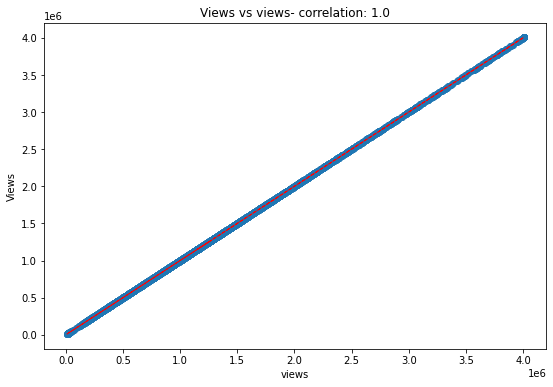

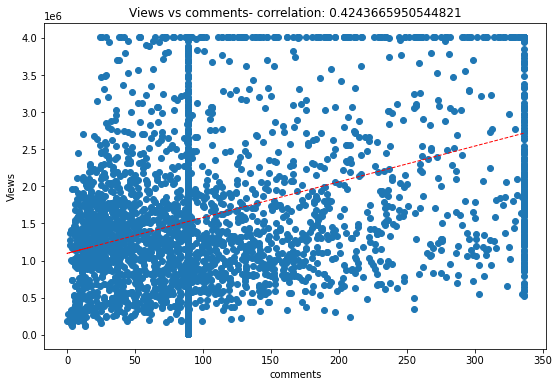

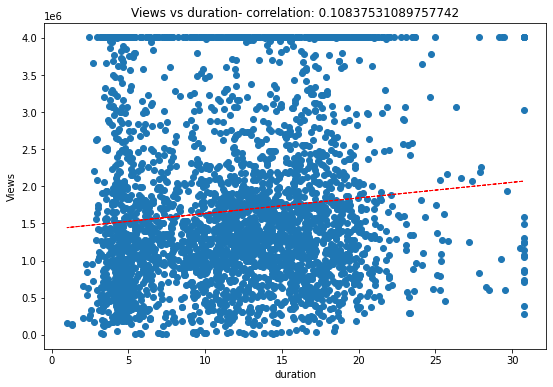

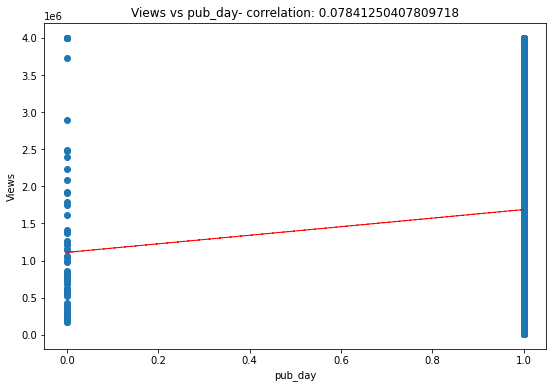

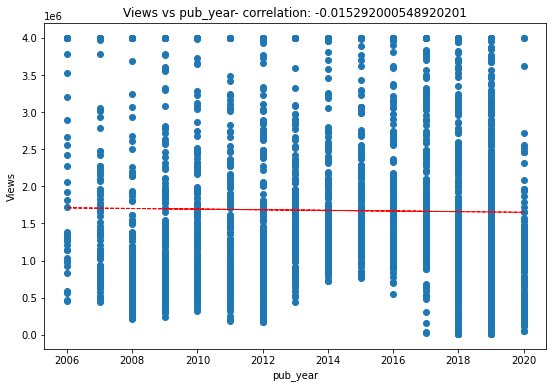

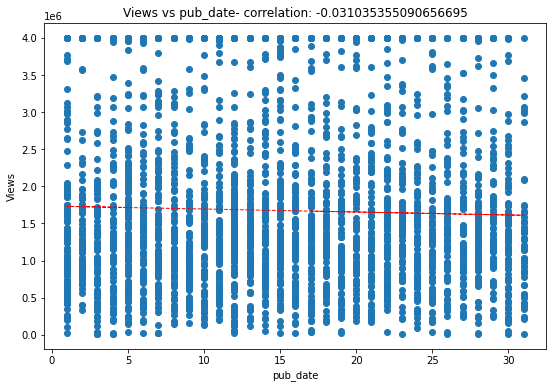

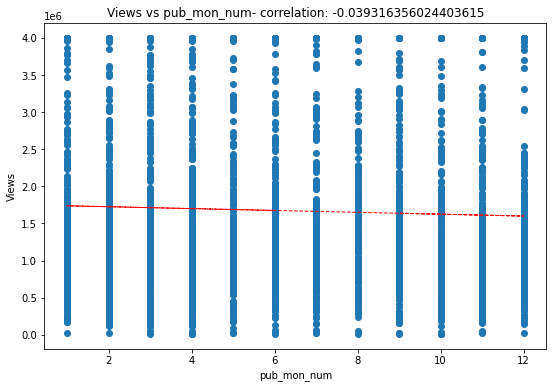

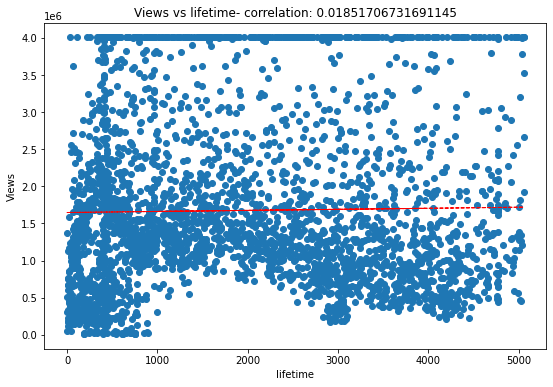

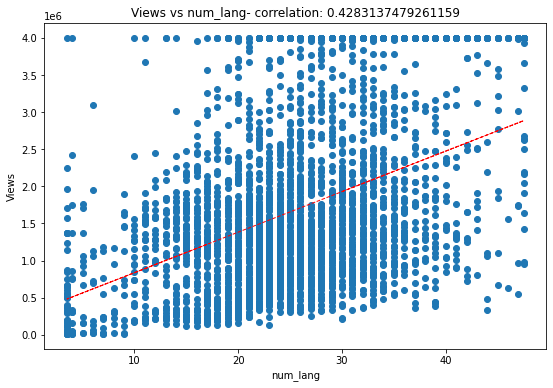

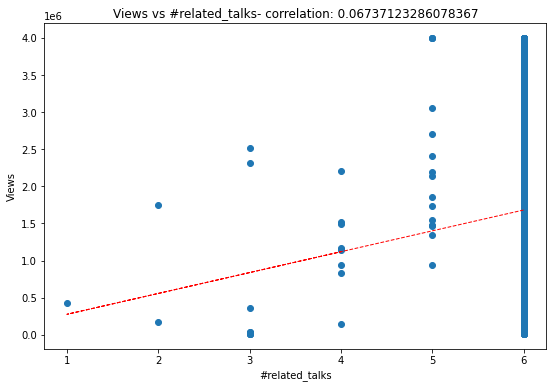

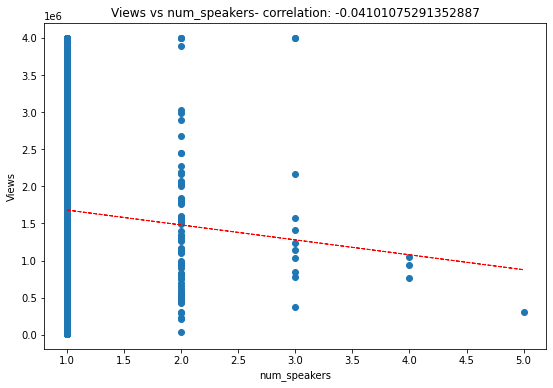

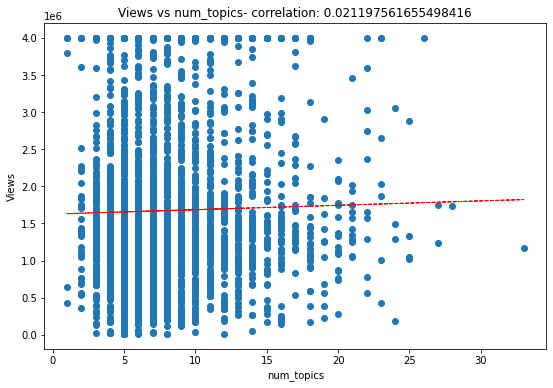

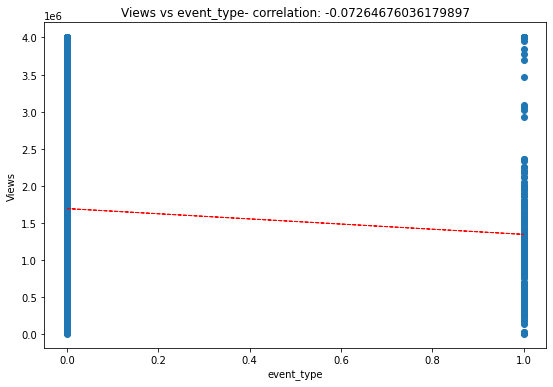

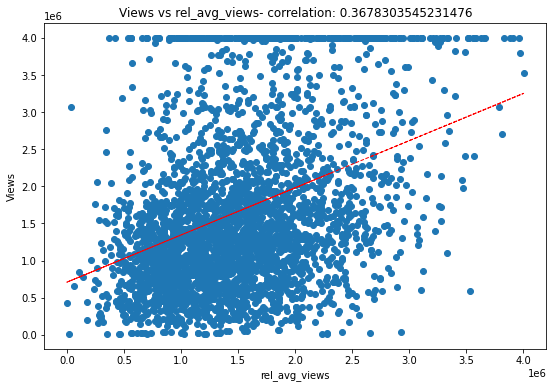

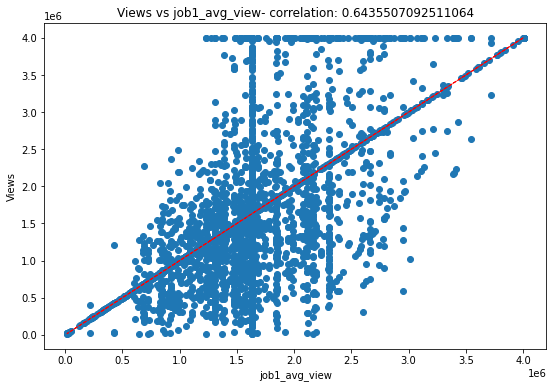

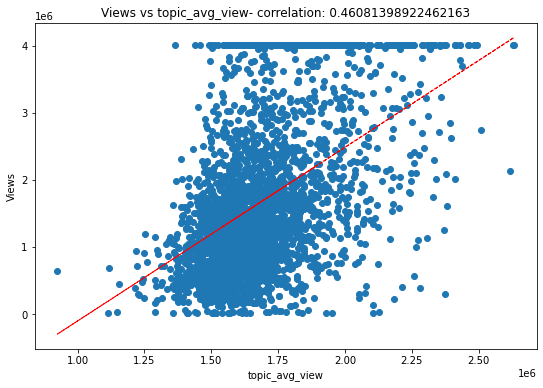

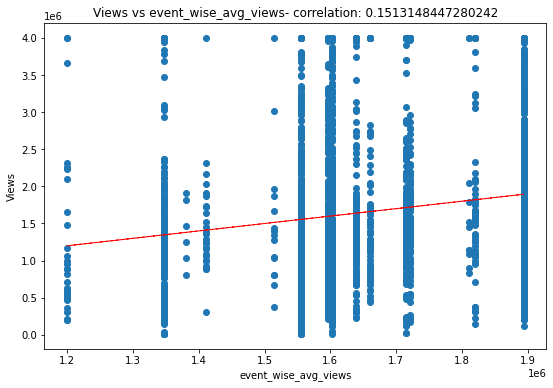

In [283]:
# Scatter plot along with polyfit line between views and all numerical columns of training dataset
for col in num_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = X_train[col]
    label = y_train['views']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Views')
    ax.set_title('Views vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(X_train[col], y_train['views'], 1)
    y_hat = np.poly1d(z)(X_train[col])

    plt.plot(X_train[col], y_hat, "r--", lw=1)

plt.show()

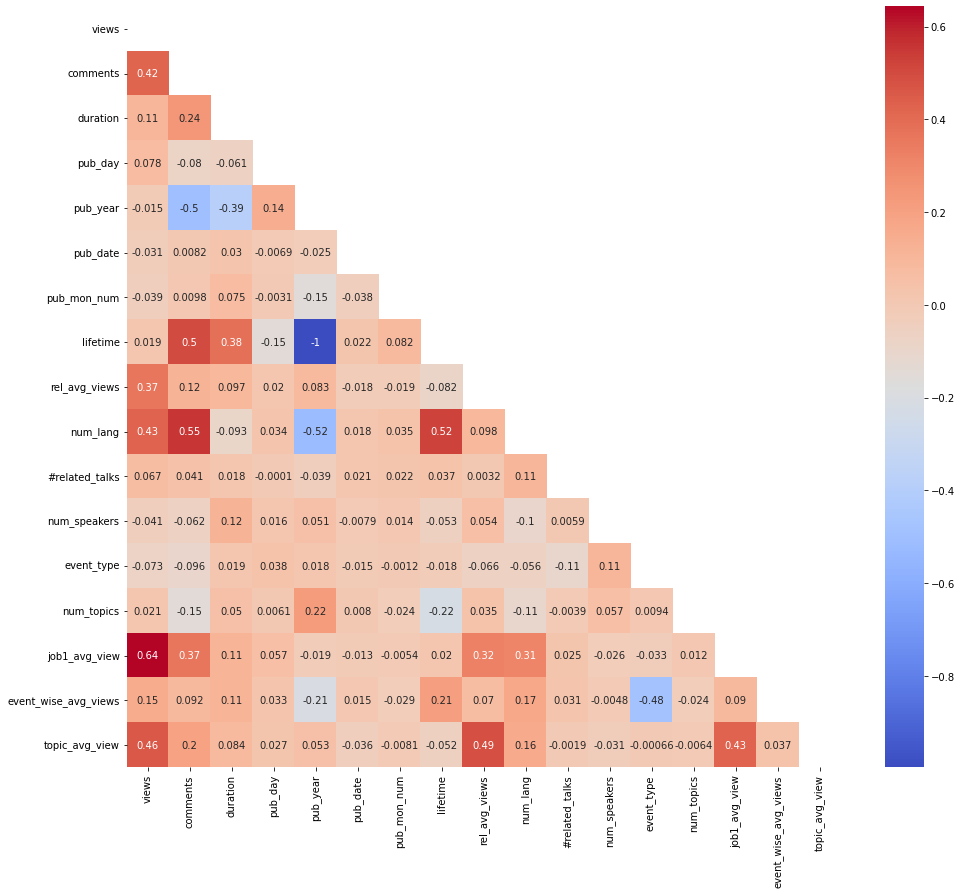

In [284]:
# Correlation Matrix for Training Dataset.
fig,ax = plt.subplots(figsize=(16,14))
# Compute the correlation matrix
corr = X_train[['views','comments','duration','pub_day','pub_year', 'pub_date','pub_mon_num', 'lifetime',
                     'rel_avg_views','num_lang','#related_talks','num_speakers','event_type','num_topics','job1_avg_view',
                     'event_wise_avg_views','topic_avg_view']].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# heatmap for correlation matrix
sns.heatmap(corr,annot=True,cmap='coolwarm',mask=mask)

* job1_avg_view is correlated to comments, num_lang and topic_avg_view 
* Comments is also correlated with num_lang and lifetime.
* Num_lang is also correlated with comments and lifetime.

In order to remove redundancy and tackle data leakage while building model, i am going to **drop Comments and job1_avg_view** variables.

Correlation interpretation for values between:

* 0 and 0.2 : very weak correlation
* 0.2 and 0.4 : weak correlation
* 0.4 and 0.6 : Moderately correlated
* 0.6 and 0.8 : strong correlation
* 0.8 and 1 : very strong correlation

As per above correlation matrix, followings can be deduced:
1. Views is strongly correlated with job1_avg_views, 
2. Views is moderately correlated with number of comments, topic_avg_views and number of languages, and
3. Views is weakly correlated with related_views.

In [285]:
calc_vif(X_train[[i for i in X_train.describe().columns if i not in ['views','talk_id','pub_year','#related_talks','event_wise_avg_views',
                                                                     'topic_avg_view','pub_day','num_lang','num_speakers']]])
# column 'pub_year' has VIF more than 10.
# Next higher VIF is for '#related_talks'
# Next higher VIF is for event_wise_avg_views
# Next higher VIF is for 'topic_avg_view'
# Next higher VIF is for 'pub_day'
# Next higher VIF is for 'num_lang'
# Next higher VIF is for 'num_speakers'
# All are within acceptable VIF ranges.

variables       VIF
0       comments  4.092975
1       duration  6.474001
2       pub_date  3.564298
3    pub_mon_num  3.641144
4       lifetime  4.310051
5     num_topics  4.417479
6     event_type  1.069797
7  rel_avg_views  6.543998
8  job1_avg_view  7.703919

In [286]:
# Copying to a new train and test datasets.
X_train1 = X_train.copy()
X_test1 = X_test.copy()

In [287]:
# Dropping irrelevant and textual columns
cols_to_drop = ['talk_id', 'views', 'event','topics', 'related_talks', 'occupation1','about_speakers']

In [288]:
# Dropping irrelevant and textual columns from both train and test datasets.
X_train1.drop(cols_to_drop,axis=1,inplace=True)
X_test1.drop(cols_to_drop,axis=1,inplace=True)

In [289]:
#importing the necessary libraries
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [290]:
# Sequential Forward Selection(sfs)
from sklearn.ensemble import RandomForestRegressor
sfs = SFS(RandomForestRegressor(),
          k_features=10,
          forward=True,
          floating=False,
          scoring = 'neg_mean_absolute_error',
          cv = 3)

sfs.fit(X_train1, y_train)
sfs.k_feature_names_

('comments',
 'duration',
 'pub_day',
 'pub_year',
 'lifetime',
 'num_lang',
 '#related_talks',
 'job1_avg_view',
 'topic_avg_view',
 'event_wise_avg_views')

In [293]:
# Selecting features according to the k highest score.
from sklearn.feature_selection import SelectKBest, f_regression
fs = SelectKBest(score_func=f_regression, k =10)

In [294]:
x_selected = fs.fit_transform(X_train1,y_train)
cols = fs.get_support(indices=True)
features_df_new = X_train1.iloc[:,cols]

In [295]:
features_df_new.columns

Index(['comments', 'duration', 'pub_day', 'num_lang', '#related_talks',
       'event_type', 'rel_avg_views', 'job1_avg_view', 'topic_avg_view',
       'event_wise_avg_views'],
      dtype='object')

## **Step 3. Feature Selection**

In [292]:
# List of predictors at this stage.
X_train1.columns

Index(['comments', 'duration', 'pub_day', 'pub_year', 'pub_date',
       'pub_mon_num', 'lifetime', 'num_lang', '#related_talks', 'num_speakers',
       'num_topics', 'event_type', 'rel_avg_views', 'job1_avg_view',
       'topic_avg_view', 'event_wise_avg_views'],
      dtype='object')

In [296]:
cols_to_keep1 = ['pub_day','duration','num_lang','rel_avg_views','topic_avg_view','event_wise_avg_views','lifetime',
                 'num_speakers']

In [297]:
# Updated Training and Test dataset.
X_train1 = X_train1[cols_to_keep1]
X_test1 = X_test1[cols_to_keep1]

In [298]:
# Features selected for modelling
X_train1.columns

Index(['pub_day', 'duration', 'num_lang', 'rel_avg_views', 'topic_avg_view',
       'event_wise_avg_views', 'lifetime', 'num_speakers'],
      dtype='object')

In [299]:
# MinMaxScaler Transformation on Predictor datasets.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_xtrain = scaler.fit_transform(X_train1)
scaled_xtest = scaler.transform(X_test1)

In [300]:
type(X_train1)

pandas.core.frame.DataFrame

# **E. Simpler base Models and their performance (Without hyperparameter Tuning**

## **1. Preliminary Models to check**:
  1. Linear Regression
  2. Lasso Linear Regression
  3. ElasticNet Regression
  4. KNN Regression
  5. CART Decision tree regression
  6. GBM regression
  7. XGBoost Regrssion
  8. RandomForest Regression
  9. SVR regression
  10. ExtraTrees Regression

In [301]:
# Importing relevant regression classes
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR

In [302]:
# creating pipeline for Scalinf and fitting models
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', MinMaxScaler()),('LASSO', Lasso(random_state=12))])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', MinMaxScaler()),('EN', ElasticNet(random_state=12))])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', MinMaxScaler()),('CART', DecisionTreeRegressor(random_state=12))])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', MinMaxScaler()),('GBM', GradientBoostingRegressor(random_state=12))])))
pipelines.append(('ScaledXGB', Pipeline([('Scaler', MinMaxScaler()),('XGB', XGBRegressor(random_state=12))])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', MinMaxScaler()),('RF', RandomForestRegressor(random_state=12))])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', MinMaxScaler()),('SVR', SVR())])))
pipelines.append(('ScaledExtraTrees', Pipeline([('Scaler', MinMaxScaler()),('ExtraTrees', ExtraTreesRegressor(random_state=12))])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21,shuffle=True)
    cv_results = cross_val_score(model, X_train1, y_train, cv=kfold, scoring='neg_mean_absolute_error')
    # "cross_val_score" splits the data into say 5 folds. Then for each fold it fits the data on 4 folds and scores the 5th fold. 
    # Then it gives you the 5 scores from which you can calculate a mean and variance for the score. 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -628508.369699 (28424.862696)
ScaledLASSO: -628509.133656 (28424.162443)
ScaledEN: -857961.677944 (20362.908224)
ScaledKNN: -640773.868588 (36331.833093)
ScaledCART: -791709.736336 (30413.705613)
ScaledGBM: -593850.146352 (35262.034227)
[05:43:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:43:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:43:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:43:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:43:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:43:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squar

I have tried Linear regression along with regularizeed Linear Models also. However, during EDA stage, we found no linear relationships between predictors and predicted variable. Also results of above models turned out to be not that good or satisfactory, which totally aligns with our non-linear dataset.

Further from the output above, we can see that the XGBoost Regressor performs the best using a scaled version of the data, shortly followed by GBM Regressor, and then by RandomForest regressor and ExtraTrees Regressor.

Let's look into above models and compare respective MAE metrics.

Scikit-learn considers by convention that a score follow the rule: 'higher values are better than lower values'. In this case a small MSE shows that your predictions are close to data so it follows the opposite rule. That's why sklearn consider the negative (actually opposite) MSE as score. Thus **a big neg_mean_squared_error is better than a low one.** 

## **1. Linear Regression**

In [303]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
# Building model by fitting Linear regression on trainig dataset
lr = linear.fit(scaled_xtrain,y_train)
lr.score(scaled_xtrain,y_train)

0.451836867974832

In [304]:
pred_train_lr=lr.predict(scaled_xtrain)
pred_test_lr=lr.predict(scaled_xtest)

In [305]:
# Ealuation metrics for Linear regression
models =[lr]
model_df = model_metric(models, y_train, y_test)
model_df

model_name Train RMSE  Test RMSE  Train MAE   Test MAE  \
0  Linear Regression  823153.29  793975.13  626543.26  599175.87   

  Train Adjusted-R2 Score Test Adjusted-R2 Score  
0                    0.45                   0.42

## **2. Lasso Regression**

In [306]:
from sklearn.linear_model import Lasso
lasso = Lasso(random_state=42)

In [307]:
# Building model by fitting Lasso regression on trainig dataset
reg_lasso = lasso.fit(scaled_xtrain,y_train)
reg_lasso.score(scaled_xtrain,y_train)

0.4518368674855092

In [308]:
pred_train_lasso=reg_lasso.predict(scaled_xtrain)
pred_test_lasso=reg_lasso.predict(scaled_xtest)

In [311]:
# Ealuation metrics for Lasso Regression
models =[reg_lasso]
model_df = model_metric(models, y_train, y_test)
model_df

model_name Train RMSE  Test RMSE  Train MAE  Test MAE  \
0  Lasso Regression  823153.29  793973.89  626544.05  599175.6   

  Train Adjusted-R2 Score Test Adjusted-R2 Score  
0                    0.45                   0.42

## **3. ElasticNet Regression**

In [312]:
from sklearn.linear_model import ElasticNet
elsn = ElasticNet()
parameters = {'alpha': [1e-3,1e-2,0.014,0.14,1,5,10,20,50,60,100],'l1_ratio':[0.3,0.35,0.38,0.4,0.6,0.8,0.9],'max_iter':[3000,5000,7000]}
reg_elsn = Model_Prediction(elsn,parameters, metric='neg_mean_squared_error', search='grid')
reg_elsn

Model Results
Best Train neg_mean_squared_error Score: 0.4518257470499355
Best Test neg_mean_squared_error Score: 0.42731640968426354
Best Parameters: ElasticNet(alpha=0.001, l1_ratio=0.9, max_iter=3000)


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.014, 0.14, 1, 5, 10, 20, 50,
                                   60, 100],
                         'l1_ratio': [0.3, 0.35, 0.38, 0.4, 0.6, 0.8, 0.9],
                         'max_iter': [3000, 5000, 7000]},
             scoring='neg_mean_squared_error')

In [313]:
reg_elsn.best_estimator_

ElasticNet(alpha=0.001, l1_ratio=0.9, max_iter=3000)

In [314]:
# Ealuation metrics for ElasticNet
models =[reg_elsn]
model_df = model_metric(models,y_train, y_test)
model_df

model_name Train RMSE  Test RMSE  Train MAE   Test MAE  \
0  ElasticNet Regression  823161.64  793793.31  626695.96  599188.45   

  Train Adjusted-R2 Score Test Adjusted-R2 Score  
0                    0.45                   0.42

Text(0.5, 1.0, 'Impact of Features on Views Prediction: ElasticNet Regression')

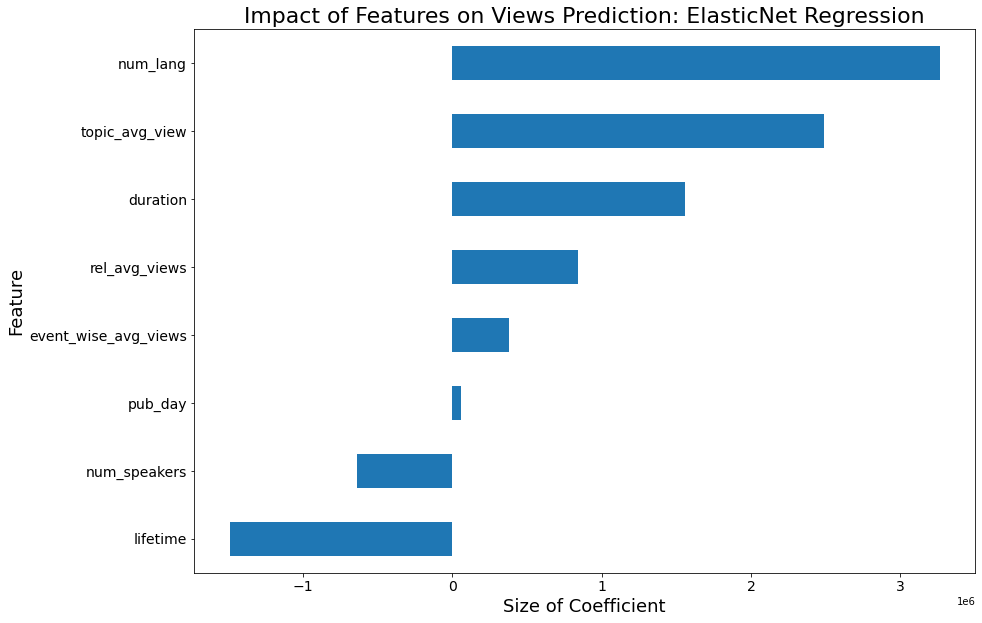

In [315]:
plot_coef(reg_elsn.best_estimator_)
plt.title('Impact of Features on Views Prediction: ElasticNet Regression',fontsize=22)

## **4. KNN Regression**

In [316]:
reg_knn = KNeighborsRegressor()
# Building model by fitting KNN regression on trainig dataset
reg_knn.fit(scaled_xtrain,y_train)
reg_knn.score(scaled_xtrain,y_train)

0.5986965538624902

In [317]:
# # Ealuation metrics for KNN
models =[reg_knn]
model_df = model_metric(models,y_train, y_test)
model_df

model_name Train RMSE  Test RMSE  Train MAE   Test MAE  \
0  KNN Regression   704307.4  818304.45  514202.42  602213.97   

  Train Adjusted-R2 Score Test Adjusted-R2 Score  
0                     0.6                   0.39

## **5. Decision Tree Regression**

In [318]:
reg_dt = DecisionTreeRegressor(random_state=22)
# Fitting DT model
reg_dt = reg_dt.fit(scaled_xtrain,y_train)
reg_dt.score(scaled_xtrain,y_train)

1.0

In [319]:
# Ealuation metrics for DecisionTree
models =[reg_dt]
model_df = model_metric(models, y_train, y_test)
model_df

model_name Train RMSE   Test RMSE Train MAE   Test MAE  \
0  DT Regression        0.0  1150856.49       0.0  813223.52   

  Train Adjusted-R2 Score Test Adjusted-R2 Score  
0                     1.0                  -0.21

## **6. GBM Regression**

In [323]:
# Fitting GBMmodel
reg_gbm = GradientBoostingRegressor(random_state=12)
reg_gbm = reg_gbm.fit(scaled_xtrain,y_train)
reg_gbm.score(scaled_xtrain,y_train)

0.5964248875731076

In [324]:
# Ealuation metrics for GBM
models =[reg_gbm]
model_df = model_metric(models, y_train, y_test)
model_df

model_name Train RMSE  Test RMSE  Train MAE   Test MAE  \
0  GBM Regression  706298.03  764408.07  526892.14  567054.63   

  Train Adjusted-R2 Score Test Adjusted-R2 Score  
0                    0.59                   0.47

## **7. XGBoost Regrssion**

In [325]:
data['views'].mean()

1662995.8933832708

In [326]:
from xgboost import XGBRegressor

In [327]:
# with default hyperparameters
xgb1=XGBRegressor(random_state=1)
# Fitting the model and getting score on training data
xgb1.fit(scaled_xtrain,y_train)
train_score = xgb1.score(scaled_xtrain,y_train)

[05:50:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [328]:
# Train data score
train_score

0.589226252423564

In [329]:
# Test data score
xgb1.score(scaled_xtest,y_test)

0.47683977874179095

In [330]:
# # Ealuation metrics for XGBoost
models =[xgb1]
model_df = model_metric(models, y_train, y_test)
model_df

model_name Train RMSE  Test RMSE Train MAE   Test MAE  \
0  XGBoost Regression  712569.37  758695.35  531415.9  561984.03   

  Train Adjusted-R2 Score Test Adjusted-R2 Score  
0                    0.59                   0.47

## **8. RandomForest Regression**

In [331]:
# Without hyperparameter tuning.
from sklearn.ensemble import RandomForestRegressor
rforest1 = RandomForestRegressor(random_state = 42)
# Fitting the model and getting score on training data
rforest1.fit(scaled_xtrain,y_train)

RandomForestRegressor(random_state=42)

In [332]:
# Ealuation metrics for ExtraTrees
models =[rforest1]
model_df = model_metric(models, y_train, y_test)
model_df

model_name Train RMSE  Test RMSE  Train MAE   Test MAE  \
0  RandomForest Regression  301820.05  778962.51  222090.08  582559.36   

  Train Adjusted-R2 Score Test Adjusted-R2 Score  
0                    0.93                   0.44

## **9. ExtraTrees Regression**

In [333]:
# with default hyperparameters
x_tree1=XGBRegressor(random_state=1)
# Fitting the model and getting score on training data
x_tree1.fit(scaled_xtrain,y_train)
train_score = x_tree1.score(scaled_xtrain,y_train)

[05:50:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [334]:
train_score

0.589226252423564

In [335]:
# Test data score
x_tree1.score(scaled_xtest,y_test)

0.47683977874179095

In [336]:
# Ealuation metrics for ExtraTrees
models =[x_tree1]
model_df = model_metric(models, y_train, y_test)
model_df

model_name Train RMSE  Test RMSE Train MAE   Test MAE  \
0  ExtraTrees Regression  712569.37  758695.35  531415.9  561984.03   

  Train Adjusted-R2 Score Test Adjusted-R2 Score  
0                    0.59                   0.47

##**Comparing above Base models together**


In [337]:
# Comparing Ealuation metrics for all base models
models =[lr,reg_lasso,reg_knn,reg_dt,reg_gbm,xgb1,rforest1,x_tree1]
model_df = model_metric(models, y_train, y_test)
model_df

model_name Train RMSE   Test RMSE  Train MAE   Test MAE  \
0        Linear Regression  823153.29   793975.13  626543.26  599175.87   
1         Lasso Regression  823153.29   793973.89  626544.05   599175.6   
2           KNN Regression   704307.4   818304.45  514202.42  602213.97   
3            DT Regression        0.0  1150856.49        0.0  813223.52   
4           GBM Regression  706298.03   764408.07  526892.14  567054.63   
5       XGBoost Regression  712569.37   758695.35   531415.9  561984.03   
6  RandomForest Regression  301820.05   778962.51  222090.08  582559.36   
7    ExtraTrees Regression  712569.37   758695.35   531415.9  561984.03   

  Train Adjusted-R2 Score Test Adjusted-R2 Score  
0                    0.45                   0.42  
1                    0.45                   0.42  
2                     0.6                   0.39  
3                     1.0                  -0.21  
4                    0.59                   0.47  
5                    0.59                   0.47  
6                    0.93                   0.44  
7                    0.59                   0.47

* Based on MAE scores, i have decided to do Hyper-parameter Tuning for XGBoost, RandomForest and XtraTrees Regression

# **F. Hyper-Parameter Tuning**

## **1. XGBoost With Hyperparameter Tuning**


> The most powerful ML algorithm like XGBoost is famous for picking up patterns and regularities in the data by automatically tuning thousands of learnable hyper-parameters.



In [ ]:
# param_grid = {
#     'n_estimators': [100,200,400,1000], # more trees required for low learning rate
#     'max_depth': [4, 6, 8],
#     'learning_rate': [0.02, 0.05, 0.1,0.5], #try higher learning rate
#     'min_child_weight': [20,25,30],
#     'subsample' : [0.6, 0.8, 1],
#     'lambda' : [1,1.5],
#     'gamma': [0.2, 0.25, 0.5]
#     }

In [338]:
# Hyper-Parameters values for tuning
param_grid = {
    'n_estimators': [200,300,400],
    'max_depth': [5, 6, 7],
    'learning_rate': [0.02, 0.5],
    'min_child_weight': [25,30,35],
    'subsample' : [0.4,0.5, 1],
    'lambda' : [1,1.5],
    'gamma': [0.2, 0.5]
    }

In [339]:
import warnings
warnings.filterwarnings('ignore')

In [320]:
# Initiating XGBRegresor class
xgb=XGBRegressor(random_state=1,eval_metric='mae',verbosity = 0)

In [ ]:
# Fitting model
xgb = Model_Prediction(xgb,param_grid, metric='neg_mean_absolute_error', search='grid')

In [389]:
# Best hyper-parameter values achieved
xgb.best_estimator_

XGBRegressor(eval_metric='mae', gamma=0.2, lambda=1, learning_rate=0.02,
             max_depth=5, min_child_weight=30, n_estimators=400, random_state=1,
             subsample=0.5, verbosity=0)

In [342]:
# Evaluation metric after hyper-parameter tuning
models =[xgb]
model_df = model_metric(models, y_train, y_test)
model_df

model_name Train RMSE Test RMSE  Train MAE   Test MAE  \
0  XGBoost Regression  673721.23  738849.3  495210.74  542575.07   

  Train Adjusted-R2 Score Test Adjusted-R2 Score  
0                    0.63                    0.5

Text(0.5, 1.0, 'Impact of Features on Views Prediction: XGBoost Regression')

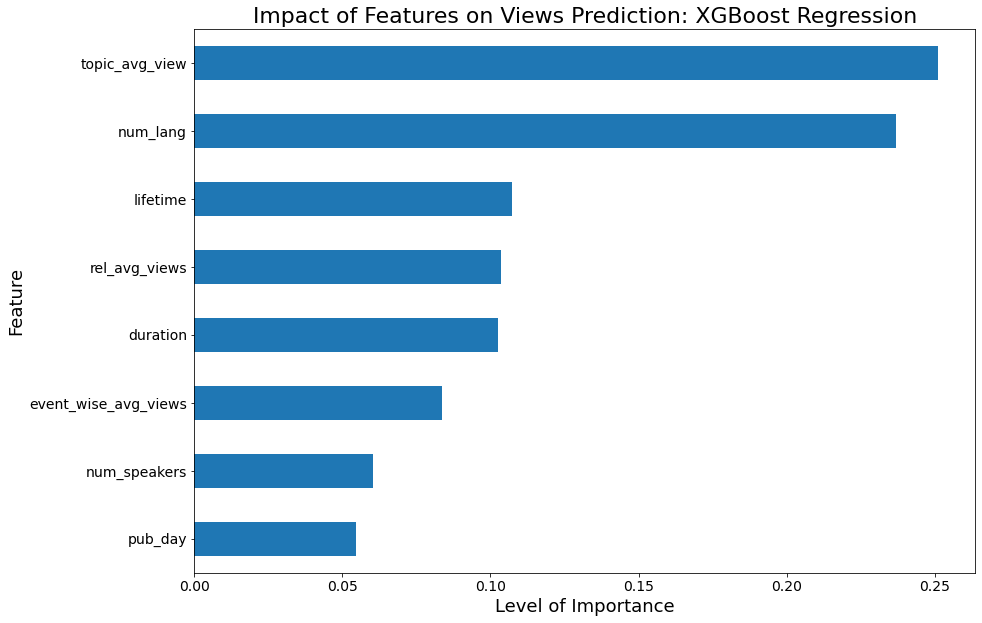

In [343]:
# Plotting Features and their importances
plot_coef(xgb.best_estimator_)
plt.title('Impact of Features on Views Prediction: XGBoost Regression',fontsize=22)

## **2. Random Forest With Hyper-parameters tuning**

In [348]:
# Hyper-parameters values for tuning
n_estimators = [200,300]      # Number of trees

max_depth = [10,25]           # Maximum depth of trees

min_samples_split = [25,50,80] # Minimum number of samples required to split a node

min_samples_leaf = [15,20,40]  # Minimum number of samples required at each leaf node

max_features = [0.33, 1].     # Maximum features to sample at each tree

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'max_features' : max_features,
              "bootstrap": [True, False]}

In [321]:
from sklearn.ensemble import RandomForestRegressor
rforest = RandomForestRegressor(random_state = 18,n_jobs=-1,criterion="absolute_error")

In [349]:
# The criterion (Loss method) method evaluates the split in the tree. 
# If the scores are evaluated based on the mean absolute error, then you should use the "mae" criterion.
# The scoring method evaluates the quality of the model as a whole.
rforest = Model_Prediction(rforest,param_dict, metric='neg_mean_absolute_error', search='random')

Model Results
Best Train neg_mean_absolute_error Score: 0.539615965723416
Best Test neg_mean_absolute_error Score: 0.41828435104276507
Best Parameters: RandomForestRegressor(bootstrap=False, criterion='absolute_error', max_depth=25,
                      max_features=0.33, min_samples_leaf=20,
                      min_samples_split=25, n_estimators=300, n_jobs=-1,
                      random_state=18)


In [352]:
# Evaluation metric after Hyperparameter tuning using random search
models =[rforest]
model_df = model_metric(models, y_train, y_test)
model_df

model_name Train RMSE  Test RMSE  Train MAE   Test MAE  \
0  RandomForest Regression  754372.65  800028.47  527675.82  573642.63   

  Train Adjusted-R2 Score Test Adjusted-R2 Score  
0                    0.54                   0.41

In [354]:
# Using grid Search now to arrive at more optimal values after random search
from sklearn.ensemble import RandomForestRegressor
rforest2 = RandomForestRegressor(random_state = 18,n_jobs=-1,criterion="absolute_error")

n_estimators = [200,300,400]      # Number of trees

max_depth = [10,25,50]            # Maximum depth of trees

min_samples_split = [15,25,35]    # Minimum number of samples required to split a node

min_samples_leaf = [15,20,25]    # Minimum number of samples required at each leaf node

max_features = [0.33, 0.5]      # Max features

# HYperparameter Grid
param_dict2 = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'max_features' : max_features,
              # "bootstrap": [True, False]
               }

In [355]:
# Fitting model
rforest2 = Model_Prediction(rforest2,param_dict2, metric='neg_mean_absolute_error', search='grid')

Model Results
Best Train neg_mean_absolute_error Score: 0.5571701827482093
Best Test neg_mean_absolute_error Score: 0.4400311320988748
Best Parameters: RandomForestRegressor(criterion='absolute_error', max_depth=25,
                      max_features=0.5, min_samples_leaf=15,
                      min_samples_split=15, n_estimators=400, n_jobs=-1,
                      random_state=18)


In [358]:
# Evaluation Metric after final Hyperparameters tuning
models =[rforest2]
model_df = model_metric(models, y_train, y_test)
model_df

model_name Train RMSE  Test RMSE  Train MAE   Test MAE  \
0  RandomForest Regression  739850.95  784931.95  515061.69  561100.77   

  Train Adjusted-R2 Score Test Adjusted-R2 Score  
0                    0.55                   0.44

In [360]:
# Best models hyperparameters values
rforest2.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=25,
                      max_features=0.5, min_samples_leaf=15,
                      min_samples_split=15, n_estimators=400, n_jobs=-1,
                      random_state=18)

Text(0.5, 1.0, 'Impact of Features on Views Prediction: RandomForest Regression')

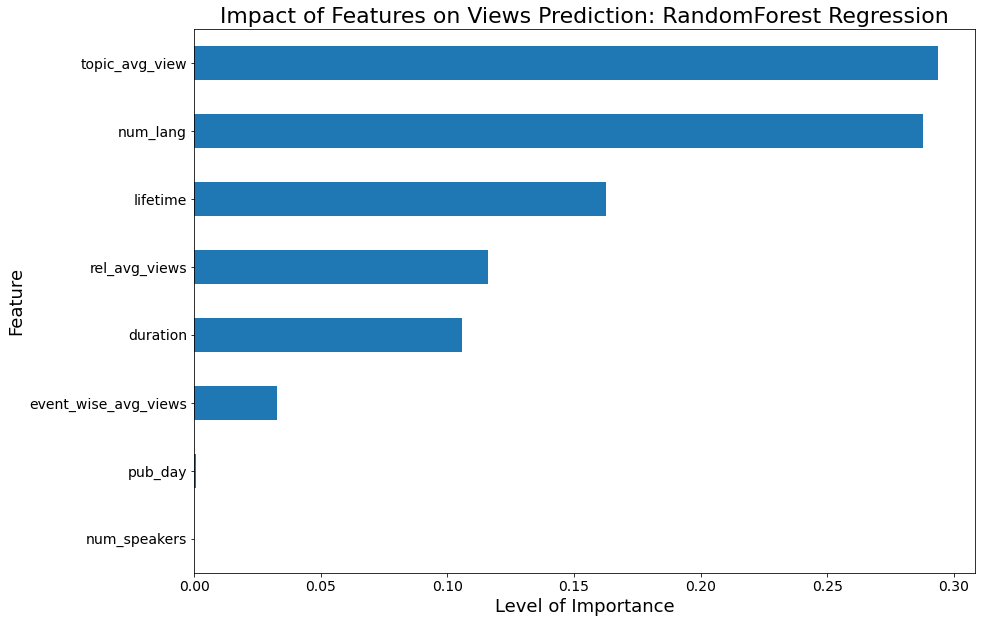

In [361]:
# PLotting features and their importances
plot_coef(rforest2.best_estimator_)
plt.title('Impact of Features on Views Prediction: RandomForest Regression',fontsize=22)

## **3. ExtraTrees Regression With Hyper-parameter Tuning**

In [322]:
# Importing ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
x_tree = ExtraTreesRegressor(random_state=42,criterion='absolute_error')

In [346]:
# Values to search for Tuning
param_grid = {
    'n_estimators': [200,400],
    'min_samples_split' : [5,10,20,50]}

In [347]:
x_tree= Model_Prediction(x_tree,param_grid, metric='neg_mean_absolute_error', search='grid')

Model Results
Best Train neg_mean_absolute_error Score: 0.8286823266014272
Best Test neg_mean_absolute_error Score: 0.4643394806069312
Best Parameters: ExtraTreesRegressor(min_samples_split=10, n_estimators=800, random_state=42)


In [351]:
x_tree.best_estimator_

ExtraTreesRegressor(min_samples_split=10, n_estimators=800, random_state=42)

In [350]:
# Evaluation metric after tuning
models =[x_tree]
model_df = model_metric(models, y_train, y_test)
model_df

model_name Train RMSE  Test RMSE  Train MAE   Test MAE  \
0  ExtraTrees Regression   460179.1  767705.91  337828.34  572852.18   

  Train Adjusted-R2 Score Test Adjusted-R2 Score  
0                    0.83                   0.46

Text(0.5, 1.0, 'Impact of Features on Views Prediction: ExtraTrees Regression')

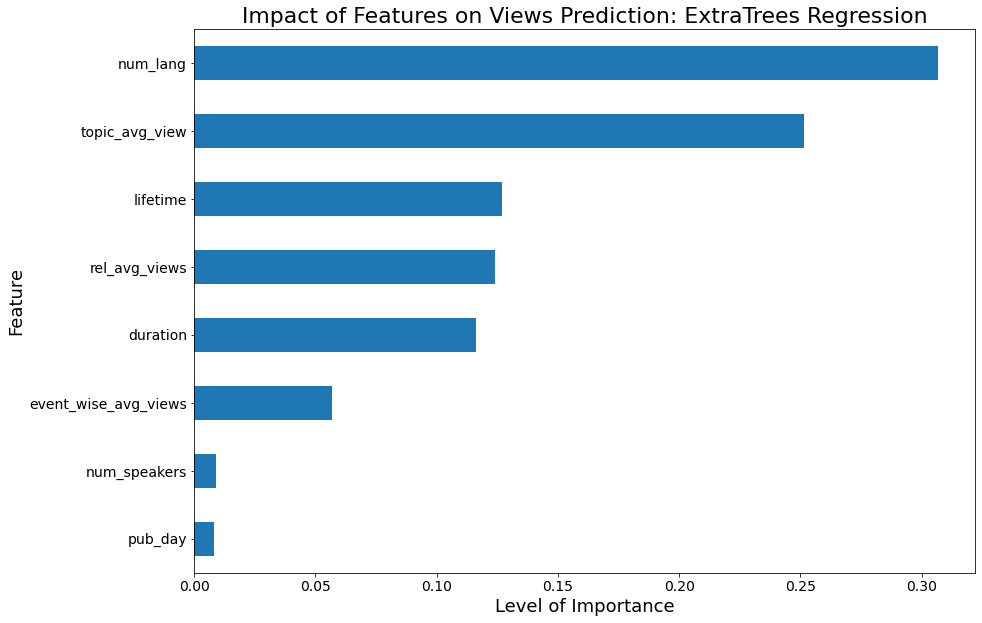

In [362]:
# Plotting features and their importances
plot_coef(x_tree.best_estimator_)
plt.title('Impact of Features on Views Prediction: ExtraTrees Regression',fontsize=22)

## **Compiling results after Hyper-parameter Tuning**

In [363]:
# Comparing metrics after tuning
models =[xgb,rforest2,x_tree]
model_df = model_metric(models, y_train, y_test)
model_df

model_name Train RMSE  Test RMSE  Train MAE   Test MAE  \
0       XGBoost Regression  673721.23   738849.3  495210.74  542575.07   
1  RandomForest Regression  739850.95  784931.95  515061.69  561100.77   
2    ExtraTrees Regression   460179.1  767705.91  337828.34  572852.18   

  Train Adjusted-R2 Score Test Adjusted-R2 Score  
0                    0.63                    0.5  
1                    0.55                   0.44  
2                    0.83                   0.46

# **Conclusion**

**Summary** 
* Started with loading dataset and relevant python libraries. Then did EDA and found underlying patterns driving views of a TED Talk. 
* Then analyzed the data for missing values, outliers and irregularitie, and were accordingly handled.
* Checked Multi-collinearity and relationship between target variable and various numerical variables.
* Did Train-test split (80:20) and after that extracted new features from categorical features (such as Topics, Related Talks, Occupations and Event) using Target Mean Encoding. Applied same feature extraction technique on testing dataset, keeping information only from Training dataset to ensure no Data Leakage.
* Found that comments and views have reinforcing feedback loop relationship, i.e., if view increase, comment increase and as comments increase, views increase. Its like Chicken-egg paradox. Each variable drives the other and thus has inherent data leakage issue. While model building, comments was dropped.
* Using SelectKBest, Forward Selection and Correlation coefficient, selected 8 features for model creation.
* Built simpler models like Linear, KNN, DecisionTree, XGBoost, RandomForest etc. and compared performance of each model based on MAE (Mean Absolute Error). I have considered MAE instead of RMSE as RMSE penalizes large outliers heavily.
* Found that XGBoost and RandomForest were showing promising results. Accordingly, did Hyperparameter Tuning of both models. After tuning, MAE scores improved a little.
* On average, achieved Test MAE of ~550K views. Best performing model was XGBoost after tuning with Best MAE score of ~542K views on test dataset.
* Based on above Ensemble-models, following features turned out to be most important:
  1. Average of views of all topics for a Talk.
  2. Number of Langauges in which a Talk is available for viewing.
  3. How many days ago a talk was published? (i.e, Days for whihc it was available for viewing online)
* Further, to improve model it turns out we need to experiment with other textual features like title, description, transcript as well using NLP. This will be taken upon later in future.

**KeyTakeaway: What can get a Talk Maximum views?**

Following points need to be considered by TED team while curating a new TED Talk to maximize views:
1. Occupation of Speaker : On average, Talks delivered by Writers, authors, psychologist, journalist and neuroscientist receive maximum average views.
2. Speakers such as Amy Cuddy, James Veitch and Tim Urban have highest average views per talk.
3. Talks delivered at "TED Conference" event have the highest average views per talk; shortly followed by "TED Global" event.
4. Talks in Native Language English always gurantee significant average views.
5. Talks based on topics such as Creativity, Body Language, Well-being, Success/Productivity, Science and Comedy attracts a lot of views.
6. On average, Talks of duration between 20-25 minutes generally have highest views. Views decreases as talks become longer or very much shorter.
7. Ted talks published on Friday has the highest average number of views; shortly followed by Wednesday. While Ted talks published on weekends have the least average number of views.
8. A talks's availability in more languages increase views.

# **B) Future Work Ideas: Topics, Title and Description corpus using NLP**

In [364]:
df_encoded.columns

Index(['talk_id', 'about_speakers', 'views', 'event', 'native_lang',
       'comments', 'duration', 'topics', 'related_talks', 'occupation1',
       'pub_day', 'pub_year', 'pub_date', 'pub_mon_num', 'lifetime',
       'num_lang', '#related_talks', 'num_speakers', 'num_topics',
       'event_type'],
      dtype='object')

In [365]:
df_3 = df_encoded.copy()

In [366]:
df_3.loc[0,'topics'][0]

'alternative energy'

## **A. Vectorization of topics column Only**

### Creating Topics Corpus and respective vectors as features

In [367]:
# For each talk, combining all topics in one single string
df_3['topic_str'] = 'nil'
for i,row in df_3.iterrows():
  list1 = row['topics']
  elem = ''
  for j in range(len(list1)):
    elem = elem + ' ' +list1[j].lower()
  # print(elem)
  df_3.loc[i,'topic_str'] = elem

In [368]:
df_3.head(1)

talk_id                                     about_speakers     views  \
3112    31376  {0: "Tony Luciani picked up a camera in 2014 t...  539573.0   

     event  native_lang  comments  duration  \
3112  TEDx            1      38.0     13.53   

                                                 topics  \
3112  [TEDx, aging, family, Alzheimer's, parenting, ...   

                                          related_talks occupation1  pub_day  \
3112  {8589: 'The hidden role informal caregivers pl...      artist        1   

      pub_year  pub_date  pub_mon_num  lifetime  num_lang  #related_talks  \
3112      2019        14            1       472      27.0               6   

      num_speakers  num_topics  event_type  \
3112           1.0          10           0   

                                              topic_str  
3112   tedx aging family alzheimer's parenting human...

In [369]:
# Lets drop topics & related_talks column now
df_3.drop(['topics','related_talks'], axis=1, inplace=True)

In [370]:
df_3.shape

(4005, 19)

In [371]:
# TF-IDF Vectorizer for topic_str column
from sklearn.feature_extraction.text import TfidfVectorizer

In [372]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [373]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [374]:
df_3['topic_str'] = df_3['topic_str'].apply(stopwords)
df_3.head(2)

talk_id                                     about_speakers      views  \
3112    31376  {0: "Tony Luciani picked up a camera in 2014 t...   539573.0   
2194     2546  {0: 'Shubhendu Sharma creates afforestation me...  2645240.0   

     event  native_lang  comments  duration       occupation1  pub_day  \
3112  TEDx            1      38.0     13.53            artist        1   
2194  TED@            1      74.0      9.18  eco-entrepreneur        1   

      pub_year  pub_date  pub_mon_num  lifetime  num_lang  #related_talks  \
3112      2019        14            1       472      27.0               6   
2194      2016        14            7      1386      37.0               6   

      num_speakers  num_topics  event_type  \
3112           1.0          10           0   
2194           1.0          23           0   

                                              topic_str  
3112  tedx aging family alzheimer's parenting humani...  
2194  botany cities design ecology engineering envir...

In [375]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# fit the vectorizer using the text data
tfid_vectorizer.fit(df_3['topic_str'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [376]:
# extract the tfid representation matrix of the text data
tfid_matrix = tfid_vectorizer.transform(df_3['topic_str'])
# collect the tfid matrix in numpy array
array = tfid_matrix.todense()

In [377]:
df_4 = pd.DataFrame(array, columns=tfid_vectorizer.get_feature_names())
df_4

3d  activism  addiction  adventure  advertising  africa     aging  \
0     0.0  0.000000        0.0        0.0          0.0     0.0  0.359517   
1     0.0  0.000000        0.0        0.0          0.0     0.0  0.000000   
2     0.0  0.000000        0.0        0.0          0.0     0.0  0.000000   
3     0.0  0.000000        0.0        0.0          0.0     0.0  0.000000   
4     0.0  0.198024        0.0        0.0          0.0     0.0  0.000000   
...   ...       ...        ...        ...          ...     ...       ...   
4000  0.0  0.000000        0.0        0.0          0.0     0.0  0.000000   
4001  0.0  0.000000        0.0        0.0          0.0     0.0  0.000000   
4002  0.0  0.000000        0.0        0.0          0.0     0.0  0.000000   
4003  0.0  0.000000        0.0        0.0          0.0     0.0  0.000000   
4004  0.0  0.301675        0.0        0.0          0.0     0.0  0.000000   

      agriculture   ai  aids  aircraft  algorithm  alternative  alzheimer  \
0             0.0  0.0   0.0       0.0        0.0          0.0   0.477039   
1             0.0  0.0   0.0       0.0        0.0          0.0   0.000000   
2             0.0  0.0   0.0       0.0        0.0          0.0   0.000000   
3             0.0  0.0   0.0       0.0        0.0          0.0   0.000000   
4             0.0  0.0   0.0       0.0        0.0          0.0   0.000000   
...           ...  ...   ...       ...        ...          ...        ...   
4000          0.0  0.0   0.0       0.0        0.0          0.0   0.000000   
4001          0.0  0.0   0.0       0.0        0.0          0.0   0.000000   
4002          0.0  0.0   0.0       0.0        0.0          0.0   0.000000   
4003          0.0  0.0   0.0       0.0        0.0          0.0   0.000000   
4004          0.0  0.0   0.0       0.0        0.0          0.0   0.000000   

      america  ancient  animals  animation  antarctica  anthropocene  \
0         0.0      0.0      0.0   0.000000         0.0           0.0   
1         0.0      0.0      0.0   0.000000         0.0           0.0   
2         0.0      0.0      0.0   0.278315         0.0           0.0   
3         0.0      0.0      0.0   0.000000         0.0           0.0   
4         0.0      0.0      0.0   0.000000         0.0           0.0   
...       ...      ...      ...        ...         ...           ...   
4000      0.0      0.0      0.0   0.000000         0.0           0.0   
4001      0.0      0.0      0.0   0.280254         0.0           0.0   
4002      0.0      0.0      0.0   0.000000         0.0           0.0   
4003      0.0      0.0      0.0   0.000000         0.0           0.0   
4004      0.0      0.0      0.0   0.000000         0.0           0.0   

      anthropology  ants  apes  archaeology  architecture       art  arts  \
0         0.000000   0.0   0.0          0.0           0.0  0.229434   0.0   
1         0.000000   0.0   0.0          0.0           0.0  0.000000   0.0   
2         0.000000   0.0   0.0          0.0           0.0  0.000000   0.0   
3         0.000000   0.0   0.0          0.0           0.0  0.000000   0.0   
4         0.000000   0.0   0.0          0.0           0.0  0.000000   0.0   
...            ...   ...   ...          ...           ...       ...   ...   
4000      0.790294   0.0   0.0          0.0           0.0  0.000000   0.0   
4001      0.000000   0.0   0.0          0.0           0.0  0.000000   0.0   
4002      0.000000   0.0   0.0          0.0           0.0  0.000000   0.0   
4003      0.000000   0.0   0.0          0.0           0.0  0.000000   0.0   
4004      0.000000   0.0   0.0          0.0           0.0  0.276892   0.0   

      asia  asteroid  astrobiology  astronomy  atheism  audacious  augmented  \
0      0.0       0.0           0.0        0.0      0.0        0.0        0.0   
1      0.0       0.0           0.0        0.0      0.0        0.0        0.0   
2      0.0       0.0           0.0        0.0      0.0        0.0        0.0   
3      0.0       0.0           0.0        0.0      0.0     

In [378]:
dictionary

dict_items([('tedx', 433), ('aging', 6), ('family', 164), ('alzheimer', 13), ('parenting', 319), ('humanity', 213), ('art', 25), ('love', 252), ('life', 249), ('photography', 328), ('botany', 58), ('cities', 78), ('design', 121), ('ecology', 135), ('engineering', 146), ('environment', 149), ('future', 181), ('green', 197), ('garden', 183), ('microbes', 274), ('microbiology', 275), ('natural', 297), ('resources', 373), ('nature', 298), ('science', 380), ('plants', 334), ('entrepreneur', 148), ('sustainability', 424), ('ted', 430), ('fellows', 168), ('trees', 448), ('urban', 454), ('planning', 333), ('global', 189), ('development', 122), ('india', 221), ('fungi', 179), ('animation', 17), ('programming', 355), ('ed', 137), ('education', 138), ('technology', 429), ('code', 81), ('gaming', 182), ('math', 264), ('sports', 408), ('psychology', 359), ('choice', 76), ('activism', 1), ('crime', 103), ('criminal', 104), ('justice', 241), ('personal', 323), ('growth', 198), ('social', 395), ('chan

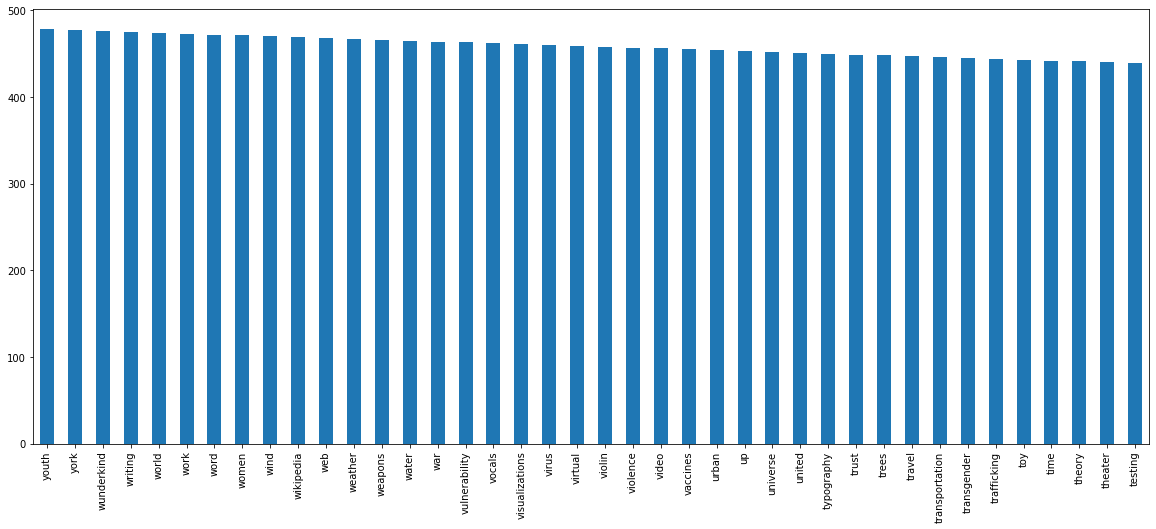

In [379]:
# lists to store the topics and counts
topic = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    topic.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab1 = pd.Series(count, index=topic)
# sort the dataframe
vocab1 = vocab1.sort_values(ascending=False)
# plot of the top 40 topics
top_vacab = vocab1.head(40)
top_vacab.plot(kind = 'bar', figsize=(20,8))

In [380]:
# concating vectorized topics df to df_3
df_new = pd.merge(df_3, df_4, left_index=True, right_index=True)

In [381]:
df_new.head(1)

talk_id                                     about_speakers     views  \
3112    31376  {0: "Tony Luciani picked up a camera in 2014 t...  539573.0   

     event  native_lang  comments  duration occupation1  pub_day  pub_year  \
3112  TEDx            1      38.0     13.53      artist        1      2019   

      pub_date  pub_mon_num  lifetime  num_lang  #related_talks  num_speakers  \
3112        14            1       472      27.0               6           1.0   

      num_topics  event_type  \
3112          10           0   

                                              topic_str   3d  activism  \
3112  tedx aging family alzheimer's parenting humani...  0.0       0.0   

      addiction  adventure  advertising  africa  aging  agriculture   ai  \
3112        0.0        0.0          0.0     0.0    0.0          0.0  0.0   

      aids  aircraft  algorithm  alternative  alzheimer  america  ancient  \
3112   0.0       0.0        0.0          0.0        0.0      0.0      0.0   

      animals  animation  antarctica  anthropocene  anthropology  ants  apes  \
3112      0.0        0.0         0.0           0.0           0.0   0.0   0.0   

      archaeology  architecture       art  arts  asia  asteroid  astrobiology  \
3112          0.0           0.0  0.514624   0.0   0.0       0.0           0.0   

      astronomy  atheism  audacious  augmented  autism  bacteria  balance  \
3112        0.0      0.0        0.0        0.0     0.0       0.0      0.0   

      bang  beauty  bees  behavioral  best  big  biodiversity  bioethics  \
3112   0.0     0.0   0.0         0.0   0.0  0.0           0.0        0.0   

      biology  biomechanics  biomimicry  bionics  biosphere  biotech  birds  \
3112      0.0           0.0         0.0      0.0        0.0      0.0    0.0   

      blindness  blockchain  blue  body  book  books  botany  brain  brand  \
3112        0.0         0.0   0.0   0.0   0.0    0.0     0.0    0.0    0.0   

      brazil  buddhism  building  bullying  business  cancer  capitalism  \
3112     0.0       0.0       0.0       0.0       0.0     0.0         0.0   

      care  cars  cello  change  charter  chemistry  children  china  choice  \
3112   0.0   0.0    0.0     0.0      0.0        0.0       0.0    0.0     0.0   

      christianity    cities  climate  cloud  code  cognitive  collaboration  \
3112           0.0  0.657694      0.0    0.0   0.0        0.0            0.0   

      comedy  commons  communication  community  compassion  complexity  \
3112     0.0      0.0            0.0   0.550092         0.0         0.0   

      composing  computers  conducting  connects  consciousness  conservation  \
3112        0.0        0.0         0.0       0.0            0.0           0.0   

      consumerism  cooperation  coral  coronavirus  corruption  cosmos  \
3112          0.0          0.0    0.0          0.0         0.0     0.0   

      creativity  crime  criminal  crispr  crowdsourcing  cryptocurrency  \
3112         0.0    0.0       0.0     0.0            0.0             0.0   

      culture  cultures  curiosity  dance  dark  data  death  debate  \
3112      0.0       0.0        0.0    0.0   0.0   0.0    0.0     0.0   

      decision  deextinction  demo  democracy  depression  design  \
3112       0.0           0.0   0.0        0.0         0.0     0.0   

      development  dinosaurs  disability  disaster  discovery  disease  \
3112          0.0        0.0         0.0       0.0        0.0      0.0   

      disorder  diversity  dna  driverless  drones  east  ebola  ecology  \
3112       0.0        0.0  0.0         0.0     0.0   0.0    0.0      0.0   

      economics   ed  education  egypt  electricity  emotions  empathy   en  \
3112        0.0  0.0        0.0    0.0          0.0       0.0      0.0  0.0   

      encryption  energy  engineering  entertainment  entrepreneur  \
3112         0.0     0.0          0.0            0.0           0.0   

      environment  epidemiology  equality  español  europe  evil  evolution  \
311

In [382]:
# Lets drop topic_str column
df_new.drop(['talk_id','about_speakers','event','occupation1','topic_str'],axis=1,inplace=True)

In [383]:
df_new.shape

(4005, 493)

### **Train-Test Splitting**

In [384]:
X_3 = df_new.drop(['views','comments'],axis=1)
y_3 = df_new['views']

In [385]:
# Train-test splitting
X_train3, X_test3, y_train3, y_test3, scaled_xtrain, scaled_xtest = split_func(X_3,y_3)

### **1. Lasso Regression Model**

In [387]:
lasso = Lasso()
parameters = {'alpha': [0.015,1e-3,0.15,1e-2,1e-1,1,10,20,40,50,60,100,150],
              'max_iter': [1000,3000,5000]}
reg_lasso = Model_Prediction(lasso,parameters, metric='neg_mean_squared_error', search='grid')

Model Results
Best Train neg_mean_squared_error Score: 0.4296591885695654
Best Test neg_mean_squared_error Score: 0.26336760840004436
Best Parameters: Lasso(alpha=150)


In [388]:
models =[reg_lasso]
model_df = model_metric(models,y_train, y_test)
model_df

model_name Train RMSE  Test RMSE  Train MAE   Test MAE  \
0  Lasso Regression  839639.83  900275.58  661613.46  695320.84   

  Train Adjusted-R2 Score Test Adjusted-R2 Score  
0                    0.43                   0.26

### **2. RandomForest Regression Model**

**A) Without Hyperparameter Tuning**

In [ ]:
# Without hyperparameter tuning.
from sklearn.ensemble import RandomForestRegressor
rforest3 = RandomForestRegressor(random_state = 42)
rforest3.fit(scaled_xtrain,y_train3)
pred_train_rf3 = rforest3.predict(scaled_xtrain)
pred_test_rf3 = rforest3.predict(scaled_xtest)

In [ ]:
# Without hyperparameter tuning.
print('Train RMSE', round(math.sqrt(mean_squared_error(y_train3, pred_train_rf3)),2))
print('Test RMSE', round(math.sqrt(mean_squared_error(y_test3, pred_test_rf3)),2))
print('Train R-2 score', round(r2_score(y_train3, pred_train_rf3),2))
print('Test R-2 score', round(r2_score(y_test3, pred_test_rf3),2))
print('Train MAE score', round(mean_absolute_error(y_train3, pred_train_rf3),2))
print('Test MAE score', round(mean_absolute_error(y_test3, pred_test_rf3),2))

Train RMSE 401198.71
Test RMSE 987055.55
Train R-2 score 0.93
Test R-2 score 0.52
Train MAE score 264541.62
Test MAE score 653881.94


**B. With Hyperparameter Tuning**

In [ ]:
# Number of trees
n_estimators2 = [50,100,200,400]

# Maximum depth of trees
max_depth2 = [6,8,12,15]

# Minimum number of samples required to split a node
min_samples_split2 = [50,100,150,200]

# Minimum number of samples required at each leaf node
min_samples_leaf2 = [20,50,100]

# HYperparameter Grid
param_dict3 = {'n_estimators' : n_estimators2,
              'max_depth' : max_depth2,
              'min_samples_split' : min_samples_split2,
              'min_samples_leaf' : min_samples_leaf2,
              "bootstrap": [True, False]}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rforest4 = RandomForestRegressor(random_state = 18,n_jobs=-1)
# The criterion (Loss method) method evaluates the split in the tree. 
# If the scores are evaluated based on the mean absolute error, then you should use the "mae" criterion.
# The scoring method evaluates the quality of the model as a whole.
rforest4,pred_train_rf4,pred_test_rf4 = Model_Prediction(rforest4,param_dict3, metric='r2', search='grid')
rforest4

In [ ]:
models =[rforest4]
model_df = model_metric(models,y_train3, y_test3)
model_df

It turns our using text corpus, model results did not improve much and also, computation became slower.